In [285]:
# Open VSCode and create a new project folder for your machine learning project.
# Open the terminal in VSCode by going to Terminal > New Terminal.
# Create a new environment using conda or pip. For example, to create a new environment with conda:
#     conda create --name myenv
#     conda activate myenv
# Install the necessary packages for your machine learning project. For example, to install scikit-learn:
#     conda install pandas numpy scikit-learn flask
#     pip install -r requirements.txt             use this if you had initially loaded some packages to the file
# Export the dependencies of your project by running the command:
#     pip freeze > requirements.txt

<br>Table of Content:
* [Import Libraries](#1)
* [Load Data](#2)
* [Exploratory Data Analysis (EDA)](#3)
* [Data Preprocessing](#4)
    * [Data Cleaning](#4a)
    * [Data Transformation](#4b)
    * [Handling Imbalanced Data](#4c)
    * [Data Reduction](#4d)
* [Selecting and Training the Model](#5) 
* [Model Evaluation](#6) 
* [Feature Engineering](#7) 
* [Model Optimization](#8) 
* [Model Deployment](#9) 

<a id="1"></a> <br>
## Import Libraries

In [286]:
# Data Analysis      
import pandas as pd          # data analysis library for handling structured data             
import numpy as np           # mathematical library for working with numerical data
from metrics import *

# Visualization
import matplotlib.pyplot as plt     # data visualization library for creating graphs and charts
%matplotlib inline
import seaborn as sns        # data visualization library based on matplotlib for creating more attractive visualizations
import missingno as msno    #visualize missing data
from sklearn.metrics import mean_squared_error, r2_score 

# Ignore warnings
import warnings
warnings.filterwarnings("ignore") 

pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000) 

> Demo

In [287]:
# import pandas as pd

# experiment_1 = pd.read_csv('exp1', index_col='time', parse_dates=True)
# experiment_2 = pd.read_csv('exp2', index_col='time', parse_dates=True)
# # Repeat for all experiments...
# experiment_10 = pd.read_csv('exp10', index_col='time', parse_dates=True)

# # Combine all experiments into a list for easy processing
# experiments = [experiment_1, experiment_2, ..., experiment_10]



# # CONVERT DATAFRAMES TO PYTORCH 
# import torch

# def df_to_tensor(df):
#     # Assuming 'df' is preprocessed and ready for conversion
#     # Convert df values to tensor
#     return torch.tensor(df.values, dtype=torch.float32)

# # Convert each experiment to a tensor and store in a new list
# tensor_experiments = [df_to_tensor(df) for df in experiments]




# # PREPARE DATALOADERS
# from torch.utils.data import TensorDataset, DataLoader

# # Combine original features with extra parameters (one approach)
# combined_data = np.concatenate([tensor_experiments, extra_params], axis=-1)  # New shape [n_experiments, time_steps, n_features + n_extra_features]

# # Example targets for demonstration
# # In a real scenario, replace 'dummy_targets' with your actual targets
# dummy_targets = torch.rand(len(tensor_experiments), output_dim)  # Randomly generated targets

# # Create TensorDataset and DataLoader
# dataset = TensorDataset(torch.stack(tensor_experiments), dummy_targets)
# dataloader = DataLoader(dataset, batch_size=2, shuffle=True)




# # BUILDING THE MODEL


#     # Tips 
#         #1. Consider Multi-Task Learning (MTL):
#             # Multi-Task Learning is a learning paradigm in machine learning where multiple learning tasks are solved at the same time, 
#             # while exploiting commonalities and differences across tasks. This approach can lead to improved learning efficiency and 
#             # prediction accuracy for the task models, especially when the tasks are related. In deep learning, this often involves 
#             # sharing layers between tasks, while having some task-specific layers towards the end of the mode 
            
#             # Imagine you have a dataset from your experiments, and you want to predict 4 main outputs, but you also have 3 other 
#             # parameters that are somewhat related and you believe predicting them could help improve the performance of your main task.
            
#             # In this example, MultiTaskLSTM is designed to make predictions for both the main task and an auxiliary task using shared 
#             # LSTM layers for feature extraction, and separate fully connected layers for each task's specific output.
            
            
#         # 2. Consider Attention Mechanisms (Best to use Transformer ones)
#             # Attention mechanisms allow models to focus on different parts of the input for each output part, improving the ability of 
#             # the model to capture dependencies, especially in sequences. In deep learning, attention mechanisms can dynamically weight 
#             # the importance of input elements.
            
#             # example: In this AttentionModel, an attention mechanism is applied to the output of an LSTM layer. The model computes 
#             # attention weights for each element in the sequence, which are then used to create a weighted sum (context vector) 
#             # representing the input sequence. This context vector is then fed into a fully connected layer to produce the final output.

<a id="2"></a> <br>
## Load Data

In [288]:
import os

os.chdir(r"C:\Users\pault\OneDrive - University of Oklahoma\GRA - Bio-Manufacturing\1. ML-Cytovance-OU-Research")

In [289]:
# adding attribute name to each dataframe

def add_attribute_name(df_list, df_name):
    """
    Adds an attribute name to each DataFrame in a list.

    :param df_list: List of pandas DataFrames to add attribute names to.
    :param attribute_name: Name of the attribute to add.
    :return: List of DataFrames with attribute names.
    """
    for index, df in enumerate(df_list, start=1):
        df.name = f"{df_name[index-1]}"
        
    return df_list



In [290]:

experiment_names = ['exp_210623_1', 'exp_210623_2', 'exp_210623_3', 'exp_210623_4', 
                    'exp_211013_1', 'exp_211013_2', 'exp_211013_3', 'exp_211013_4', 
                    'exp_211130_1', 'exp_211130_2', 'exp_211130_3', 'exp_211130_4', 
                    'exp_220309demo_1', 'exp_220309demo_2', 'exp_220309demo_3', 'exp_220309demo_4',
                    'exp_220315c1_1', 'exp_220315c1_2', 'exp_220315c1_3', 'exp_220315c1_4', 'exp_220315c1_5', 'exp_220315c1_6',
                    'exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6', 
                    'exp_220822_1', 'exp_220822_2', 'exp_220822_3', 'exp_220822_4']



def load_data (experiments):
    # Load the data
    df_list = []
    for exp in experiments:
        df = pd.read_csv(f"data/final_cleaned/{exp}.csv", index_col='input_Timepoint (hr)', parse_dates=True)
        df.name = exp
        df_list.append(df)
    return df_list

# Load the data
experiment_data = load_data(experiment_names)
experiment_data = add_attribute_name(experiment_data, experiment_names)



In [291]:
# Group the loaded CSVs by experiment date (assuming the date is the first part of the experiment name before '_')
grouped_experiments = {}

for name, df in zip(experiment_names, experiment_data):
    date = name.split('_')[1]  # Extract date from the experiment name
    if date not in grouped_experiments:
        grouped_experiments[date] = [df]
    else:
        grouped_experiments[date].append(df)

# Convert the grouped experiments dictionary to a list of lists
experiment_groups = list(grouped_experiments.values())



> Missing values

In [292]:
print("Summary of Missing Values in Experiment Datasets:\n")
print(f"{'Experiment Name':<30} {'Missing Values':<15}")
print(f"{'-'*30} {'-'*15}")

for exp in experiment_data:
    # Assuming `exp` is a DataFrame and has a property or method `name`
    missing_values = exp.isnull().sum() 
    # Summing up all missing values in the experiment dataset
    total_missing_values = missing_values.sum()
    print(f"{exp.name:<30} {total_missing_values:<15}")

    missing_values = missing_values /  len(exp) * 100
    # If you want to show a breakdown of missing values by column
    for column, num_missing in missing_values.items():  # Changed iteritems() to items()
        if num_missing > 0:  # Optionally, only display columns with missing values
            print(f"  - {column:<27} {num_missing}")
    print("\n")  # Add a newline for better separation between experiments


Summary of Missing Values in Experiment Datasets:

Experiment Name                Missing Values 
------------------------------ ---------------
exp_210623_1                   32             
  - output_OD600                9.090909090909092
  - output_WCW_gl               27.27272727272727
  - output_glycerol_gl          27.27272727272727
  - output_glucose_gl           27.27272727272727
  - output_acetate_mmol_l       27.27272727272727
  - output_phosphate_mmol_l     27.27272727272727


exp_210623_2                   32             
  - output_OD600                9.090909090909092
  - output_WCW_gl               27.27272727272727
  - output_glycerol_gl          27.27272727272727
  - output_glucose_gl           27.27272727272727
  - output_acetate_mmol_l       27.27272727272727
  - output_phosphate_mmol_l     27.27272727272727


exp_210623_3                   33             
  - output_OD600                9.090909090909092
  - output_WCW_gl               31.818181818181817
  - outpu

![Alt text](images/missing_data.png "Visualize missing values")


>> Data Understanding

Randomly selected experiment: exp_220315c1_5
                     input_vessel_type input_vessel_volume input_vessel_name  input_agitation_rpm  input_DO_%  input_pH_setpoint  input_gas_flow  input_air_%  input_O2  input_Temp_c input_media_type input_feed_type  input_glucose_limit  output_OD600  output_WCW_gl  output_agitation  output_air_%  output_D0_%  output_gasflow  output_O2  output_Ph  output_feed_%  output_feed  output_Temp  output_glycerol_gl  output_glucose_gl  output_acetate_mmol_l  output_phosphate_mmol_l
input_Timepoint (hr)                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
0  

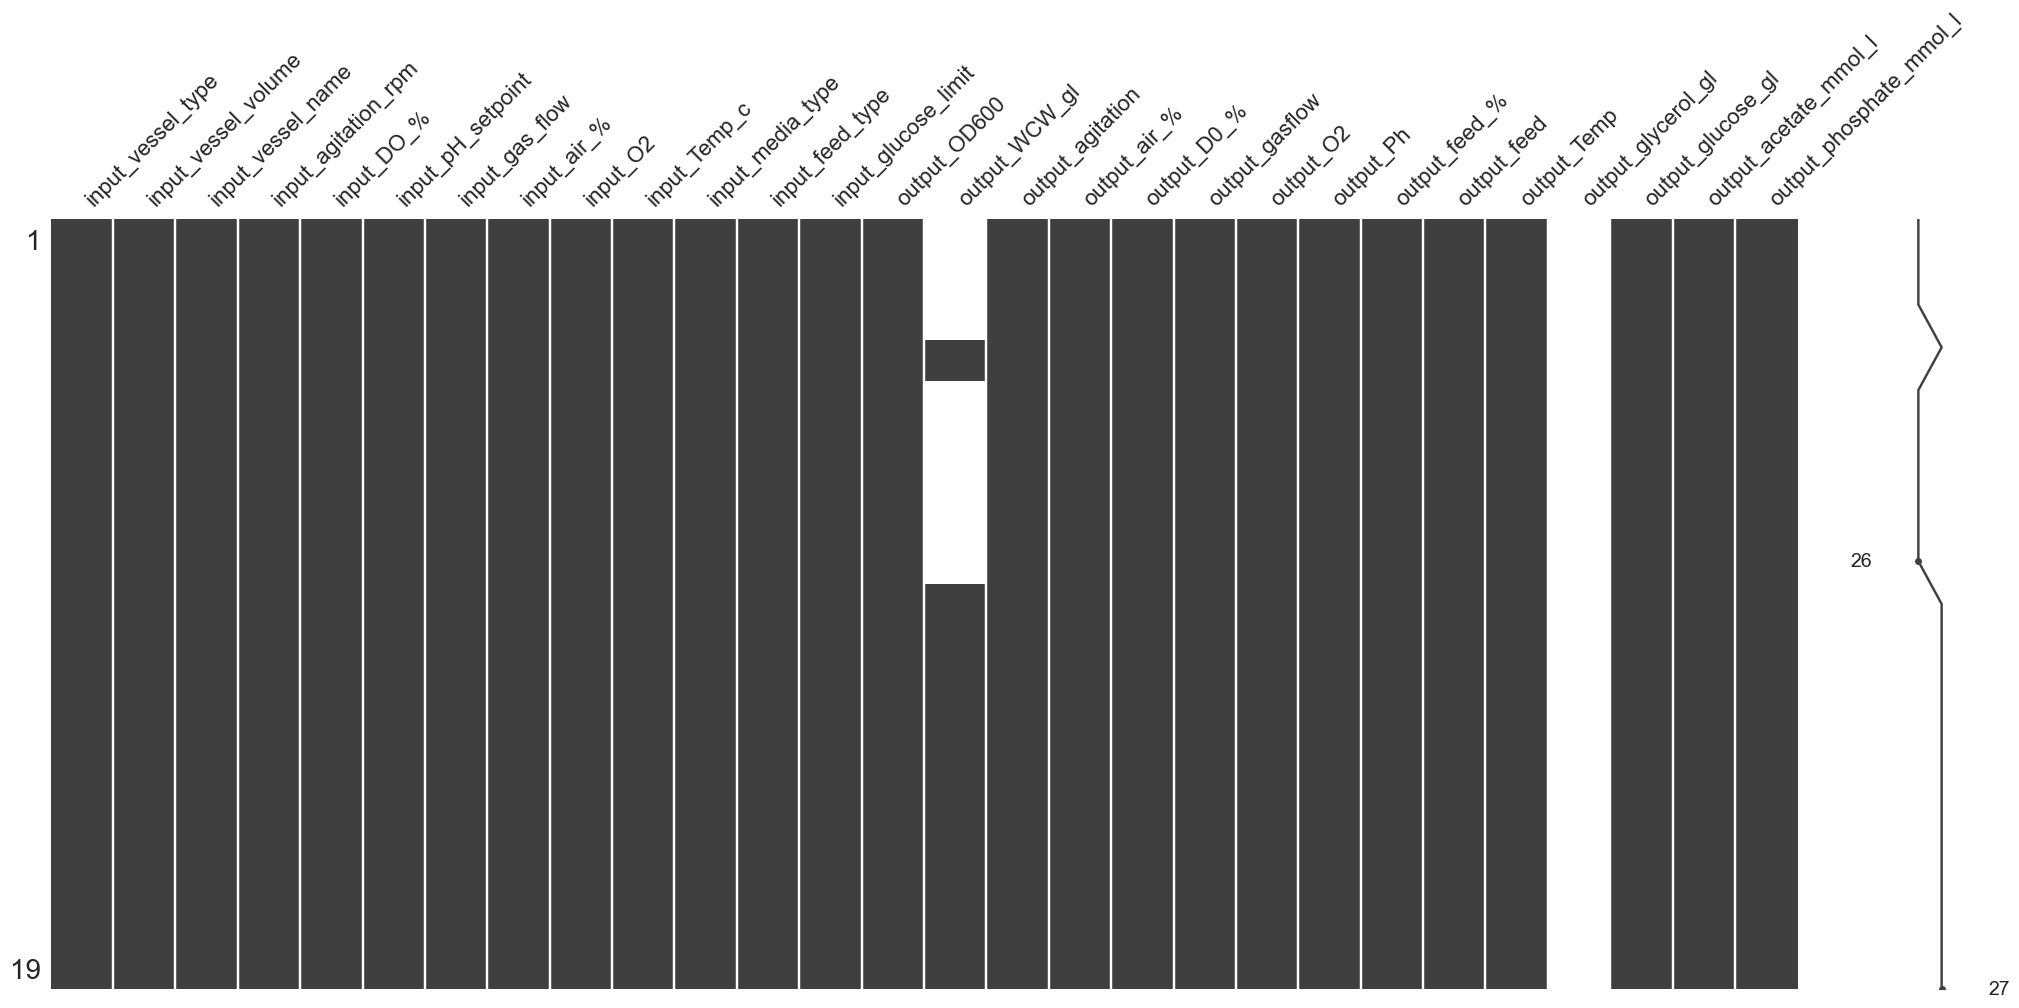

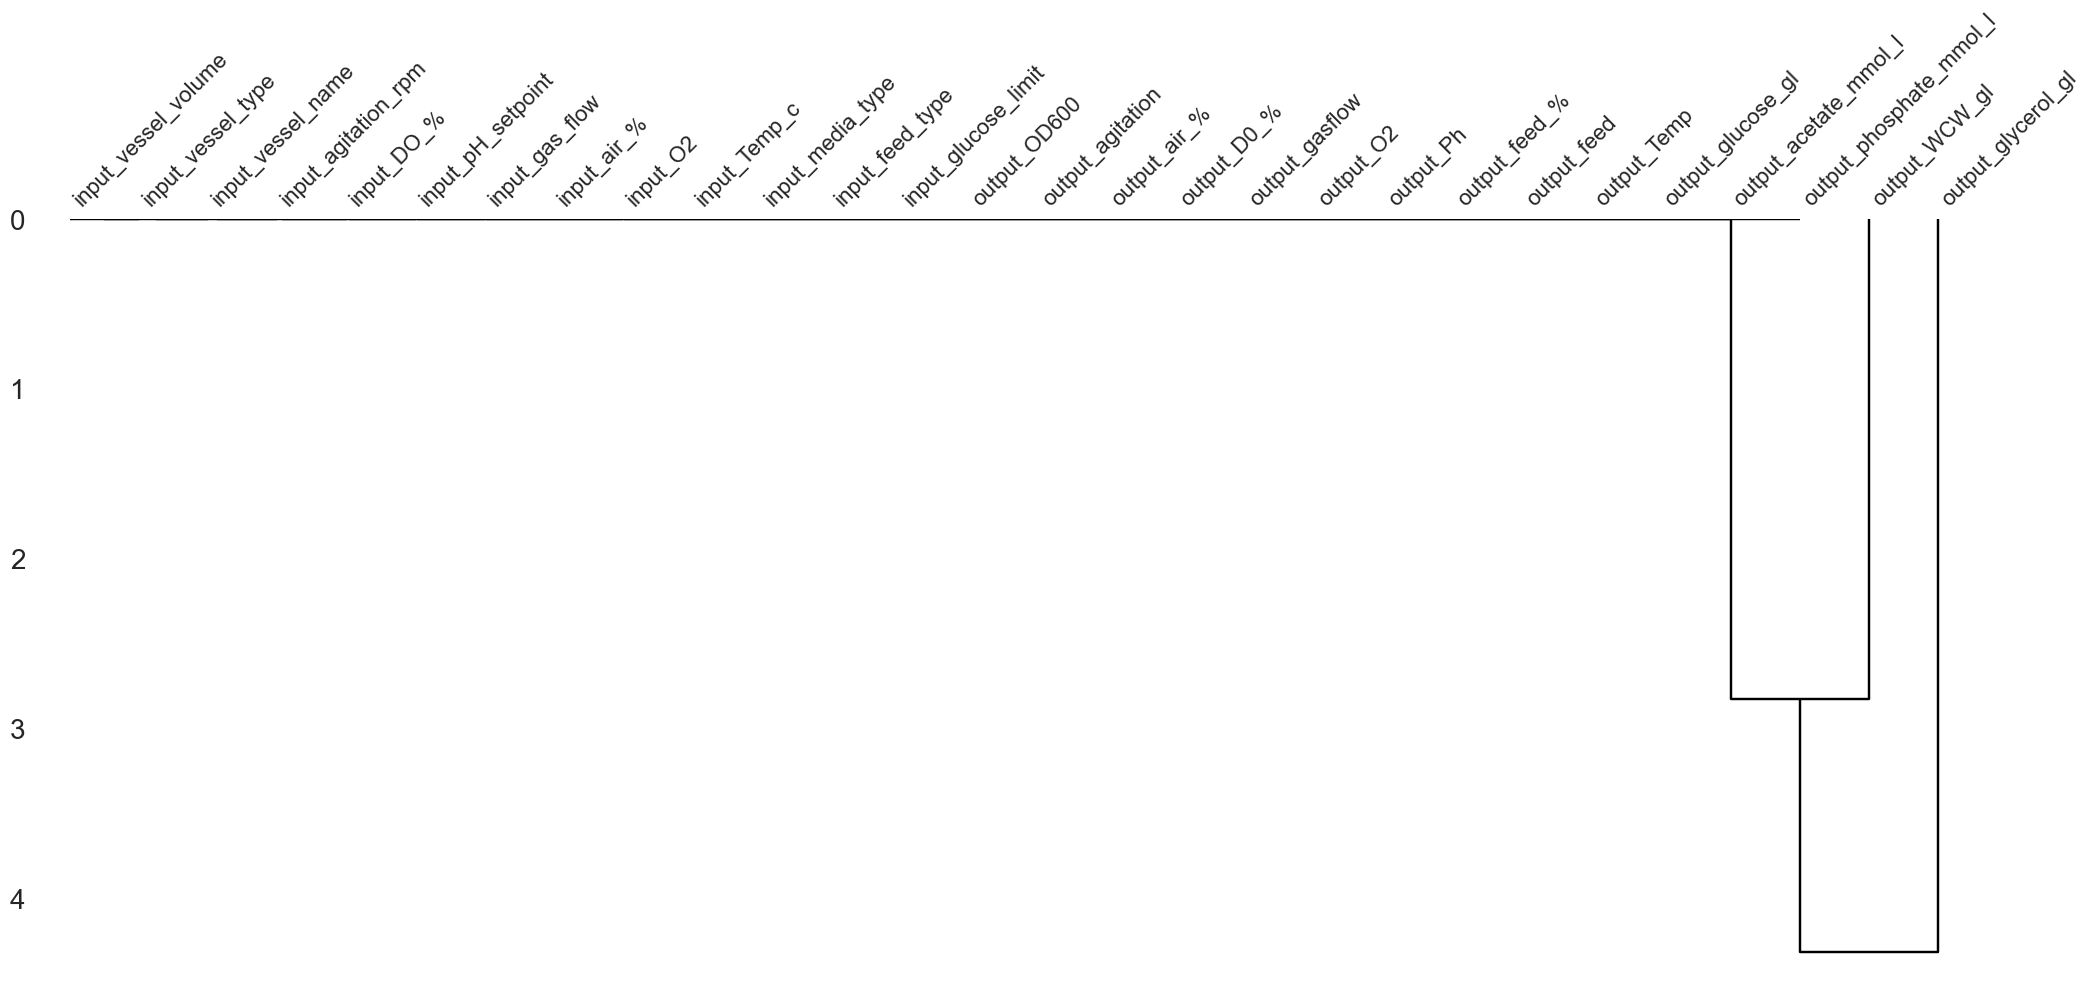

In [293]:
random_num = np.random.randint(0, len(experiment_data))


for index, df in enumerate(experiment_data):
    if random_num == index:
        print(f"Randomly selected experiment: {df.name}")
        print(df.head())
        print('------------------------------', '\n', 'Data Shape:', df.shape, '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Columns:', df.columns, '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Tpes:', df.dtypes, '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Info:', df.info(), '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Description:', df.describe(), '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data NaN total:', df.isnull().sum(), '\n', '------------------------------', '\n')

        msno.matrix(df)
        msno.dendrogram(df)


> Check for and drop invariant columns

In [294]:
invariant_cols = ['input_vessel_type',	'input_vessel_volume',	'input_vessel_name',	'input_agitation_rpm',	'input_DO_%',	
                  'input_pH_setpoint',	'input_gas_flow',	'input_air_%',	'input_O2',	'input_Temp_c',	'input_media_type',	
                  'input_feed_type',	'input_glucose_limit']

random_num = np.random.randint(0, len(experiment_data))

for index, df in enumerate(experiment_data):
    if random_num == index:
        print(df.name) 
        invariant_cols_values = {col: df[col].unique() for col in experiment_data[1].columns 
                                 if len(experiment_data[1][col].unique()) < 4}

invariant_cols_values 

exp_220329c2_3


{'input_vessel_type': array(['5L Fermenter'], dtype=object),
 'input_vessel_volume': array(['5000ml'], dtype=object),
 'input_vessel_name': array(['Ferm3'], dtype=object),
 'input_agitation_rpm': array([1195], dtype=int64),
 'input_DO_%': array([1], dtype=int64),
 'input_pH_setpoint': array([6.8]),
 'input_gas_flow': array([2.5]),
 'input_air_%': array([100], dtype=int64),
 'input_O2': array([0.]),
 'input_Temp_c': array([30], dtype=int64),
 'input_media_type': array(['Media type A'], dtype=object),
 'input_feed_type': array(['Glucose'], dtype=object),
 'input_glucose_limit': array([0], dtype=int64)}

In [295]:
# drop invariant columns 
use_this = [] * len(experiment_data)
for index, df in enumerate(experiment_data):
    df = df.drop(columns = invariant_cols, axis=1, inplace=True)


<a id="3"></a> <br>
## Exploratory Data Analysis (EDA)

In [296]:
# plt.figure(figsize=(8, 6)) # Set the size of the plot



def plot_corr_matrix_seaborn(df, corr_val = 0.4, save=False):
    
    df = df.rename(columns={'output_OD600': 'OD600nm', 'output_WCW_gl': 'Wet Cell Weight (g/L)', 'output_feed': 'Feed', 'output_feed_%': 'Feed %',
                                    'output_agitation': 'Agitation (rpm)', 'output_air_%': 'Air (%)', 'output_O2': 'Oxygen Percentage', 'output_gasflow': 'Gas Flow',
                                    'output_Ph': 'pH', 'output_Temp': 'Temperature (oC)', 'output_glycerol_gl': 'Glycerol (g/L)', 'output_acetate_mmol_l': 'Acetate (mmol/L)',
                                    'output_phosphate_mmol_l': 'Phosphate (mmol/L)', 'input_Timepoint (hr)': 'Timepoint (hr)', 
                                    'output_D0_%': 'Dissolved Oxygen (%)', 'output_glucose_gl': 'Glucose (g/L)'})
    if hasattr(df, 'name') and df.name:
        title = f"{df.name} Correlation Heatmap"
    else:
        title = "Correlation Heatmap"
    
    corr_matrix = df.select_dtypes(exclude='object').corr()
    if corr_val:
        high_corr = corr_matrix.where(np.abs(corr_matrix) >= corr_val)   # Filter the matrix to keep only correlations with absolute value >= 0.4.
    else :
        high_corr = corr_matrix
    
    # high_corr[high_corr < corr_val] = np.nan    # Set the rest of the values to NaN
    
    plt.figure(figsize=(8, 6))  # Set the size of the plot
    sns.heatmap(high_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.grid(False)  # This removes both vertical and horizontal gridlines

    plt.title(f"{title} for corr > {corr_val}")    # Set the title of the plot
    if save:    # Save the plot if the 'save' parameter is True
        plt.savefig(f"images/correlation_plots/{title}.png")
    plt.show()
    
    
    
def plot_corr_matrix_matplotlib(df, corr_val=0.4, save=False):
    # Compute the correlation matrix
    df = df.rename(columns={'output_OD600': 'OD600nm', 'output_WCW_gl': 'Wet Cell Weight (g/L)', 'output_feed': 'Feed', 'output_feed_%': 'Feed %',
                                    'output_agitation': 'Agitation (rpm)', 'output_air_%': 'Air (%)', 'output_O2': 'Oxygen Percentage', 'output_gasflow': 'Gas Flow',
                                    'output_Ph': 'pH', 'output_Temp': 'Temperature (oC)', 'output_glycerol_gl': 'Glycerol (g/L)', 'output_acetate_mmol_l': 'Acetate (mmol/L)',
                                    'output_phosphate_mmol_l': 'Phosphate (mmol/L)', 'input_Timepoint (hr)': 'Timepoint (hr)', 
                                    'output_D0_%': 'Dissolved Oxygen (%)', 'output_glucose_gl': 'Glucose (g/L)'})
    if hasattr(df, 'name') and df.name:
        title = f"{df.name} Correlation Heatmap"
    else:
        title = "Correlation Heatmap"
    
    corr_matrix = df.select_dtypes(exclude='object').corr()
    if corr_val:
        corr_matrix = corr_matrix.where(np.abs(corr_matrix) >= corr_val)   # Filter the matrix to keep only correlations with absolute value >= 0.4.
    else:
        pass 

    fig, ax = plt.subplots(figsize=(10, 8))

    # Use matshow to create the heatmap
    cax = ax.matshow(corr_matrix, cmap='viridis', interpolation='nearest')

    # Add color bar for reference
    fig.colorbar(cax)

    # Set up the axes with the correct labels
    ax.set_xticks(np.arange(len(corr_matrix.columns)))
    ax.set_yticks(np.arange(len(corr_matrix.columns)))
    ax.set_xticklabels(corr_matrix.columns)
    ax.set_yticklabels(corr_matrix.columns)
    ax.grid(False)  # This removes both vertical and horizontal gridlines

    # Rotate the tick labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    
    # Annotate each cell with the numeric value if above the correlation threshold
    for (i, j), val in np.ndenumerate(corr_matrix):
        if np.abs(val) >= corr_val:
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white')

    # Set the title
    title = df.name if hasattr(df, 'name') and df.name else "Correlation Heatmap"
    ax.set_title(f"{title} for corr > {corr_val}", pad=20)

    # Optionally save the figure
    if save:
        plt.savefig(f"images/correlation_plots/{title}.png")

    plt.show()



df_combined = pd.concat(experiment_data, axis=0)

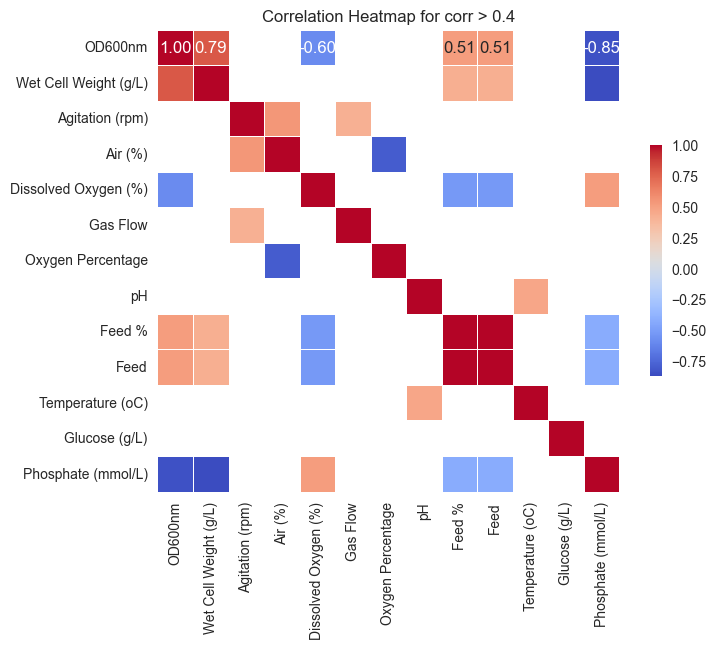

In [297]:
plot_corr_matrix_seaborn(df_combined, corr_val = 0.4, save=False) # using seaborn 

In [298]:
len(df_combined)

684

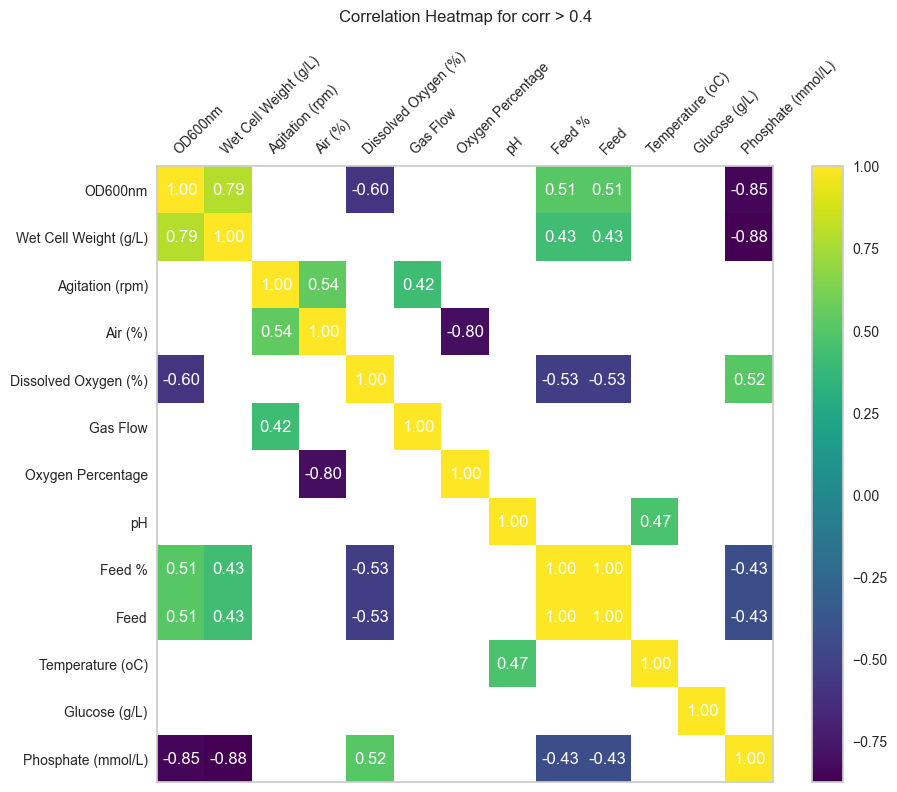

In [299]:
# Call the function with the DataFrame
plot_corr_matrix_matplotlib(df_combined, corr_val = 0.4, save=False)


In [300]:
# there are some columns that are highly correlated with each other, 

    # output_WCW has a moderate-high correlation with:
        # output_OD600 (high correlation ) 
        # output_feed and output_feed_% (moderate correlation)
        
    # output_OD600 has a moderate-high correlation with:
        # output_WCW (high correlation )
        # output_feed and output_feed_% (moderate correlation)
    
    # output_gasflow has a moderate relationship with:
        # output_air_% (moderate-high correlation)
        # output_agitation (moderate correlation)
             
    # output_air_% and output_agitation have a moderate/strong correlation with each other


In [301]:
## DO NOT DELETE

# for df in experiment_data:
#     plot_corr_matrix(df, corr_val = 0.5, save=False)


> Feature Analyzer

In [302]:
df_plots = df_combined.copy()
df_plots.reset_index(inplace=True)

def rename_df(df):
    df = df.rename(columns={'output_OD600': 'OD600nm', 'output_WCW_gl': 'Wet Cell Weight (g/L)', 'output_feed': 'Feed', 'output_feed_%': 'Feed %',
                                        'output_agitation': 'Agitation (rpm)', 'output_air_%': 'Air (%)', 'output_O2': 'Oxygen Percentage', 'output_gasflow': 'Gas Flow',
                                        'output_Ph': 'pH', 'output_Temp': 'Temperature (oC)', 'output_glycerol_gl': 'Glycerol (g/L)', 'output_acetate_mmol_l': 'Acetate (mmol/L)',
                                        'output_phosphate_mmol_l': 'Phosphate (mmol/L)', 'input_Timepoint (hr)': 'Timepoint (hr)', 
                                        'output_D0_%': 'Dissolved Oxygen (%)', 'output_glucose_gl': 'Glucose (g/L)'})
    return df 
df_plots = rename_df(df_plots)
df_plots[['Glycerol (g/L)', 'Acetate (mmol/L)']]= df_plots[['Glycerol (g/L)', 'Acetate (mmol/L)']].apply(pd.to_numeric, errors='coerce' ,axis=1)  # Convert all columns
df_plots.set_index('Timepoint (hr)', inplace=True)                     

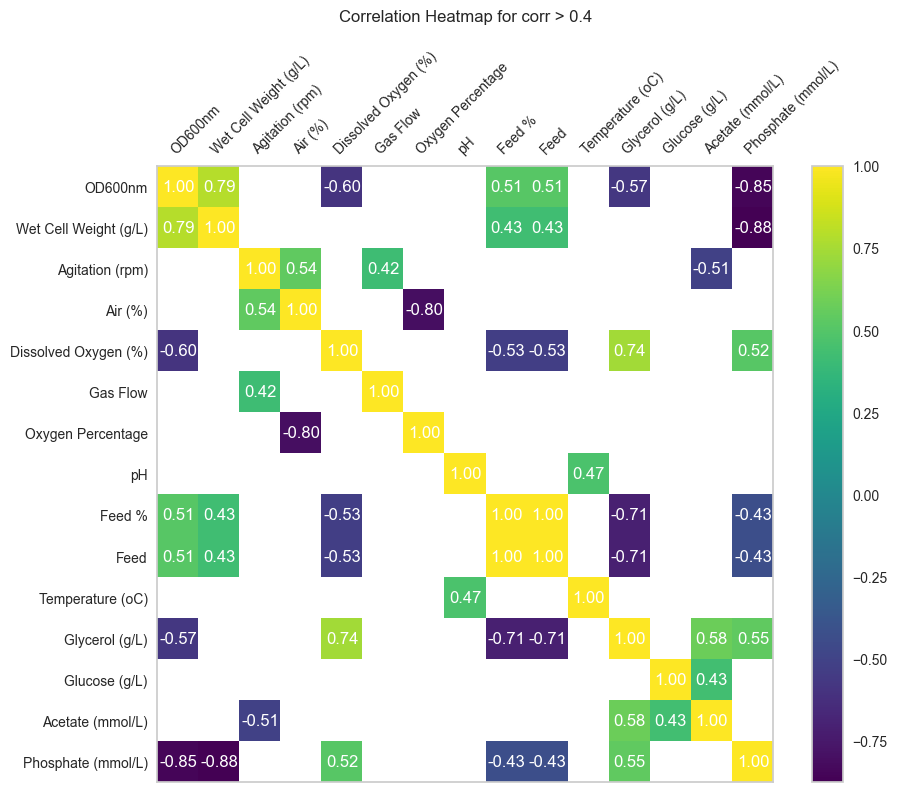

In [303]:
plot_corr_matrix_matplotlib(df_plots, corr_val = 0.4, save=False) 

In [304]:
# Rank Features

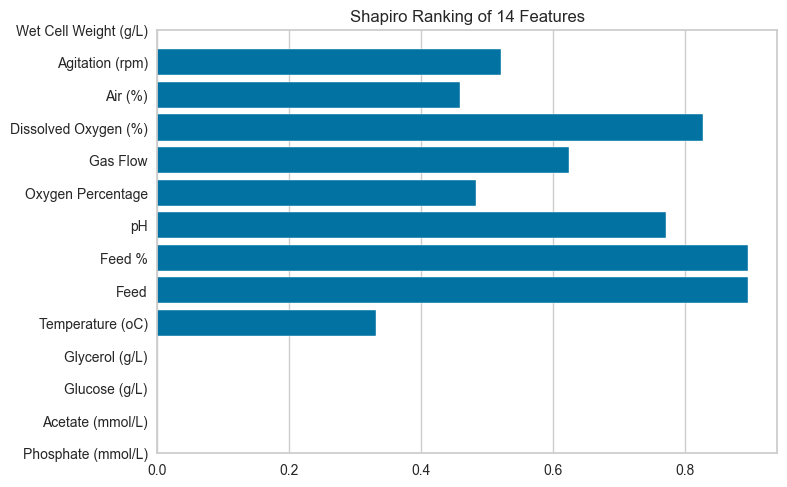

<Axes: title={'center': 'Shapiro Ranking of 14 Features'}>

In [305]:
# Rank 1D
    # A one-dimensional ranking of features utilizes a ranking algorithm that takes into account only a single feature at a time 
    # (e.g. histogram analysis). By default we utilize the Shapiro-Wilk algorithm to assess the normality of the distribution of 
    # instances with respect to the feature. A barplot is then drawn showing the relative ranks of each feature.

from yellowbrick.features import Rank1D


# Instantiate the 1D visualizer with the Shapiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(df_plots.drop(columns = "OD600nm"), df_plots['OD600nm'])           # Fit the data to the visualizer
visualizer.transform(df_plots.drop(columns = "OD600nm"))        # Transform the data
visualizer.show()              # Finalize and render the figure

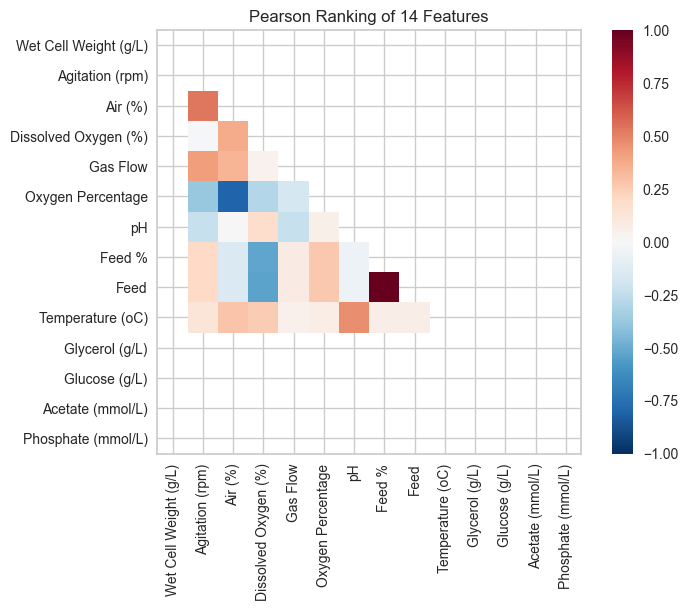

<Axes: title={'center': 'Pearson Ranking of 14 Features'}>

In [306]:
# Rank 2D
    # A two-dimensional ranking of features utilizes a ranking algorithm that takes into account pairs of features at a time 
    # (e.g. joint plot analysis). The pairs of features are then ranked by score and visualized using the lower left triangle of a 
    # feature co-occurence matrix.
    # By default, the Rank2D visualizer utilizes the Pearson correlation score to detect colinear relationships.

from yellowbrick.features import Rank2D


# Instantiate the 1D visualizer with the Shapiro ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(df_plots.drop(columns = "OD600nm"), df_plots['OD600nm'])           # Fit the data to the visualizer
visualizer.transform(df_plots.drop(columns = "OD600nm"))        # Transform the data
visualizer.show()              # Finalize and render the figure

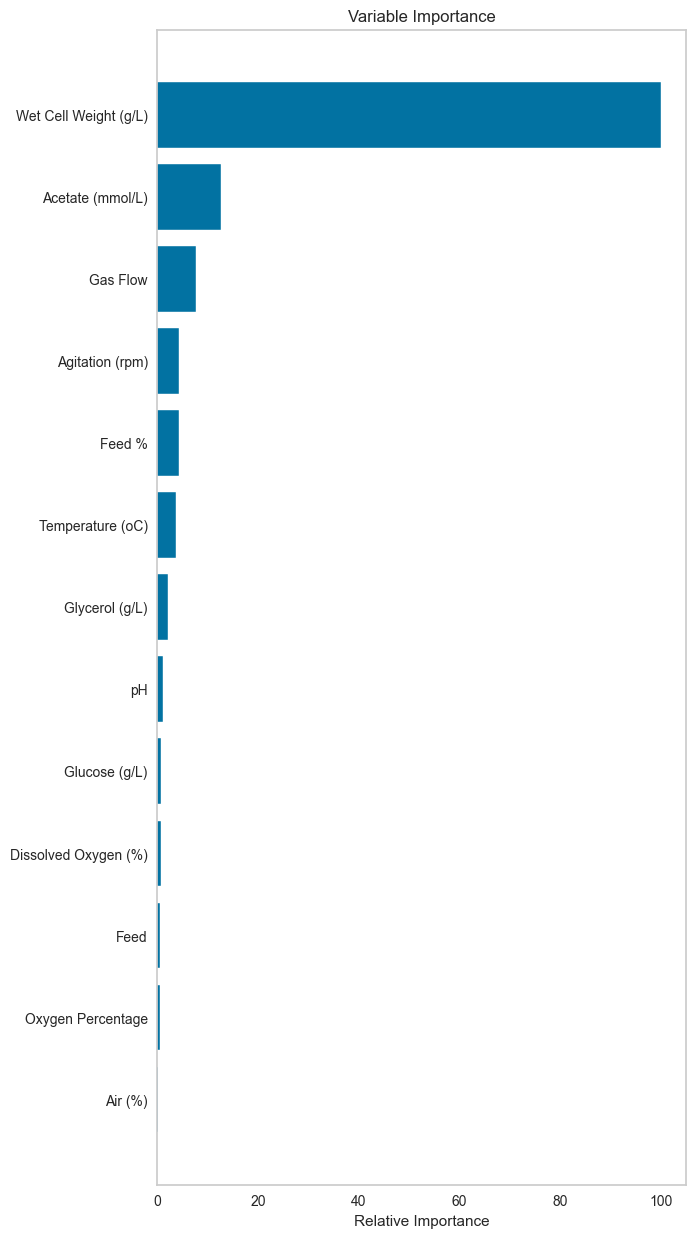

In [307]:
#access the most important features in the model
from sklearn.ensemble import RandomForestRegressor
# Feature Importance



def feature_importance(model,X):
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.grid(False)
    plt.show()

model = RandomForestRegressor(n_estimators=10)

data_combined = pd.read_csv('data/use_to_code/combined_data_extra.csv', index_col='input_Timepoint (hr)', parse_dates=True)
data_combined = rename_df(data_combined) 
model.fit(data_combined.drop(columns = ["OD600nm", 'Feed']), data_combined['OD600nm'])
feature_importance(model, data_combined.drop(columns = "OD600nm"))  




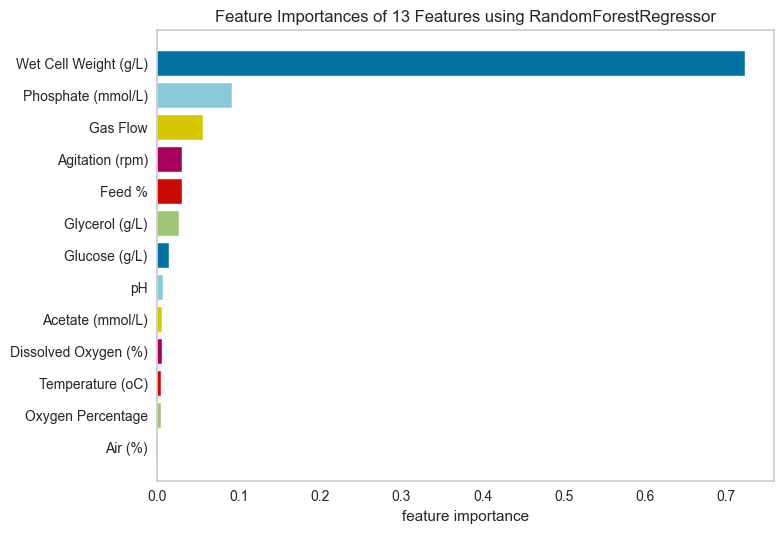

<Axes: title={'center': 'Feature Importances of 13 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [308]:

#OR
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model, relative=False)
viz.fit(data_combined.drop(columns = ['Feed', 'OD600nm']), data_combined['OD600nm'])
# Access the axes object and remove gridlines
viz.ax.grid(False)
viz.show()

### Time Series Plots

> Feed Strategy

In [309]:
def plot_timeseries (experiment_groups, cols_to_plot, marker = '*' , linestyle='-', color=None, save = False):
    for output_col in cols_to_plot:
        fig, ax = plt.subplots(2, 4, figsize=(20, 10))  # Adjusted figsize for better visibility

        for i, exp_dfs in enumerate(experiment_groups):
            for j, df in enumerate(exp_dfs):
                # Calculate row and column index for subplots
                row = i // 4  # Integer division to get the row index
                col = i % 4  # Modulus to get the column index
                
                df = df.rename(columns={'output_OD600': 'OD600nm', 'output_WCW_gl': 'Wet Cell Weight (g/L)', 'output_feed': 'Feed', 'output_feed_%': 'Feed %',
                                    'output_agitation': 'Agitation (rpm)', 'output_air_%': 'Air (%)', 'output_O2': 'Oxygen Percentage', 'output_gasflow': 'Gas Flow',
                                    'output_Ph': 'pH', 'output_Temp': 'Temperature (oC)', 'output_glycerol_gl': 'Glycerol (g/L)', 'output_acetate_mmol_l': 'Acetate (mmol/L)',
                                    'output_phosphate_mmol_l': 'Phosphate (mmol/L)', 'input_Timepoint (hr)': 'Timepoint (hr)', 
                                    'output_D0_%': 'Dissolved Oxygen (%)', 'output_glucose_gl': 'Glucose (g/L)'})
                # Plot the specified output column on the subplot
                try:
                    if df[output_col].isnull != True:
                        ax[row, col].plot(df.index, df[output_col], label=output_col, marker = marker, linestyle=linestyle, color=color)
                        ax[row, col].set_xlabel('Experiment Time (hr)')
                        ax[row, col].set_ylabel(output_col)  # Set ylabel specific to the output column
                        
                        # label=f"{output_col} ({getattr(df, 'name', f'DataFrame {j+1}')})"
                        label = [f"{output_col} ({getattr(df, 'name', f'DataFrame {j+1}')})" for df in exp_dfs]
                        ax[row, col].legend(labels = label, loc='upper right')
                        ax[row, col].grid(False)  # Turn off the grid to improve visibility
                        
                        
                        # Use the DataFrame's 'name' attribute for the subplot title, if available
                        exp_name = getattr(df, 'name', f'Exp {i+1}')
                        # ax[row, col].set_title(f"{output_col} distribution for {'_'.join(exp_name.split('_')[:2])}")
                        ax[row, col].set_title(f"{output_col} Distribution for Experiment")
                
                except:
                    pass
        if save:
            plt.savefig(f"images/timeseries_plots/{output_col}_timeseries.png")
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()  # Display the plot for the current output column

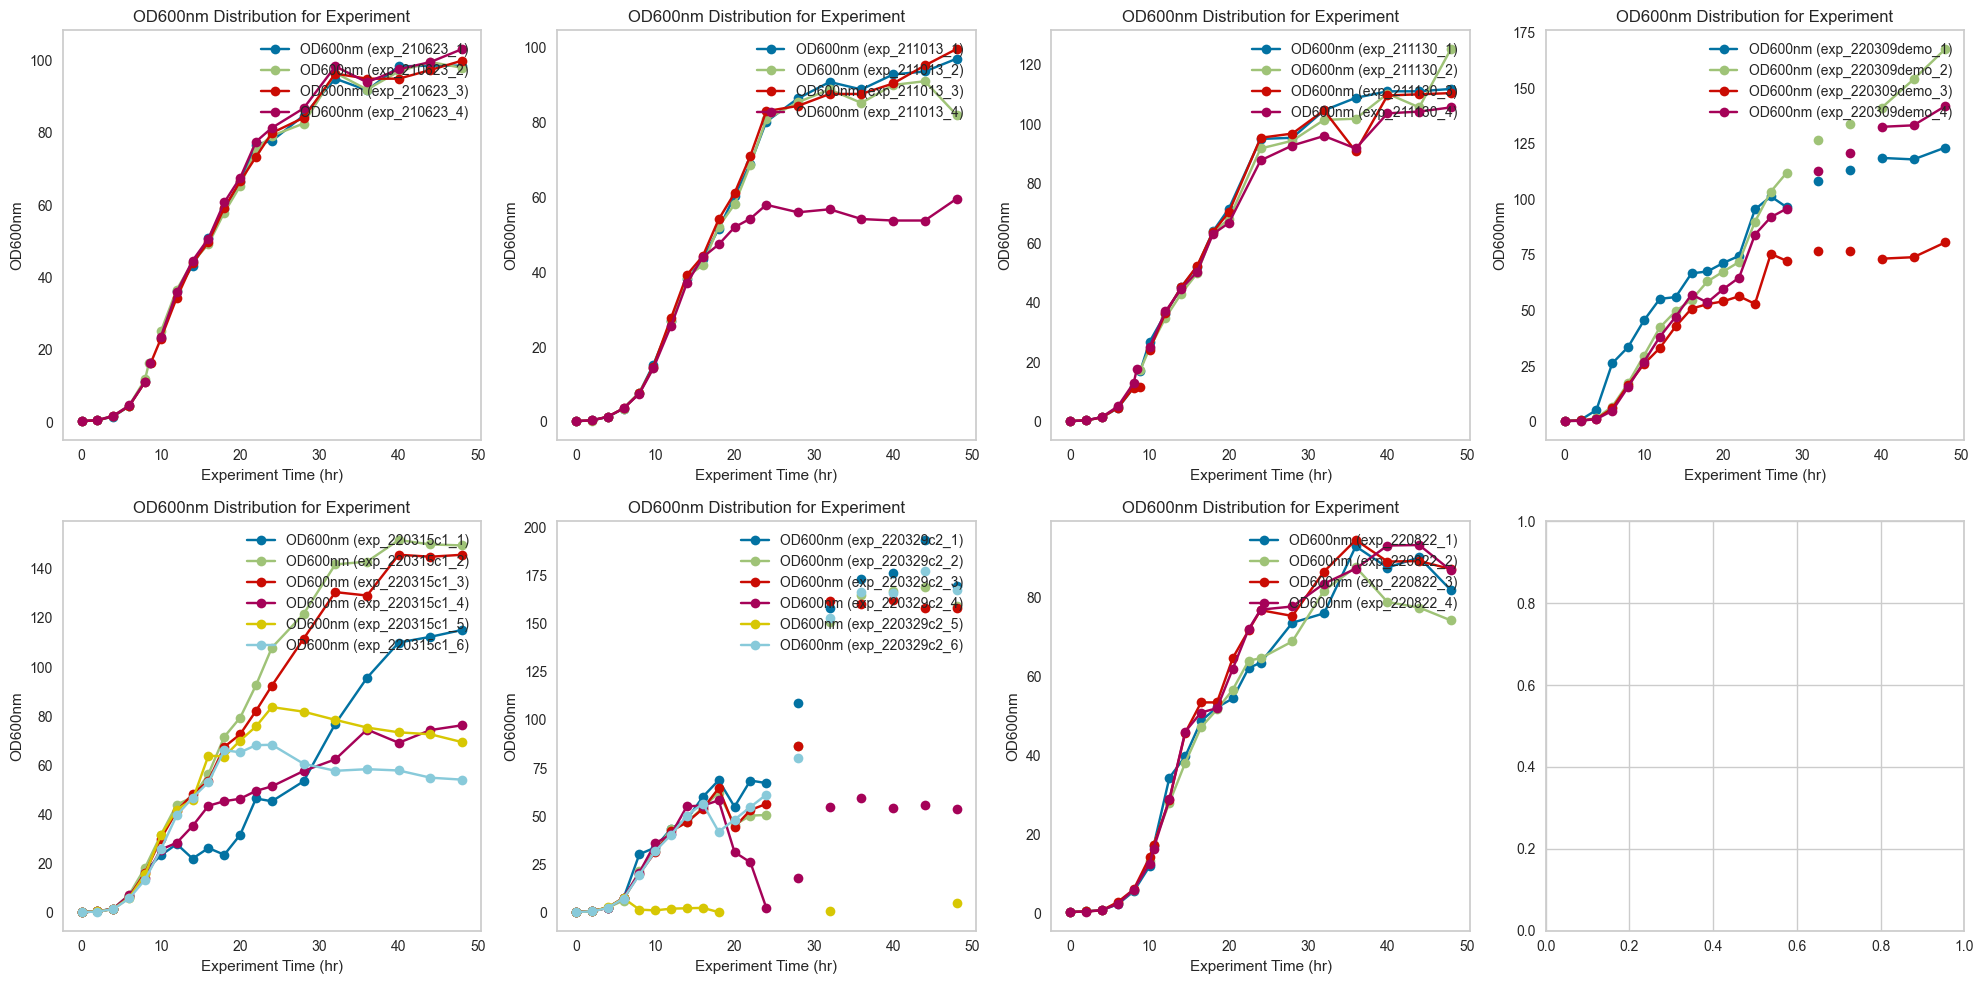

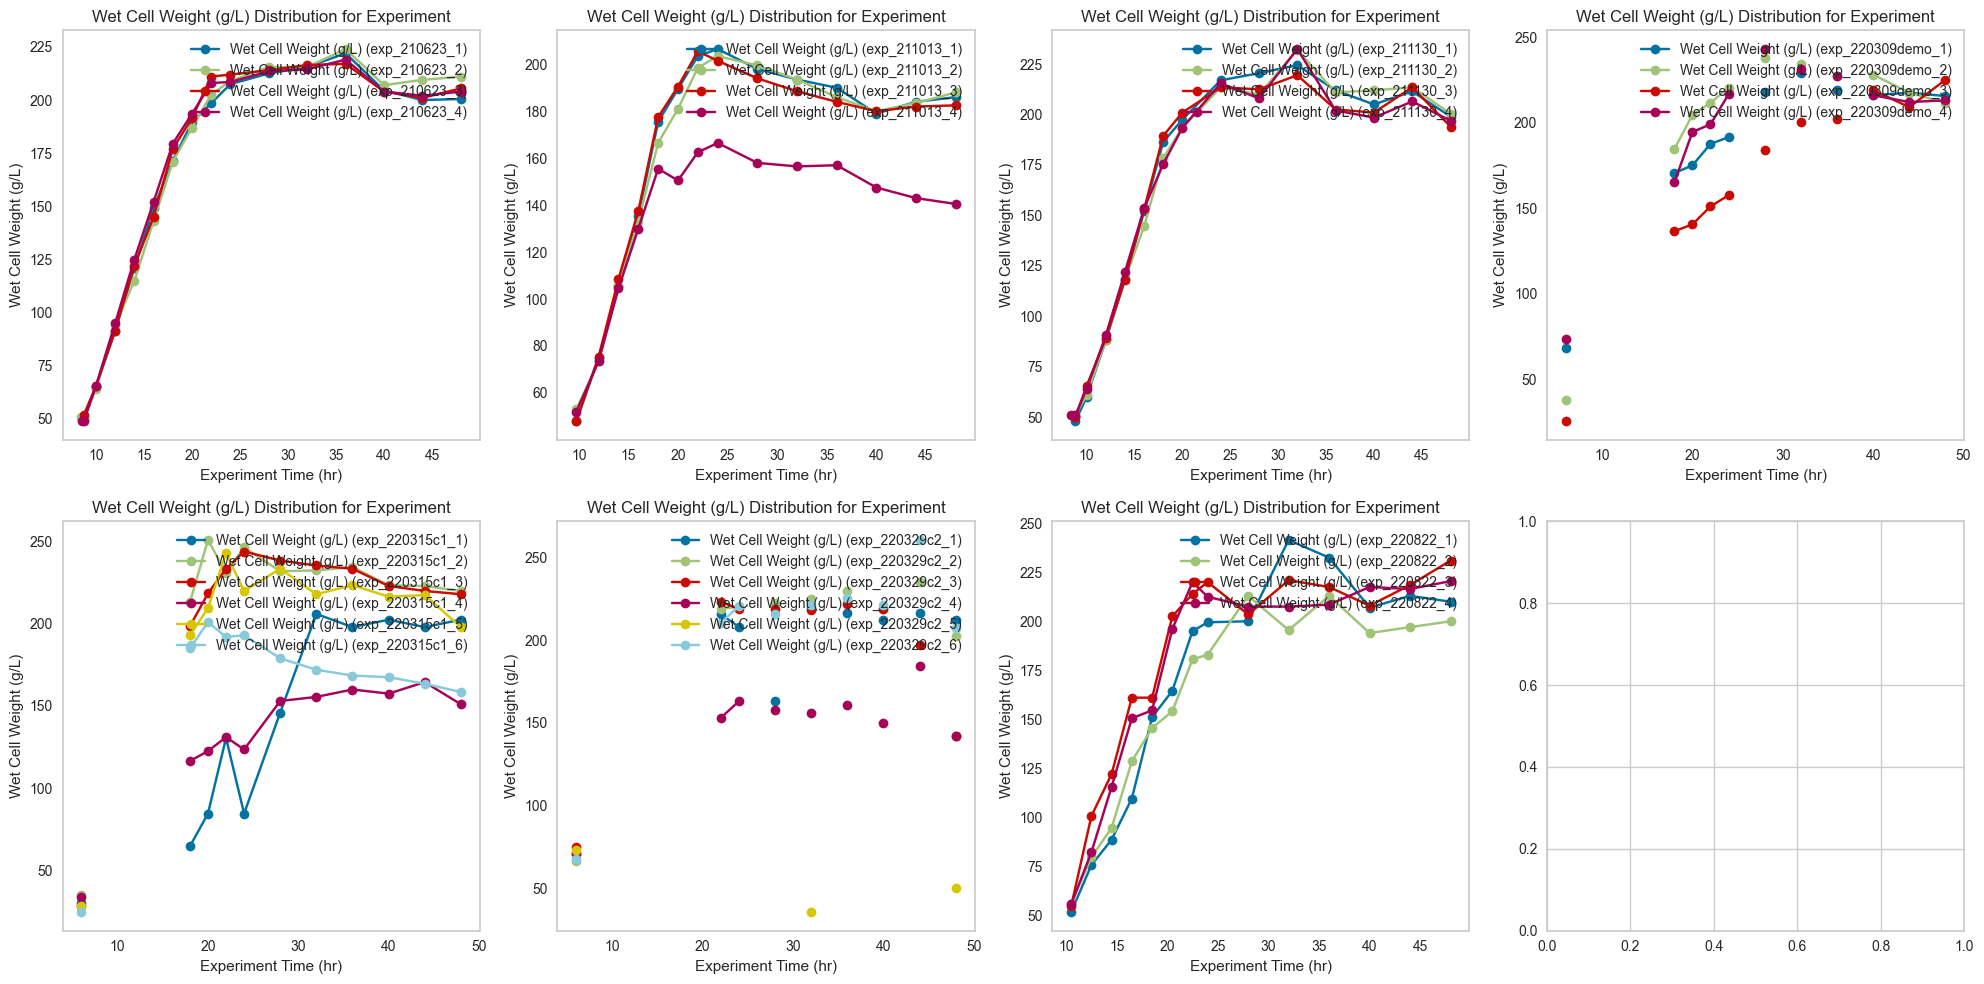

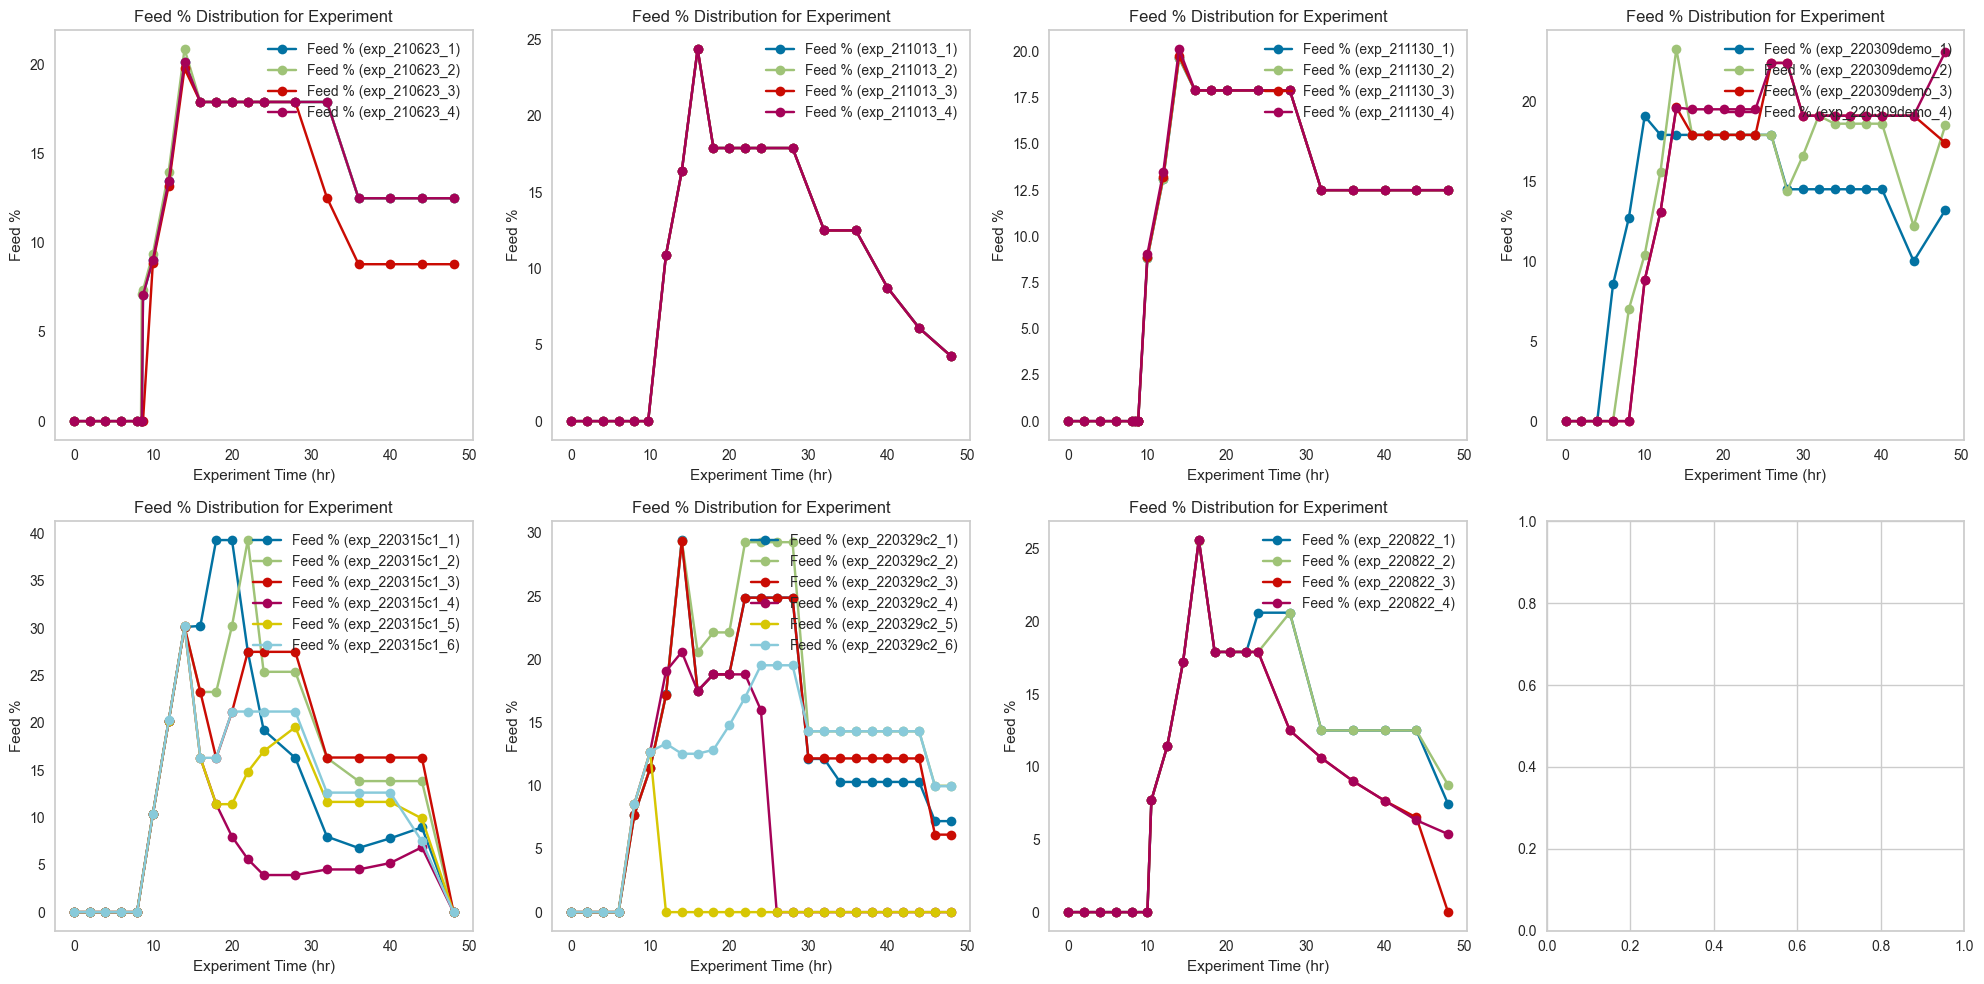

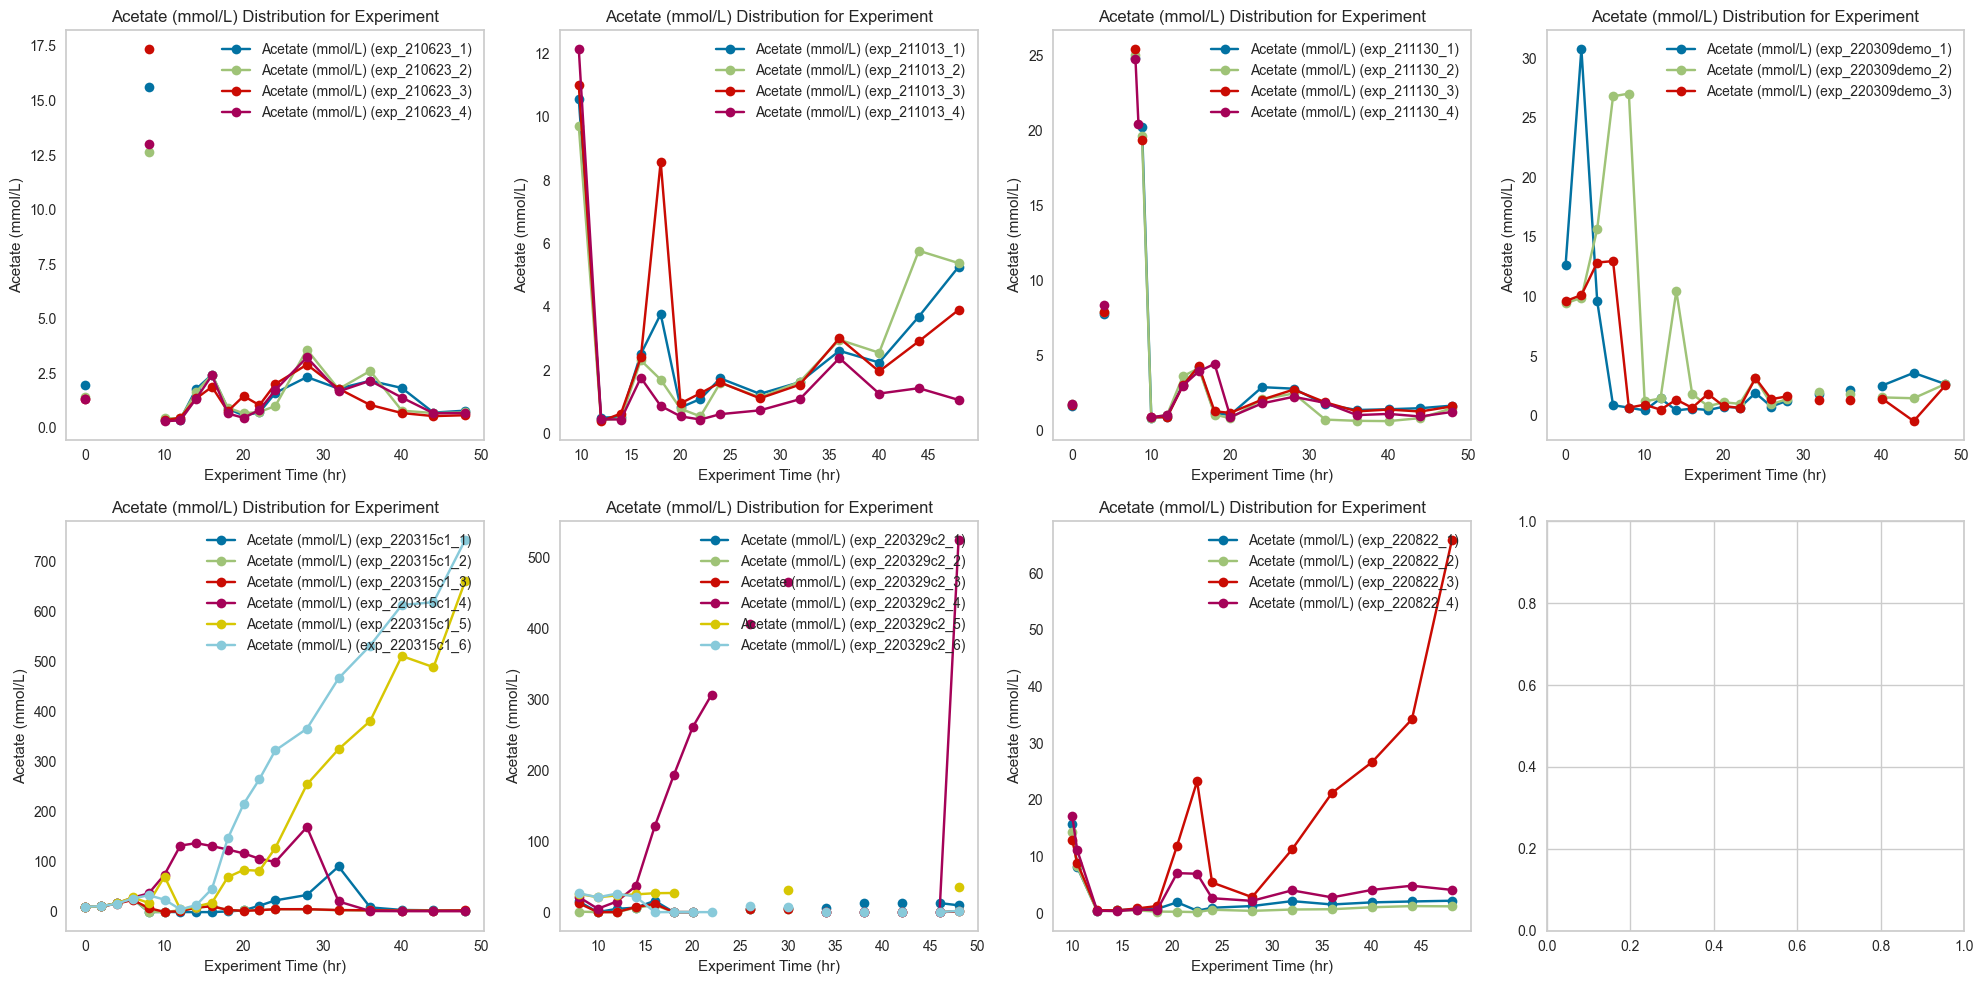

In [310]:
# plot_timeseries(experiment_groups, ['output_feed_%', 'output_acetate_mmol_l', 'output_glucose_gl'], marker = 'o', linestyle='-', color=None, save = False)

plot_timeseries(experiment_groups, ['OD600nm', 'Wet Cell Weight (g/L)', 'Feed %', 'Acetate (mmol/L)'], marker = 'o', linestyle='-', color=None, save = False)


In [311]:
# # 1.      Feed Changes: 

#             # a. Composition of Feed: 
#                 # Other than glucose, are there any other components included in the feed at each time point? If so, what are they 
#                 # and what proportions are used? 

#                     Ans: No, only 50% glucose solution. 

#             # b. Decision Factors for Feed Changes: 
#                 # Could you describe the criteria or factors that inform how the feed percentage is adjusted throughout the experiment? 
#                 # For instance, what prompts a change from 10.6% to 20.21%, and then to 7.9% at the specified hours? 

#                     Ans: Acetate production above 5mmol/L and would like to keep the glucose less than 5g/L. 

#             # c. Feed Calculation Variables: 

#                 # i. How exactly is the 'feed' variable quantified? Is it measured in volume, weight, or concentration? 

#                      Ans: Feed rate ml/min, Feed rate ml/min;  measured in concentration. Feed is measured using a Cedex to provide 
#                      concentration of glucose(g/L). The feed rate(mL/min)  is set as a  in percentage (%) for our pumps. 
#                      It's calculated from a ratio, as explained in c ii.. Using #14 tubing the rate is 3.4mL/min at 100%. 
#                      If you want the feed at say 1mL/min...3.4/100=1/x; x=29.4%, The pump would be set at 29.4%. 

#                 # ii. How is the 'feed %’ calculated? Is it relative to the batch volume, or another metric? 

#                     Ans: 3.4 ml/min at 100%, do ratio. 

#                 # iii. The input data shows that ‘Glucose’ is the only feed type. However, the output section has both columns 
#                     # for ‘glucose (g/L)’ and ‘feed’, which could mean that glucose is one of the many components of the feed. 
#                     # Could you share other components of the feed and their proportions? 

#                     Ans: No other components. 

In [312]:
[df.columns for df in experiment_data][1]

Index(['output_OD600', 'output_WCW_gl', 'output_agitation', 'output_air_%', 'output_D0_%', 'output_gasflow', 'output_O2', 'output_Ph', 'output_feed_%', 'output_feed', 'output_Temp', 'output_glycerol_gl', 'output_glucose_gl', 'output_acetate_mmol_l', 'output_phosphate_mmol_l'], dtype='object')

> Optical Density (OD600nm) and Wet Cell Weight (WCW_gl)

In [313]:
# Optical Density at 600 nm (OD600):

    # OD600 measures the turbidity or cloudiness of a microbial culture by assessing the light absorption at 600 nm wavelength. 
    # This is a rapid and non-destructive method to estimate the cell density in the culture.
    
    # An increase in OD600 typically indicates cell growth, and by extension, it can be inferred that there's ongoing protein production 
    # if the cells are engineered to express a recombinant protein. However, OD600 doesn't directly measure protein expression; 
    # it simply provides an estimate of the culture's cell density.
    
    # OD600 is particularly useful for determining the appropriate time to induce protein expression in inducible expression systems 
    # and for ensuring reproducibility between cultures by standardizing the cell density at the time of induction.


# Wet Cell Weight (WCW):

    # WCW is measured by collecting a known volume of culture, centrifuging it to pellet the cells, and then weighing the wet pellet 
    # after removing the supernatant. It provides a direct measure of the biomass produced in the culture.
    
    # Similar to OD600, WCW is an indirect measure of recombinant protein production. An increase in WCW indicates cell growth, 
    # which under the right conditions, correlates with an increase in recombinant protein production.
    
    # WCW can be particularly useful for processes that are scaled up for industrial production, where biomass yield can directly 
    # impact downstream processing and overall yields of the desired protein.

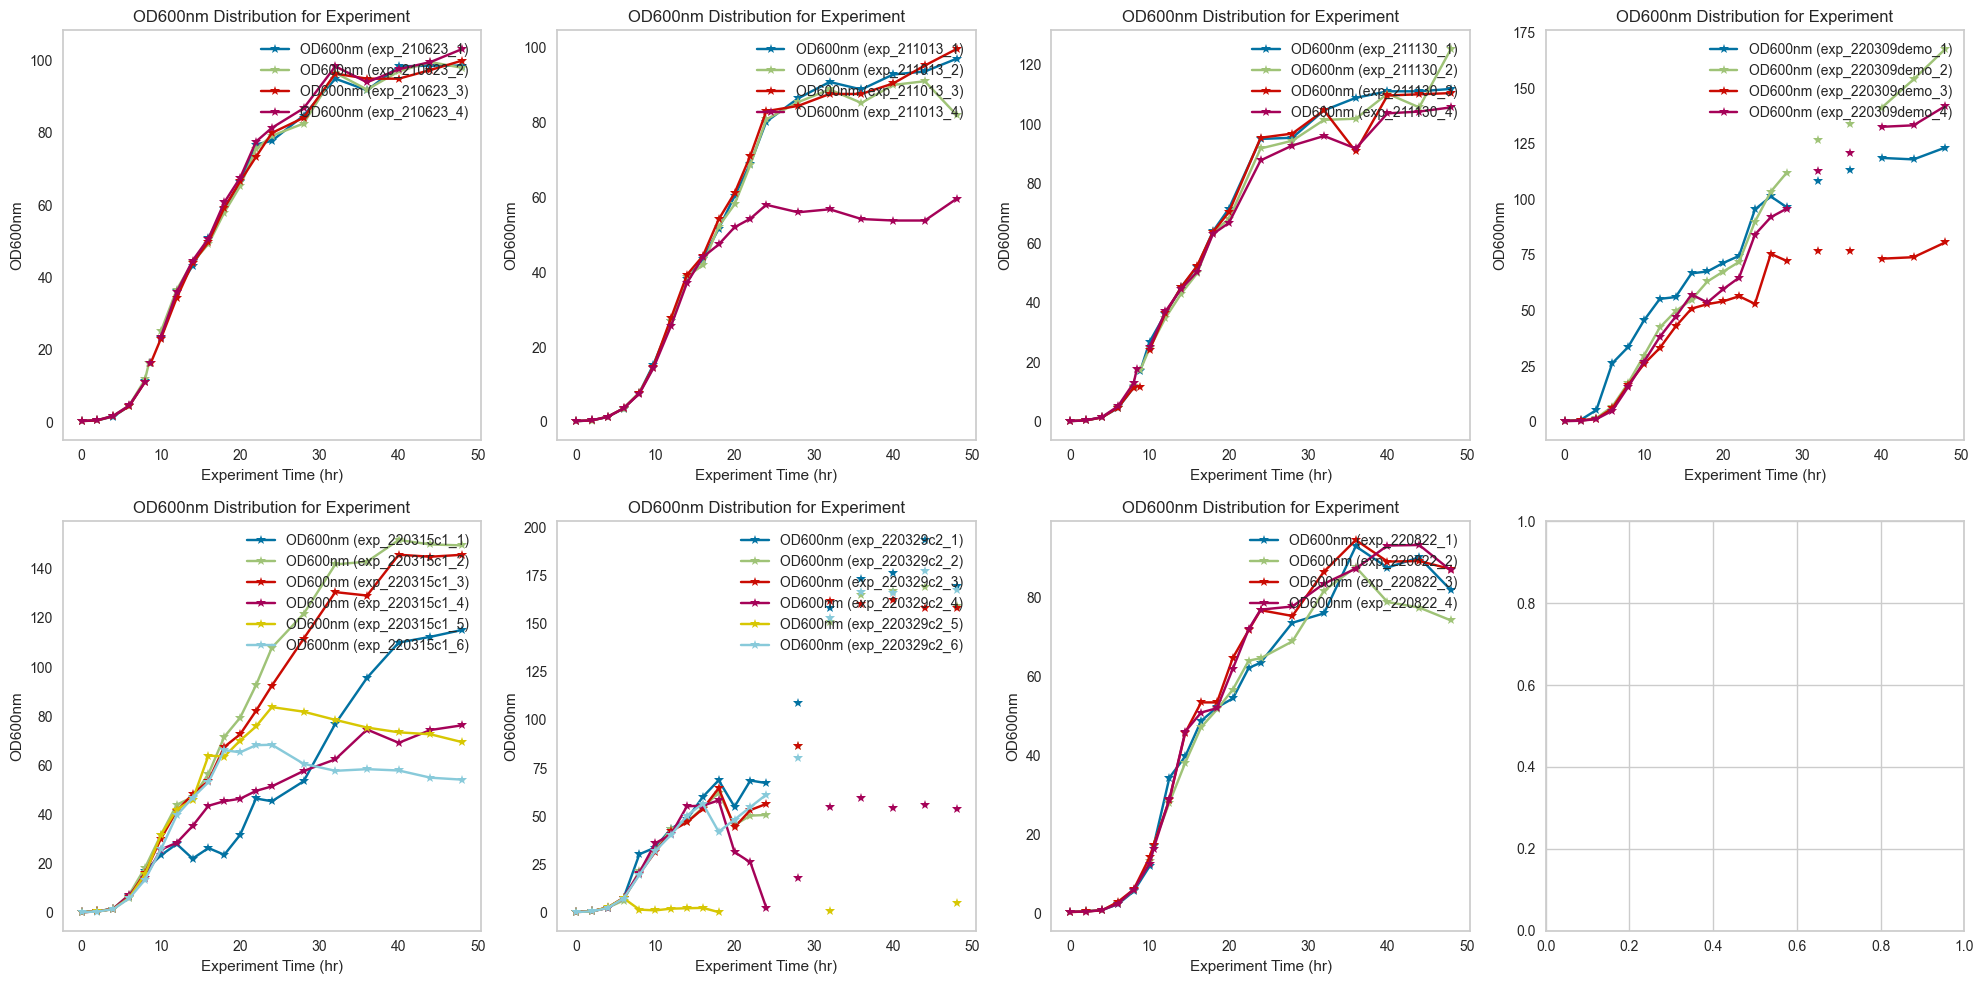

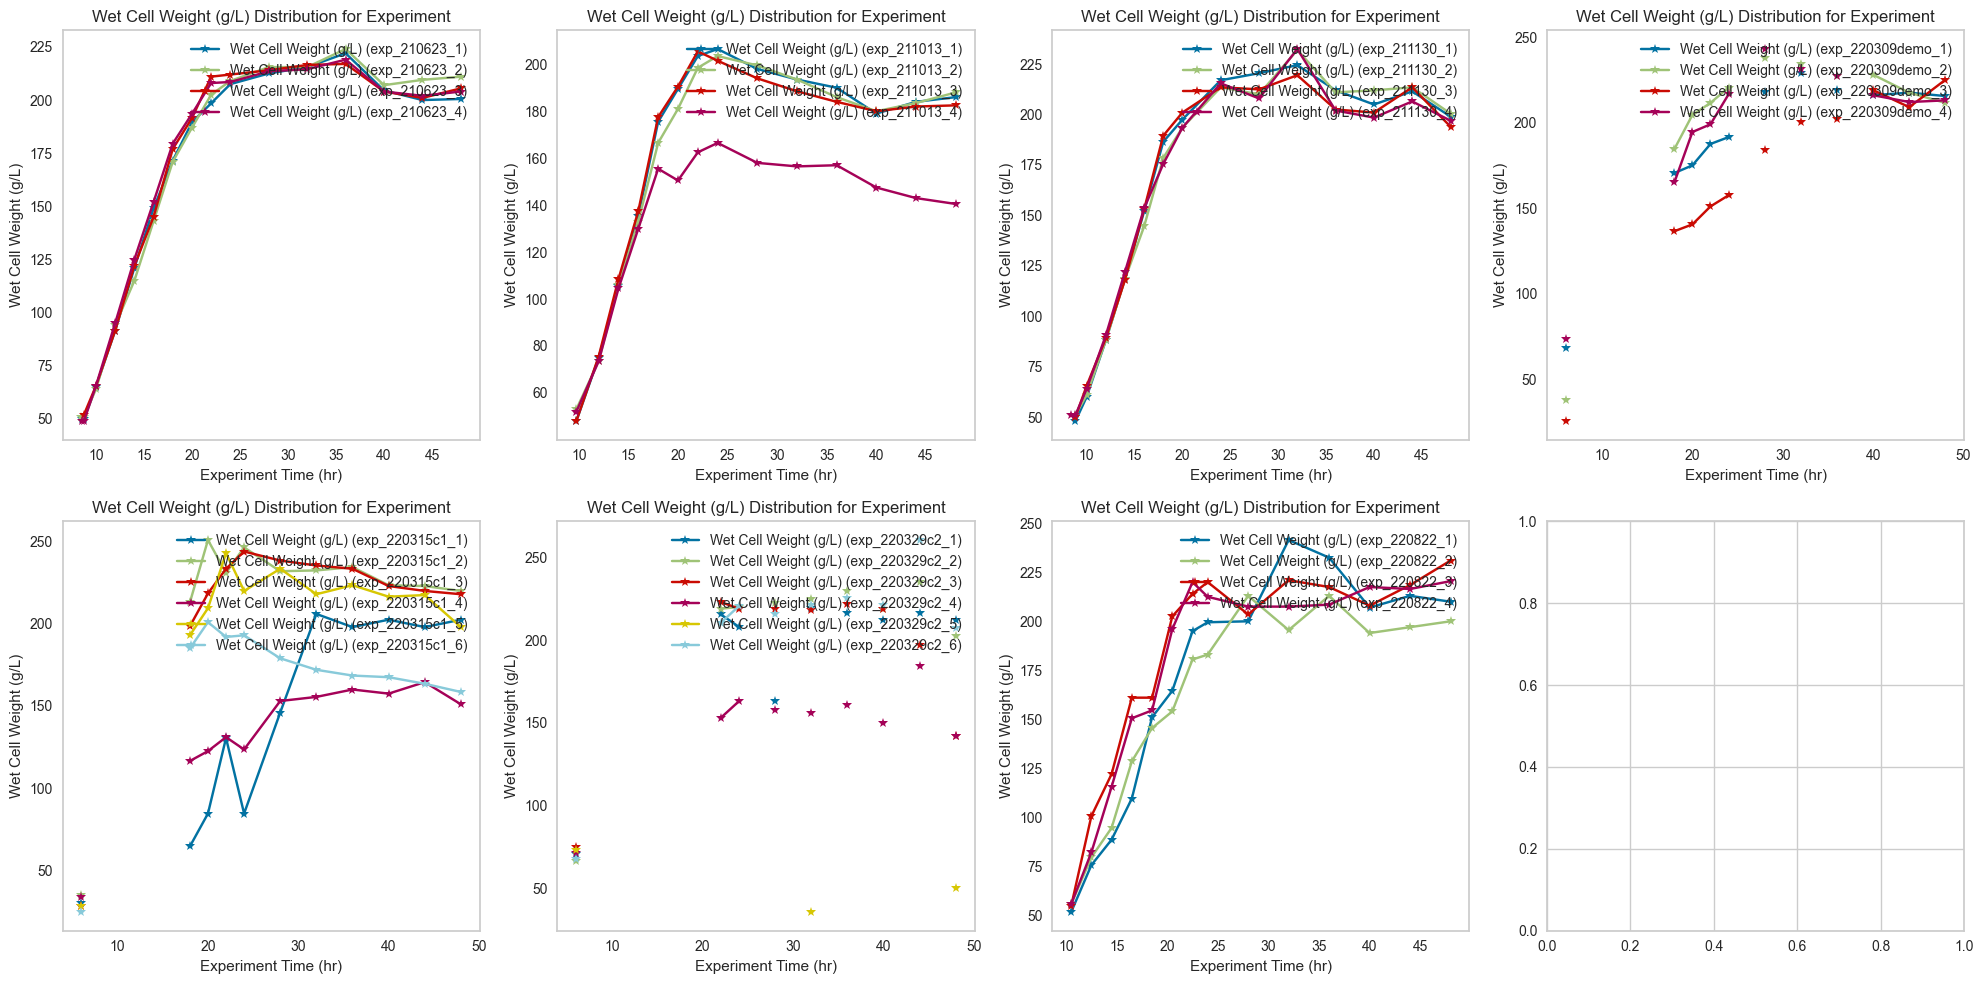

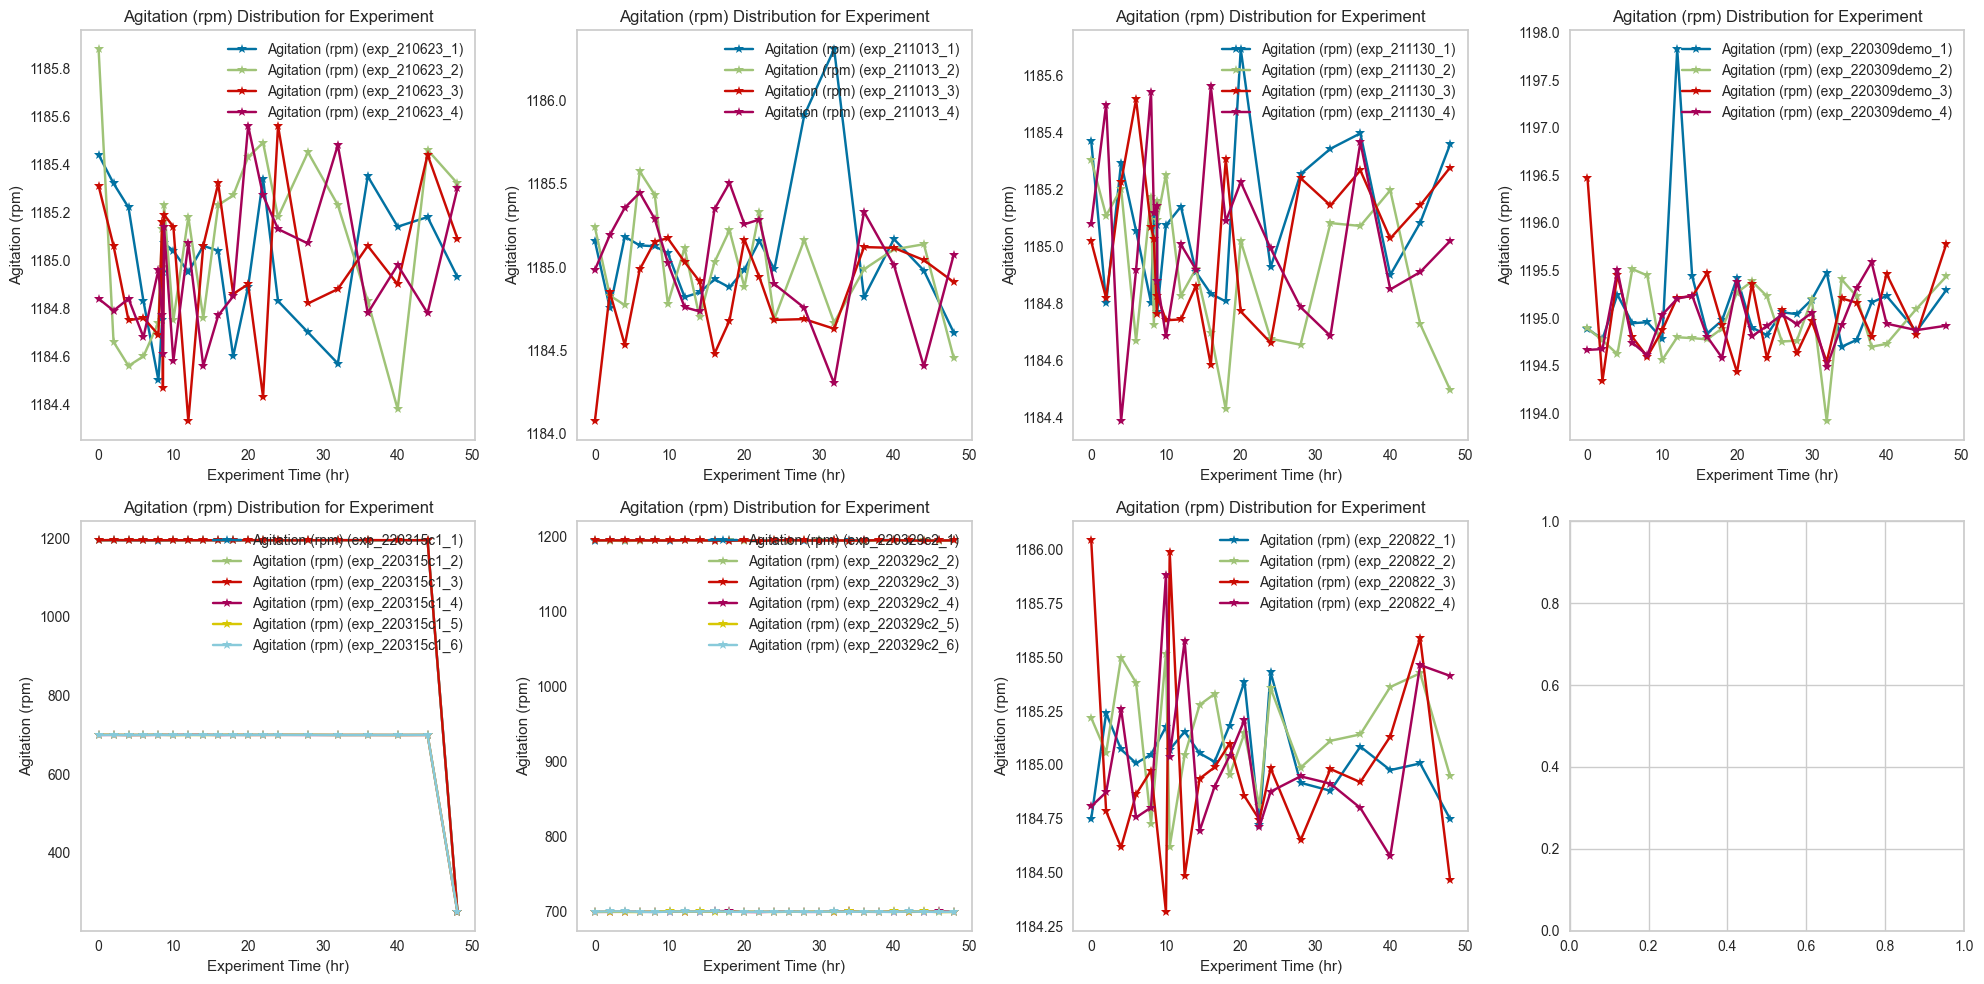

In [314]:
import matplotlib.pyplot as plt

# Assuming 'experiments' is a list of lists containing your DataFrames, and each DataFrame has a 'name' attribute
output_columns = ['OD600nm', 'Wet Cell Weight (g/L)', 'Agitation (rpm)']

plot_timeseries(experiment_groups, output_columns, save = False)


> Nutrients Concentrations and its impact on Protein Production (OD600, WCW_gl)

In [315]:
# output_glucose_gl (Glucose concentration): 
    # As a primary carbon source, glucose availability directly affects cell growth and energy metabolism. However, excessive glucose 
    # can lead to undesirable by-products like acetate in E. coli, which can inhibit growth and protein production.
    
# output_glycerol_gl (Glycerol concentration): 
    # Glycerol can be used as an alternative carbon source in some fermentation processes, influencing cell growth and protein expression 
    # differently than glucose.

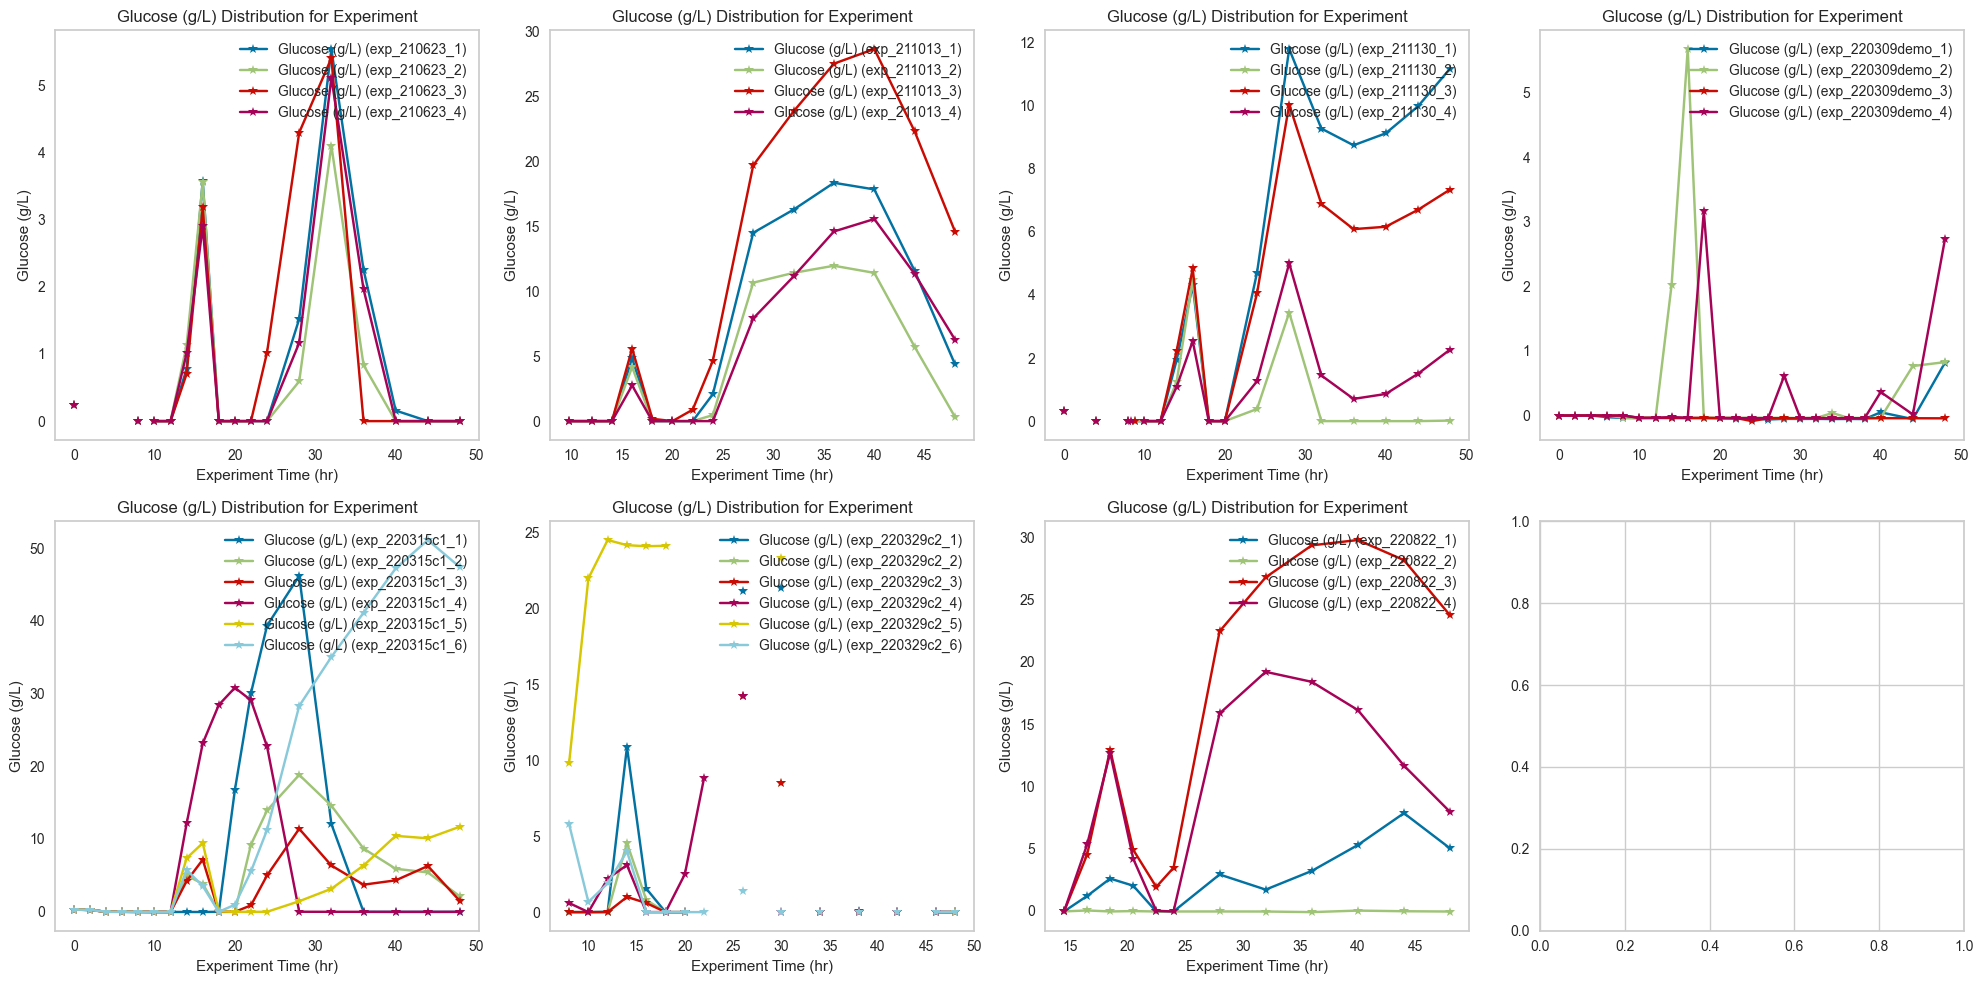

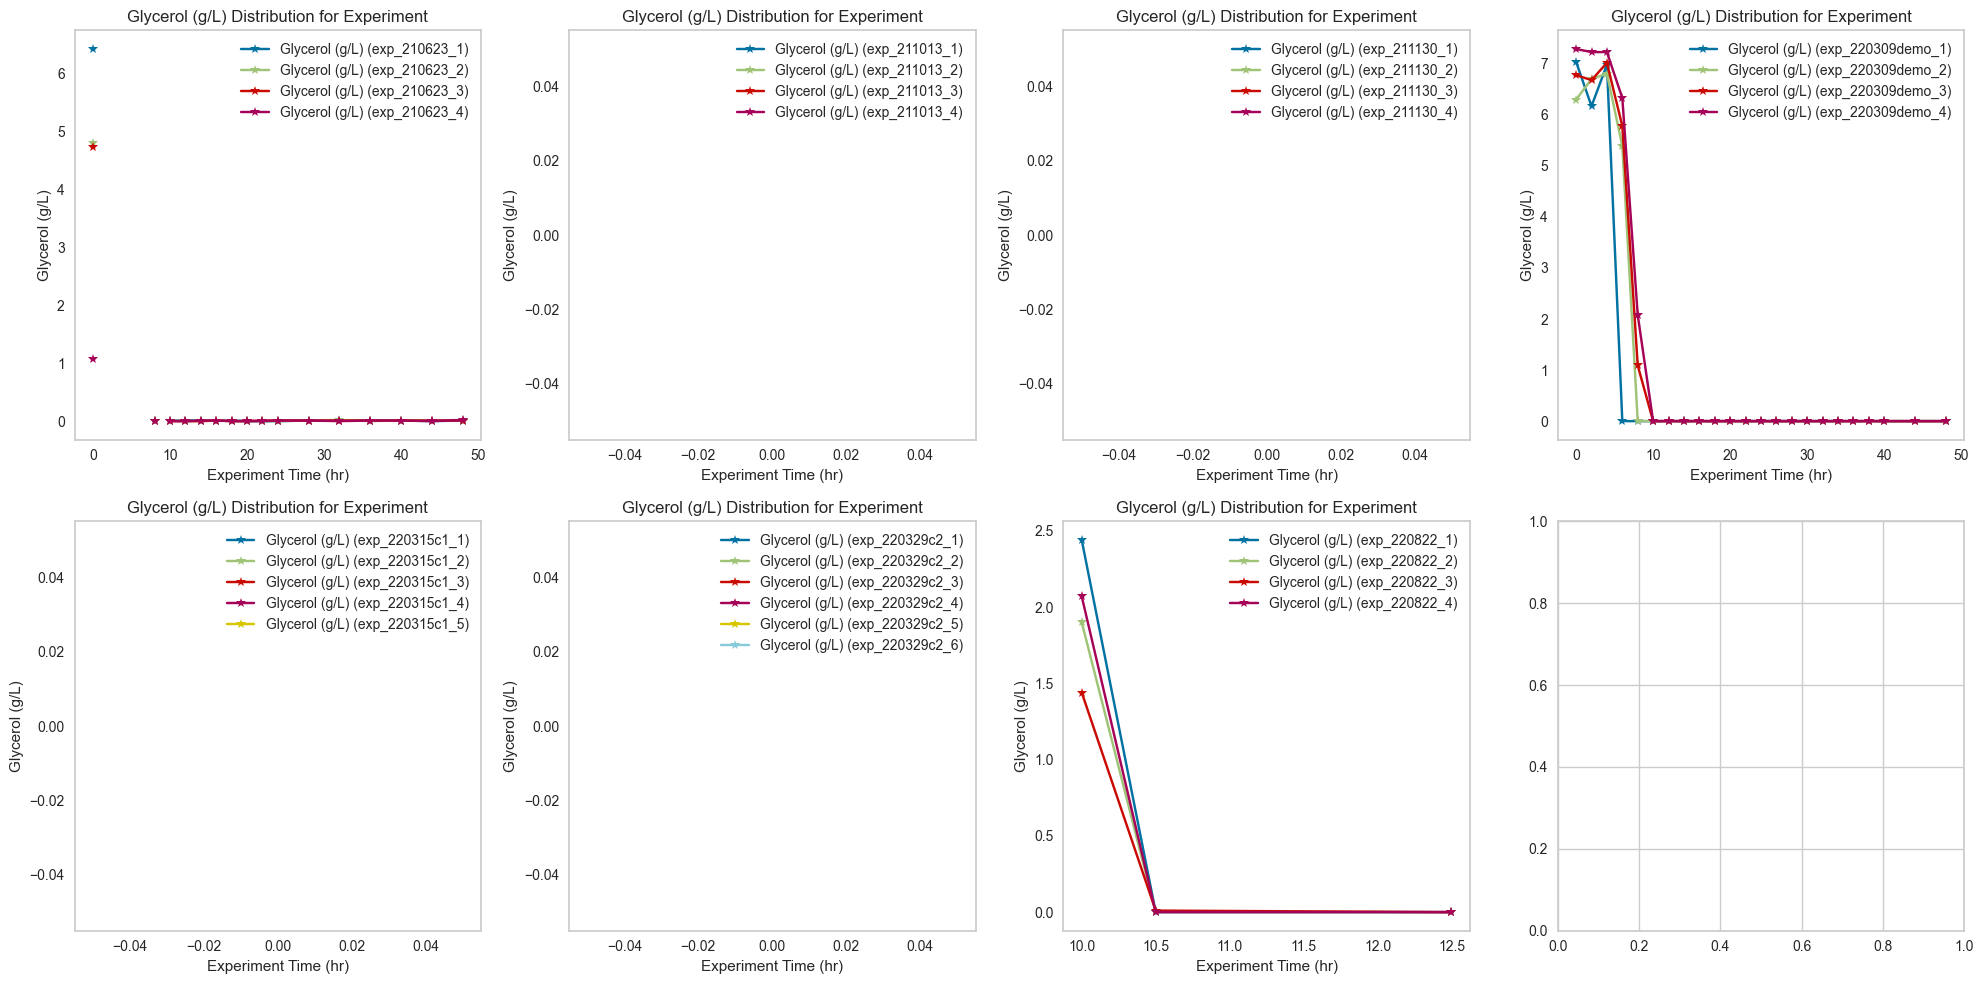

In [316]:
# Assuming 'experiments' is a list of lists containing your DataFrames, and each DataFrame has a 'name' attribute
output_columns = ['Glucose (g/L)', 'Glycerol (g/L)']

plot_timeseries(experiment_groups, output_columns, save= False)

>       Error in glucose concentration for exp_220329c2

> Environmental Conditions:

In [317]:
# output_Temp (Temperature): 
    # Temperature profoundly influences cellular metabolism, protein folding, and the stability of the expressed protein. 
    # Optimal temperatures can enhance protein yield and functionality.
    
# output_Ph (pH): 
    # The pH of the culture medium affects enzyme activity, protein stability, and cell growth. Maintaining an optimal pH is crucial 
    # for maximizing protein production.
    
    # The pH scale is a numerical scale used to specify the acidity or basicity of an aqueous solution. It ranges from 0 to 14, 
    # with 7 being neutral. Solutions with a pH less than 7 are acidic, and those with a pH greater than 7 are basic (or alkaline).

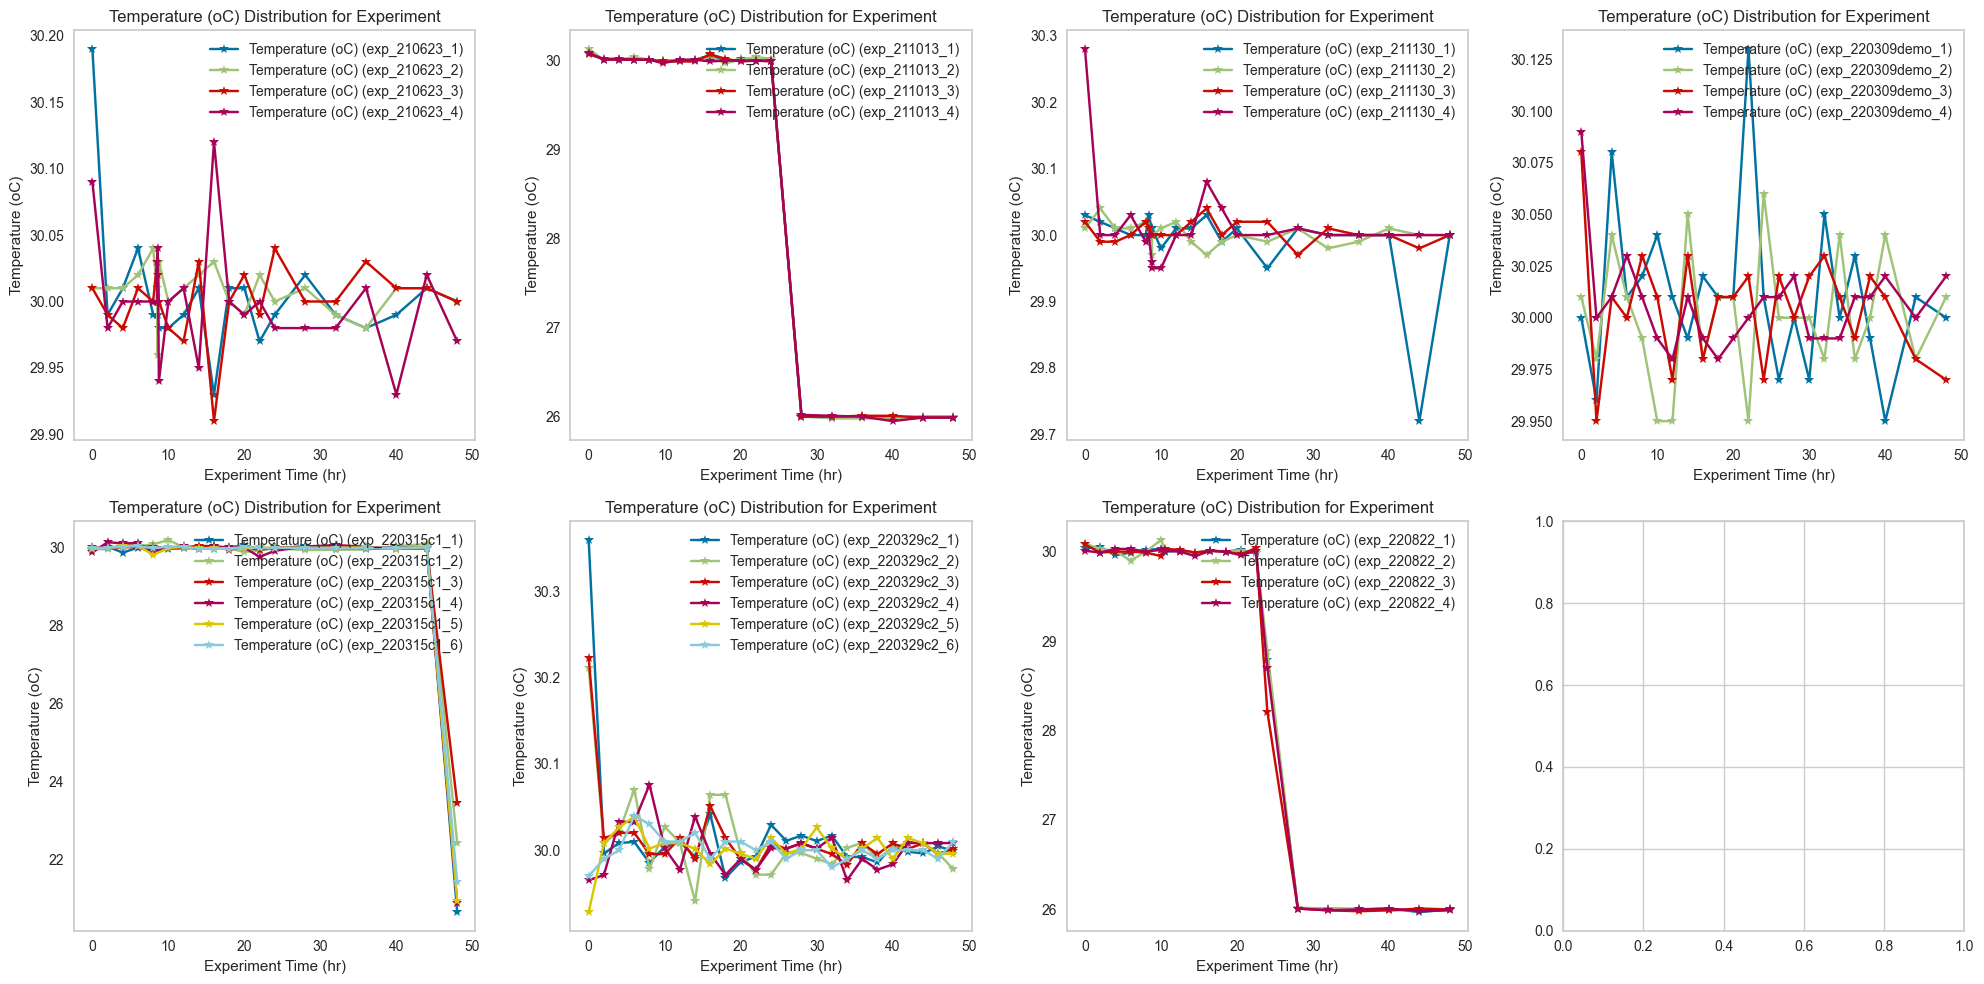

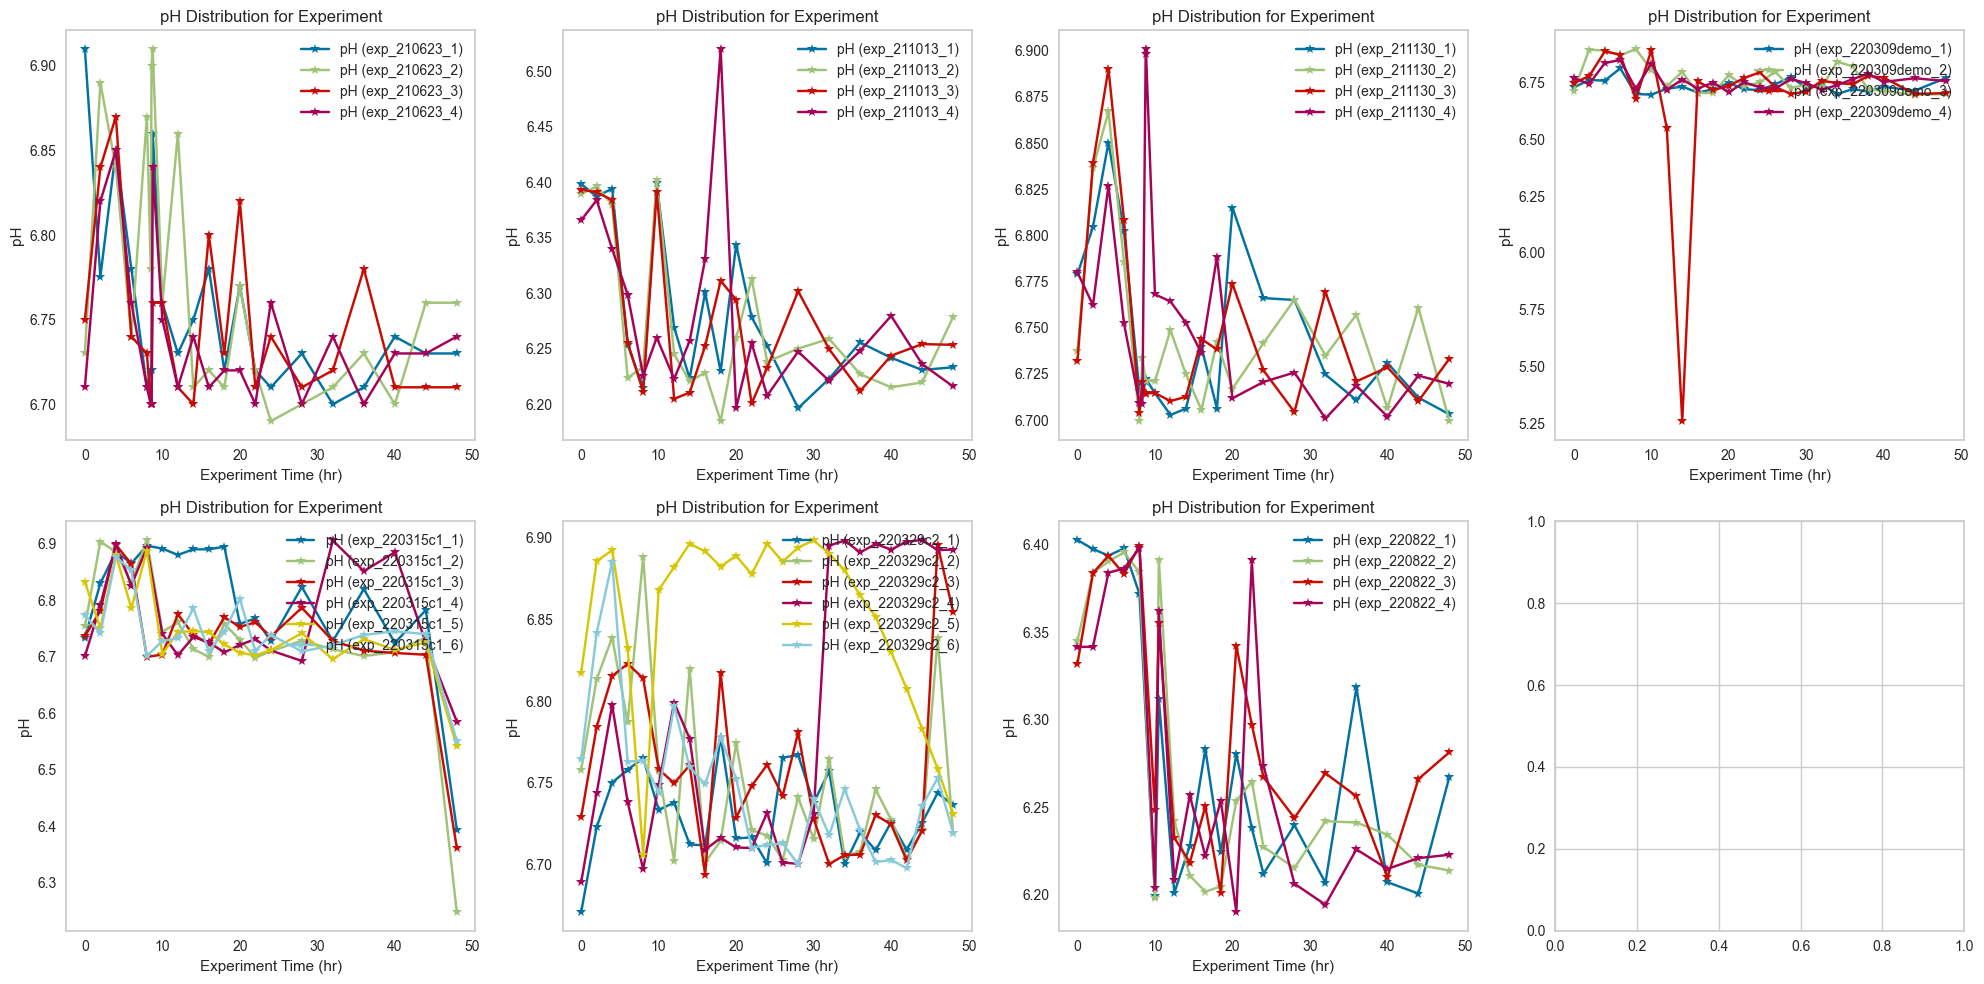

In [318]:
env_cols = ['Temperature (oC)', 'pH']

plot_timeseries(experiment_groups, env_cols, save = False) 

> Nutrients

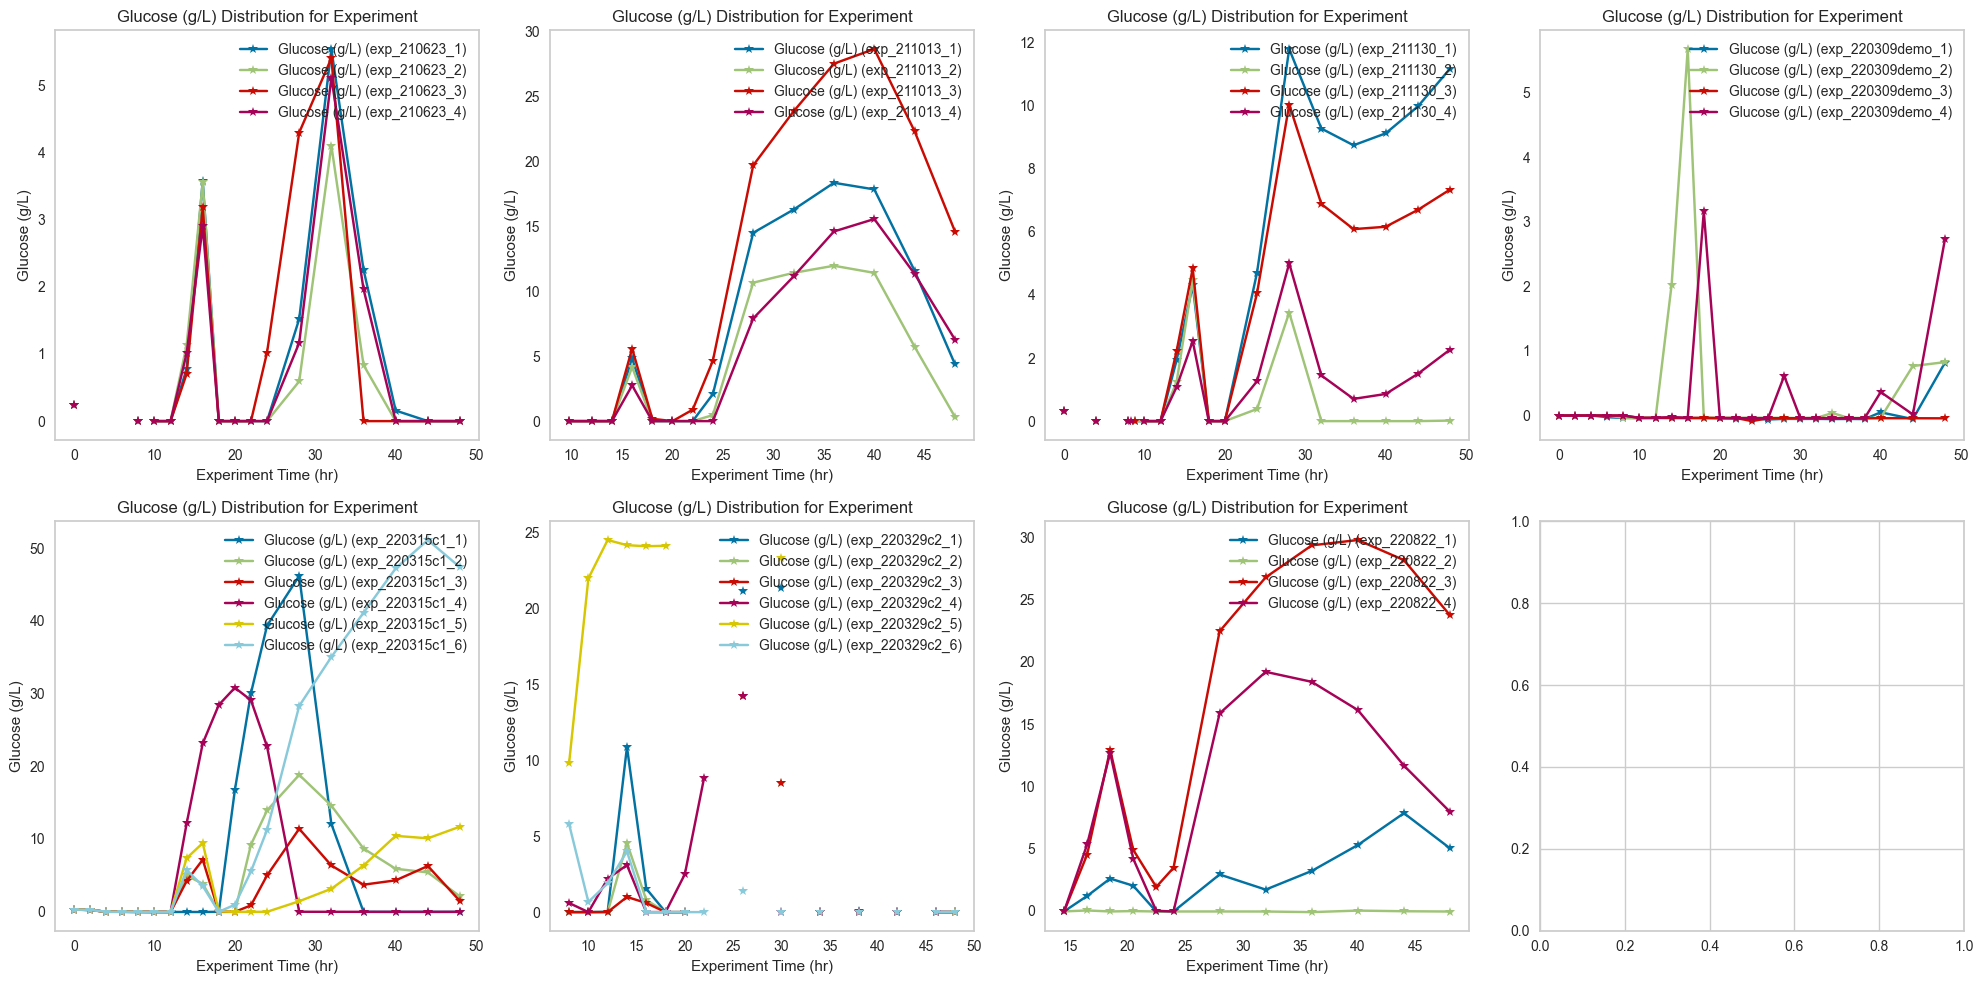

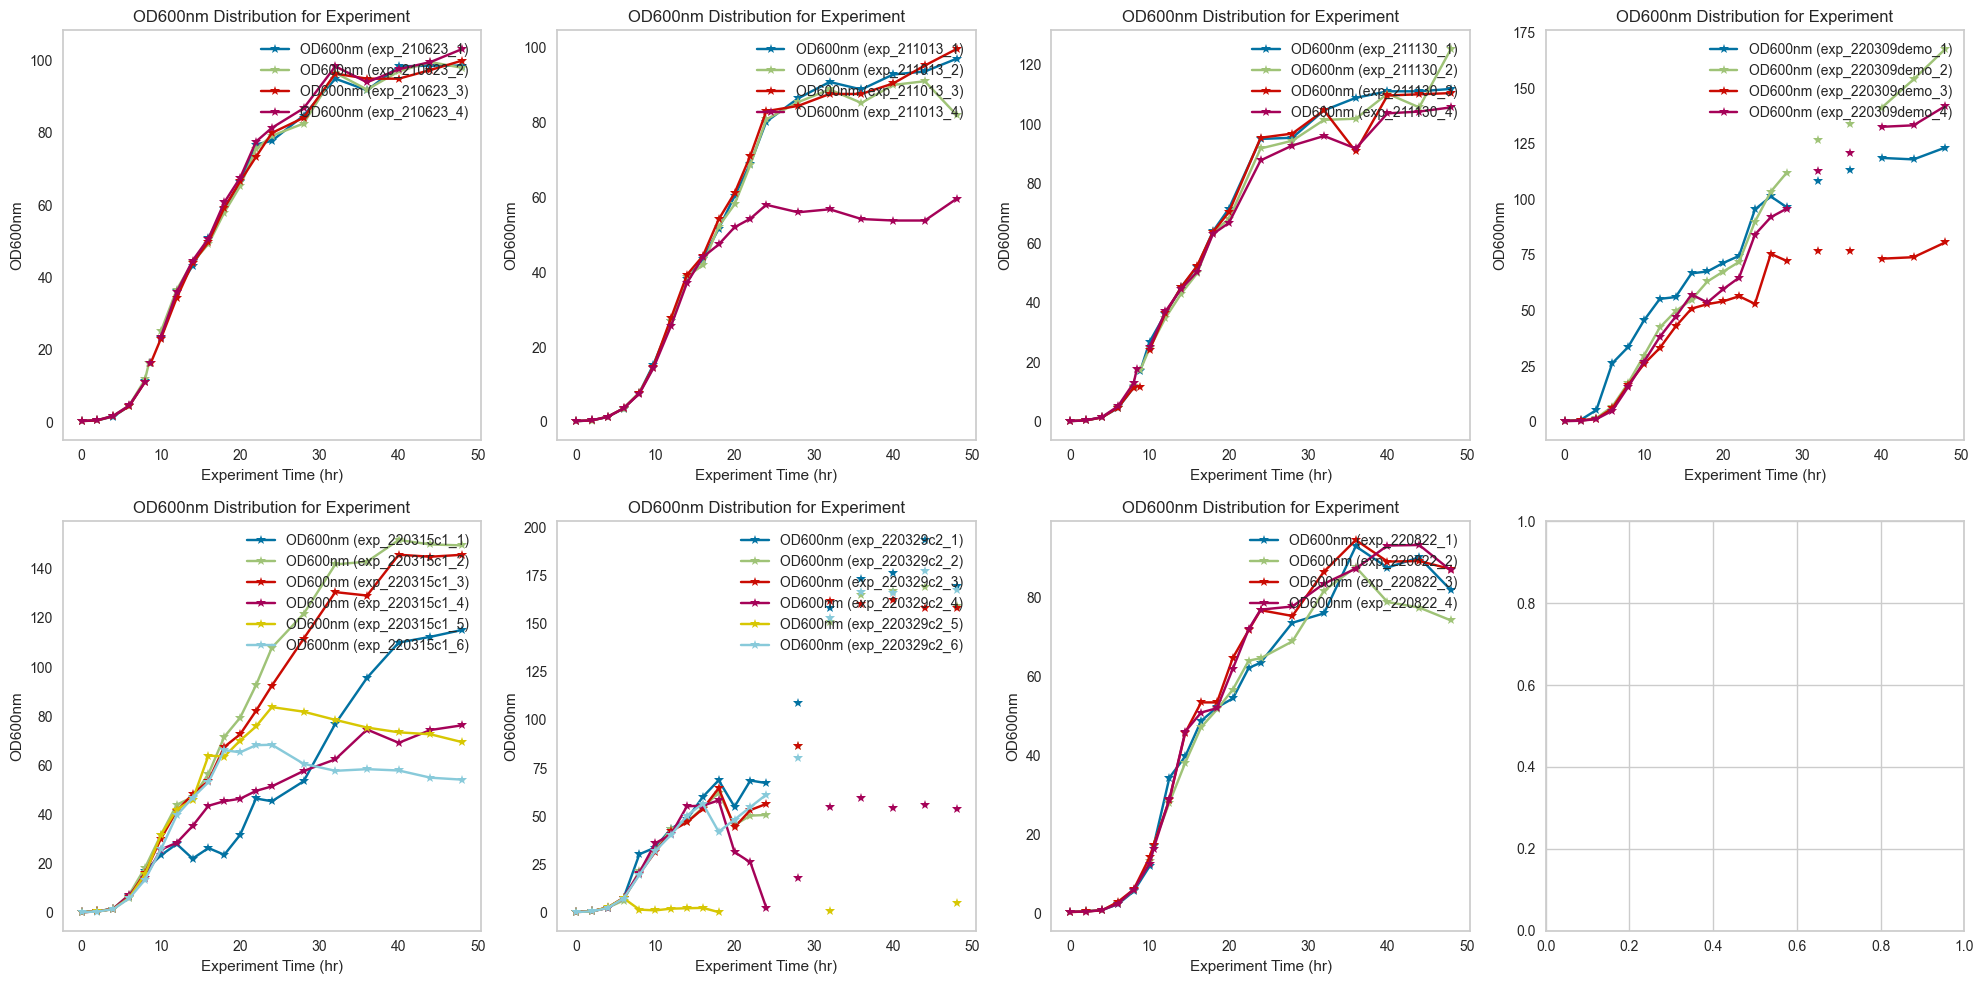

In [319]:
env_cols = ['Glucose (g/L)', 'OD600nm']

plot_timeseries(experiment_groups, env_cols, save = False)

>> EDA on two batch categories

In [320]:
# [df.columns for df in df_c1c2][0]

In [321]:
c1c2_batches = [ 'exp_220315c1_1', 'exp_220315c1_2', 'exp_220315c1_3', 'exp_220315c1_4', 'exp_220315c1_5', 'exp_220315c1_6',
                'exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6',]

# def load_batch (experiments):
#     # Load the data
#     df_list = pd.DataFrame()
#     if isinstance(experiments, list):
#         for exp in experiments:
#             df = pd.read_csv(f"data/final_cleaned/{exp}.csv", index_col='input_Timepoint (hr)', parse_dates=True)
#             df_list = pd.concat([df_list, df], axis = 0)
        
#     else:
#         df_list = pd.read_csv(f"data/final_cleaned/{experiments}.csv", index_col='input_Timepoint (hr)', parse_dates=True)
    
#     df_list.drop(columns = invariant_cols, axis=1, inplace=True)
#     return df_list

def plot_timeseries_list (experiment_data, cols_to_plot, marker = '*' , linestyle='-', color=None, save = False):
    for output_col in cols_to_plot:
        fig, ax = plt.subplots(3, 4, figsize=(20, 10))  # Adjusted figsize for better visibility

        for i, df in enumerate(experiment_data):
            # Calculate row and column index for subplots
            row = i // 4  # Integer division to get the row index
            col = i % 4  # Modulus to get the column index

            # Plot the specified output column on the subplot
            try:
                if df[output_col].isnull != True:
                    ax[row, col].plot(df.index, df[output_col], label=output_col, marker = marker, linestyle=linestyle, color=color)
                    ax[row, col].set_xlabel(f"Experiment Time (hr) for {df.name}")
                    ax[row, col].set_ylabel(output_col)  # Set ylabel specific to the output column
                    
                    label=f"{output_col} ({getattr(df, 'name', f'DataFrame {j+1}')})"

                    ax[row, col].legend()

                    # Use the DataFrame's 'name' attribute for the subplot title, if available
                    exp_name = getattr(df, 'name', f'Exp {i+1}')
                    ax[row, col].set_title(f"{output_col} distribution for {'_'.join(exp_name.split('_')[:2])}")
            
            except:
                pass
        if save:
            plt.savefig(f"images/c1c2/{output_col}_timeseries.png")
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()  # Display the plot for the current output column
        
df_c1c2 = load_data(c1c2_batches)

for df in df_c1c2:
    df.drop(columns = invariant_cols, axis=1, inplace=True)    

# c1c2_df = pd.concat((df_c1c2[0], df_c1c2[1:]), axis=0)

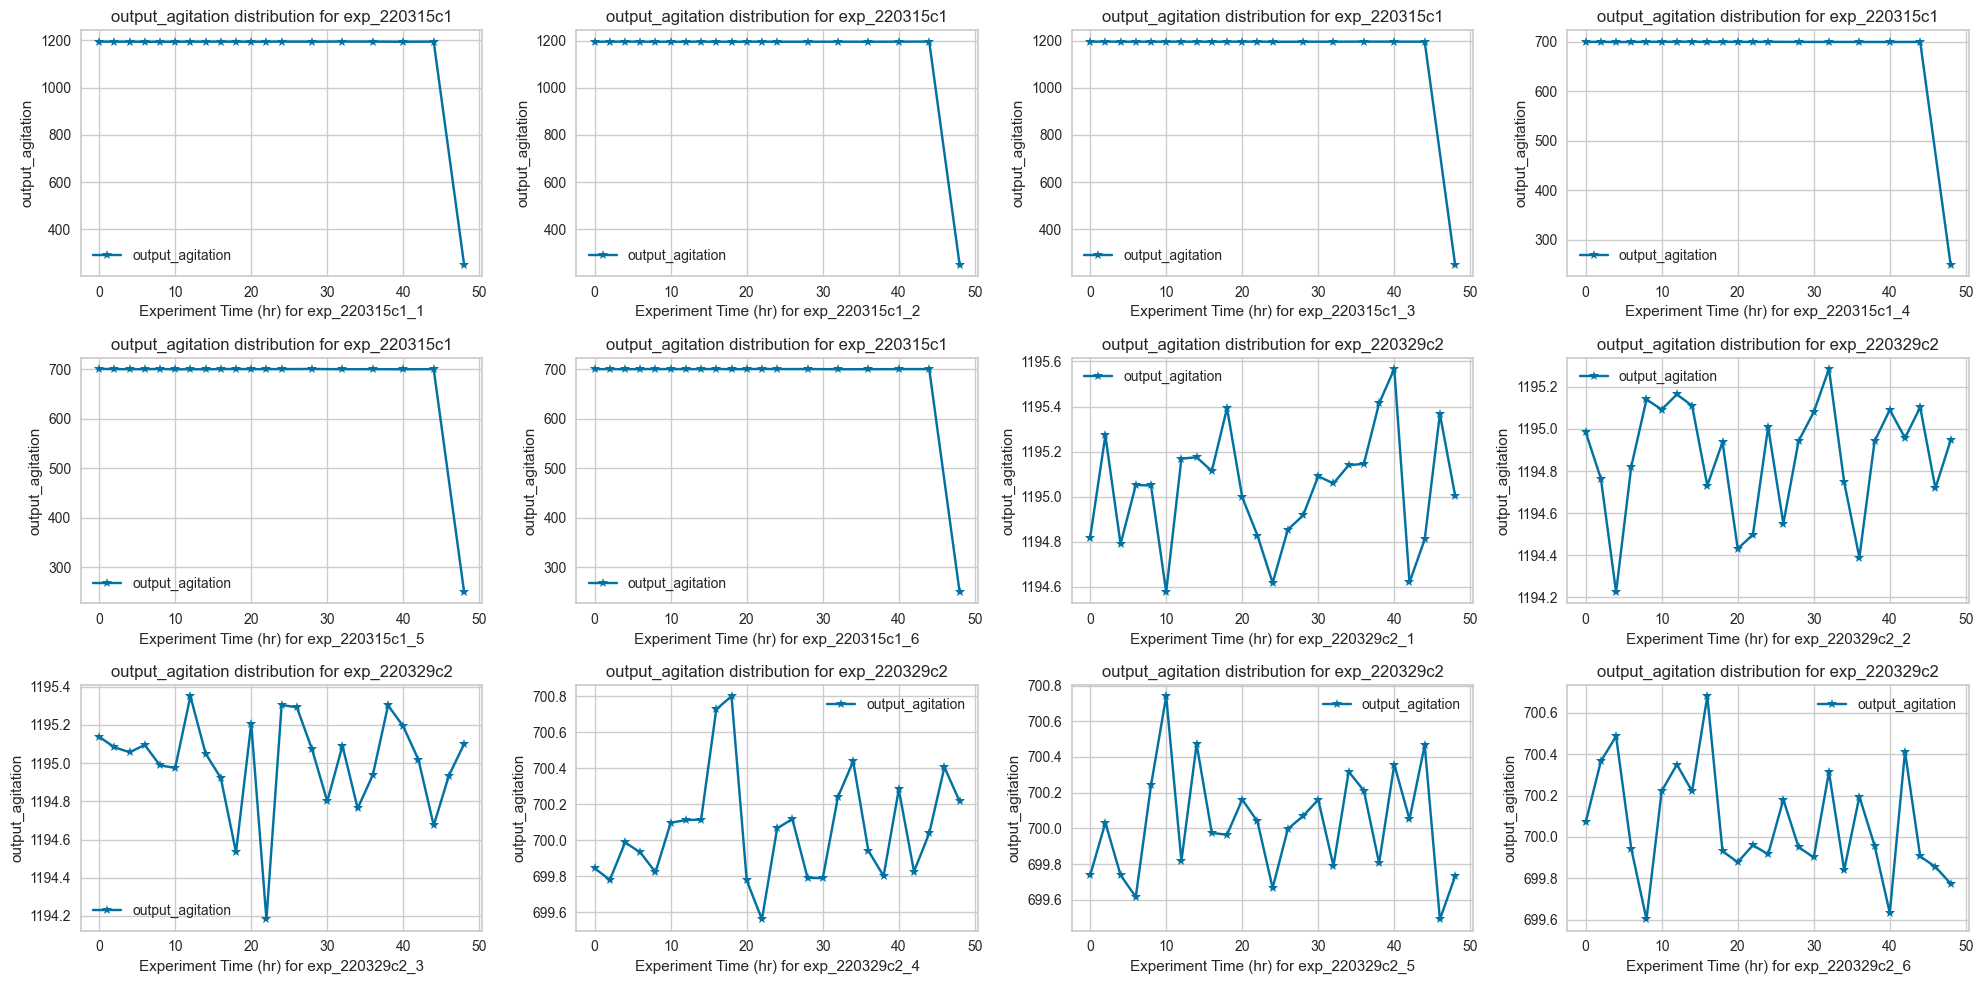

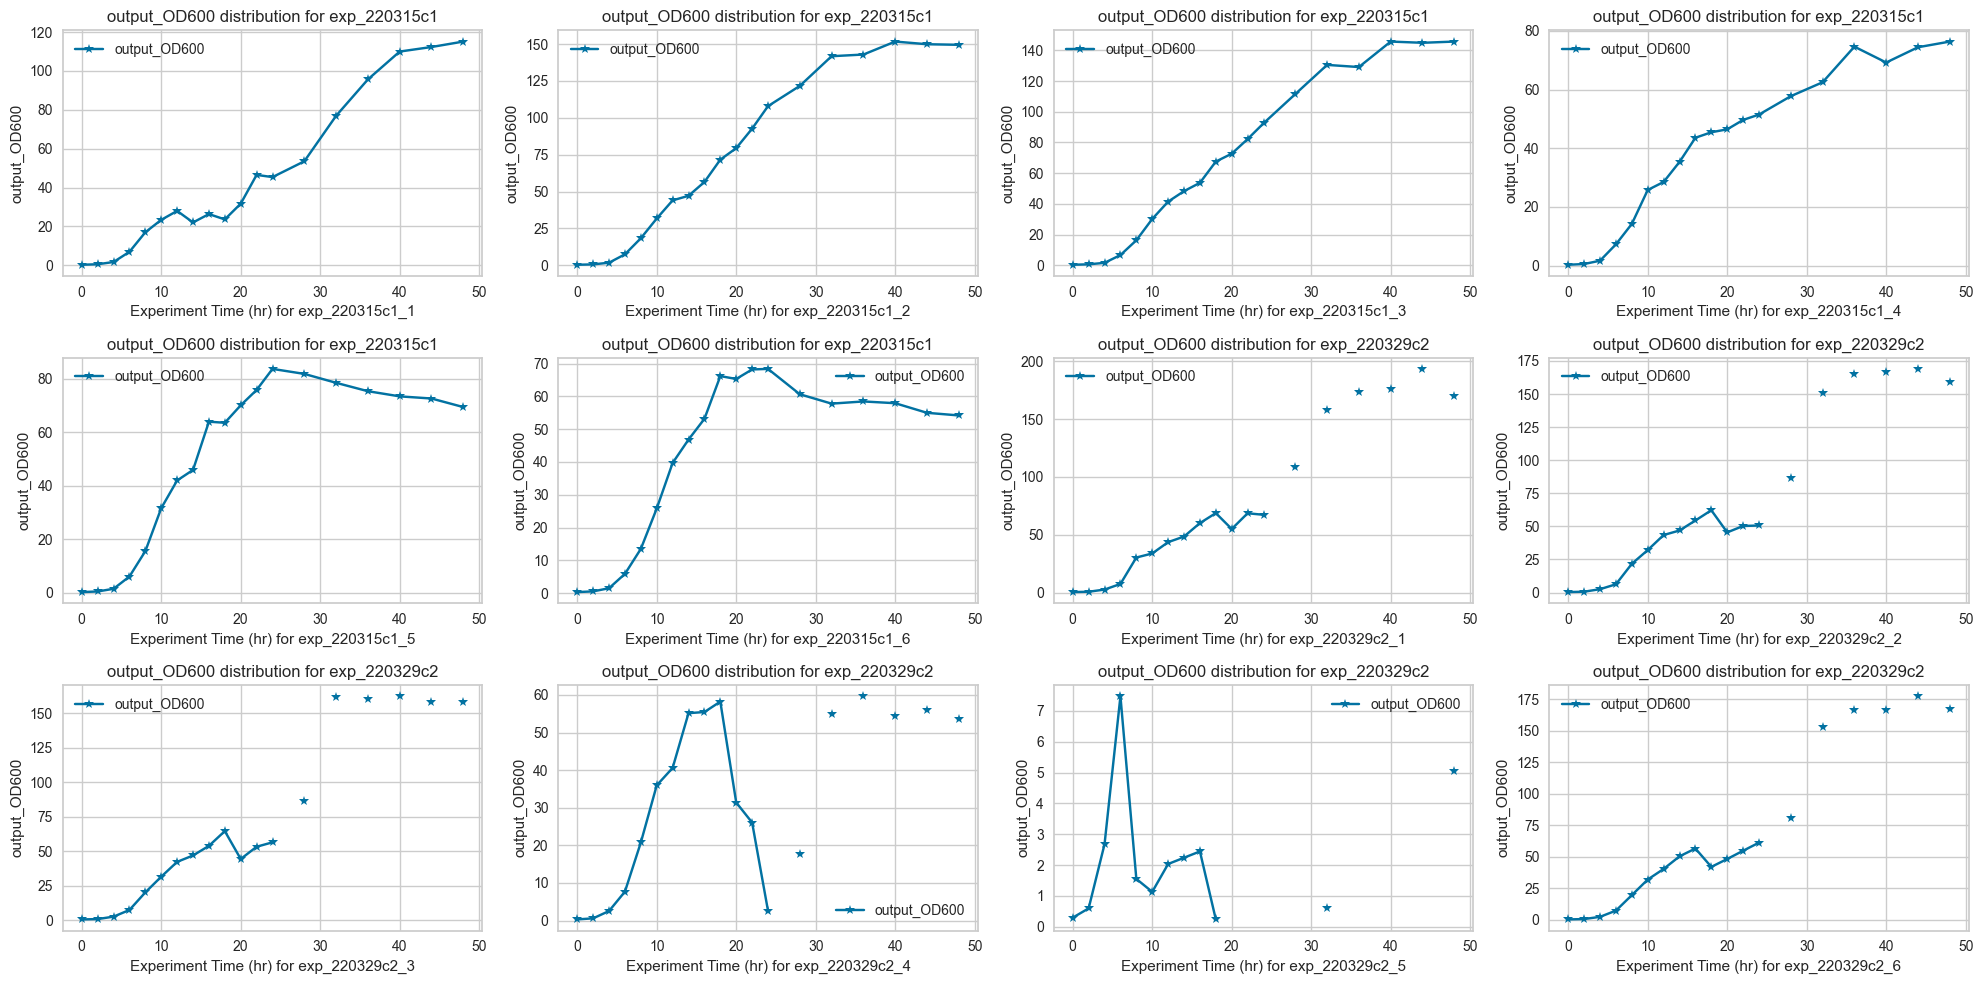

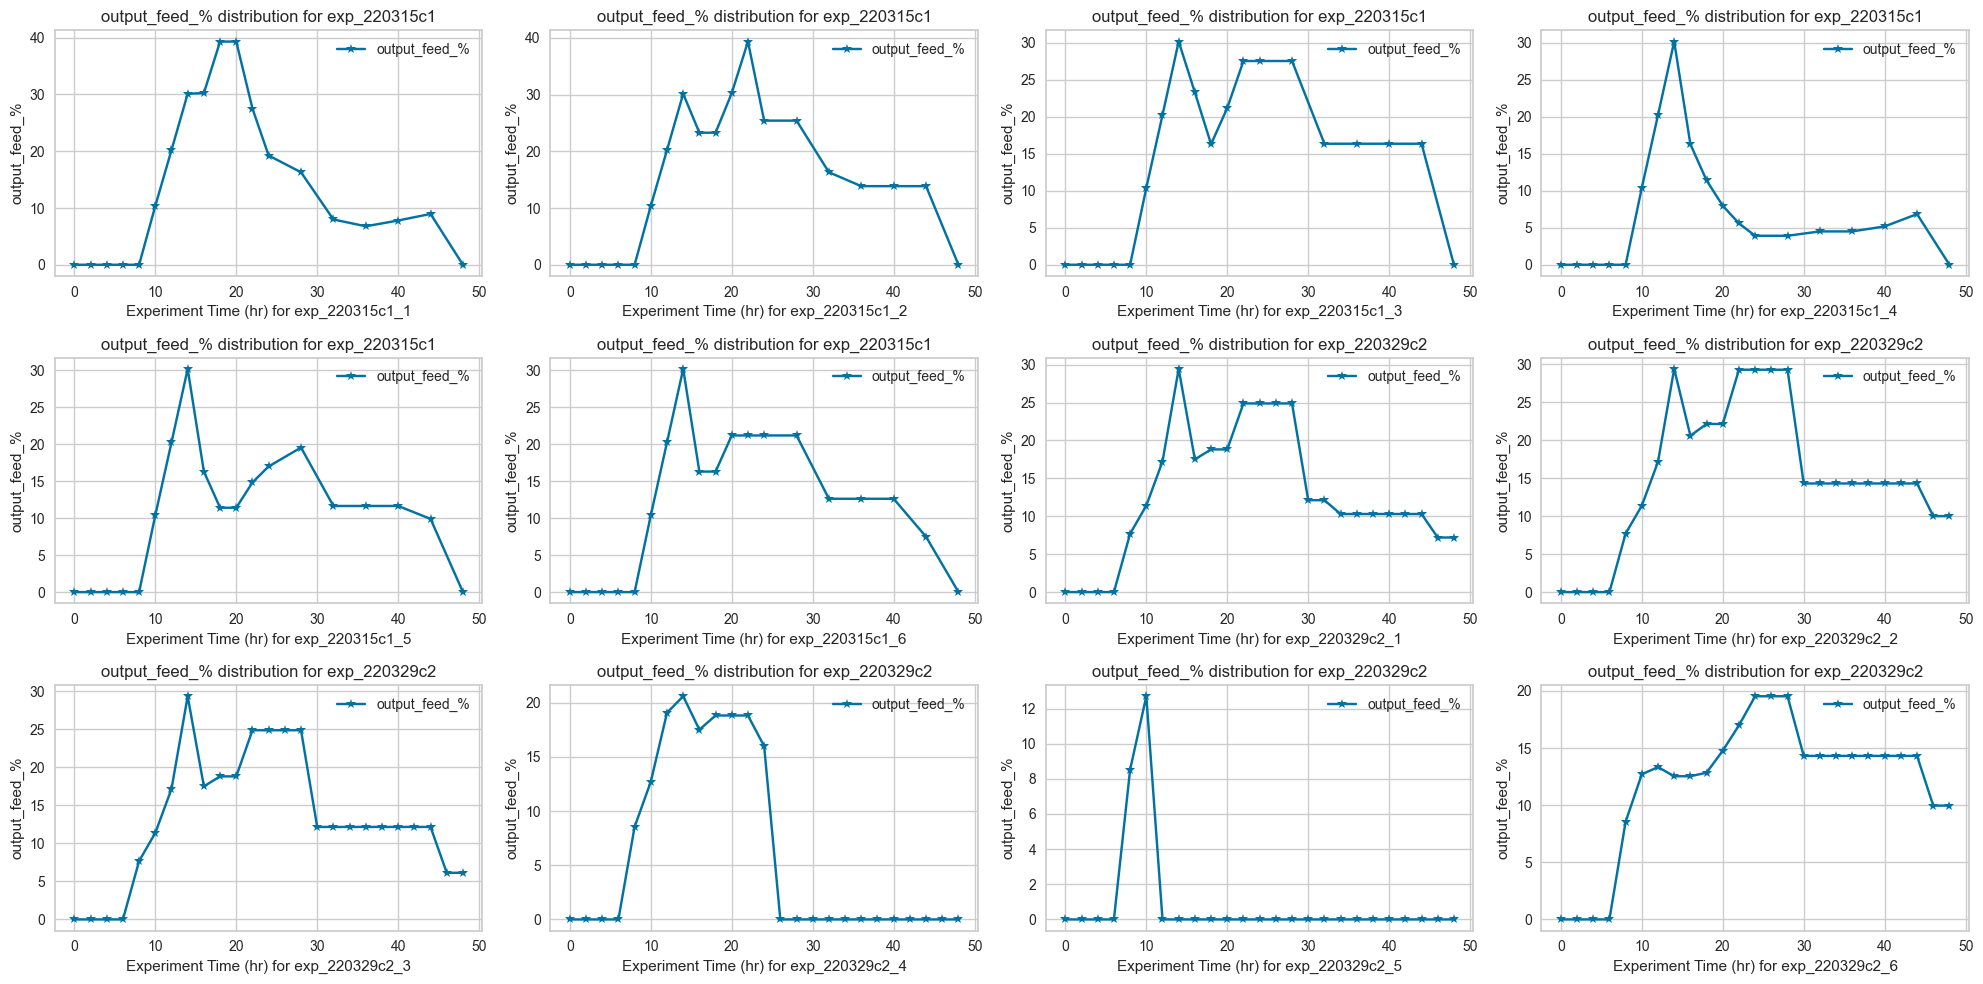

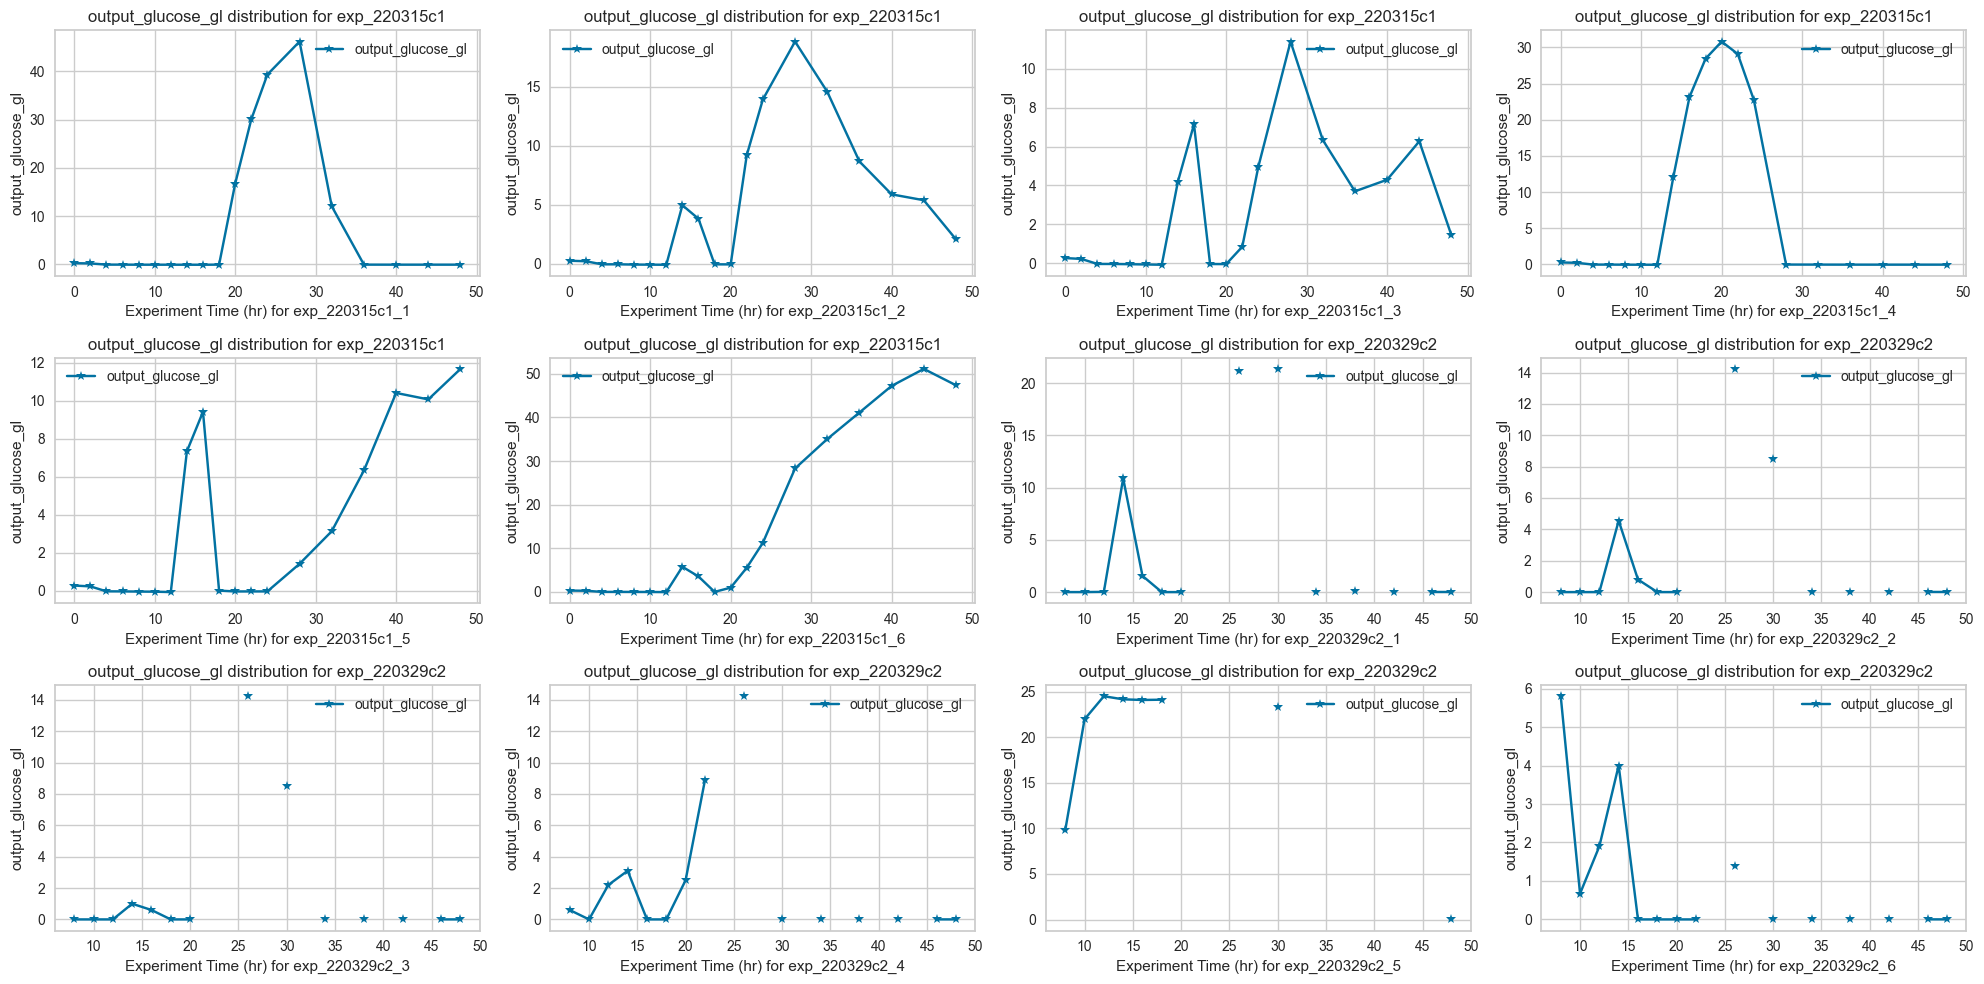

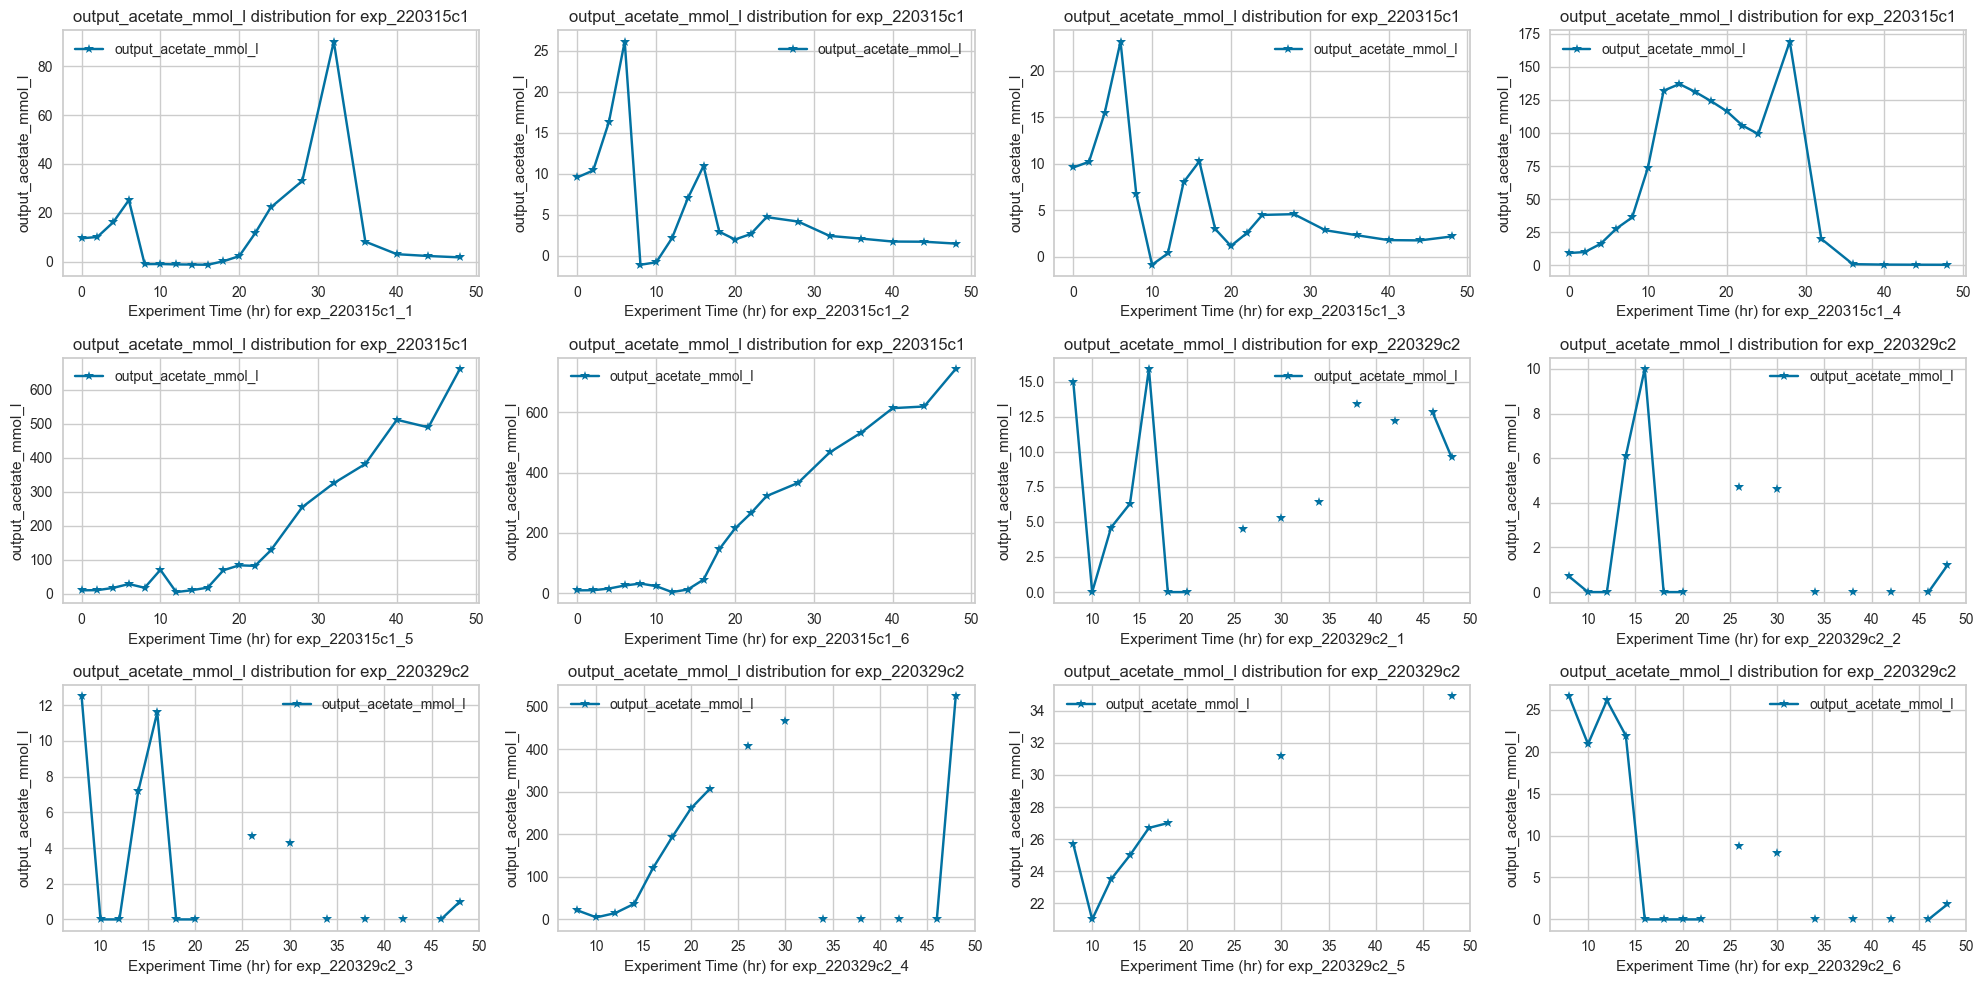

In [322]:
plot_timeseries_list(df_c1c2, ['output_agitation', 'output_OD600', 'output_feed_%', 'output_glucose_gl', 'output_acetate_mmol_l'], save = False) 

In [323]:
# Batch 1: This is the entire dataset. (combined_data.csv or combined_data_extra.csv with missing data imputation)

In [324]:
# Batch 2: Only clean dataset (removed C1-4,5,6 and all C2 batches)         # Acetate levels were too high for C1-4, 5, 6; Agitation was low, and OD was low.
w0_c123 = ['exp_220315c1_4', 'exp_220315c1_5', 'exp_220315c1_6',
            'exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6' ]

data_w_c123 = [df for df in experiment_data if df.name not in w0_c123]
data_w_c123 = pd.concat(data_w_c123)
# save_csv(data_w_c123, 'data/use_to_code/data_w_c123.csv')       # All Data without C1-4,5,6 and C2 batches 
# ---------------------------------------------------------------------------------------------------------------------------


In [325]:
# Batch 3: Fairly Good Data (removed all C2 batches)            # Acetate levels were too high for C1-4, 5, 6
w0_c1 = ['exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6' ]

data_w0_c2 = [df for df in experiment_data if df.name not in w0_c123]
data_w0_c2 = pd.concat(data_w0_c2)
# save_csv(data_w0_c2, 'data/use_to_code/data_w0_c2.csv')         # All Dataframes without C2 batches
# ---------------------------------------------------------------------------------------------------------------------------


In [326]:
# # Batch 4: Fairly Good Data (removed all C2 batches)            # Acetate levels were too high for C1-4, 5, 6
# w0_c1 = ['exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6' ]

# data_w0_c2 = [df for df in experiment_data if df.name not in w0_c123]
# data_w0_c2 = pd.concat(data_w0_c2)
# # save_csv(data_w0_c2, 'data/use_to_code/data_w0_c2.csv')         # All Dataframes without C2 batches
# # ---------------------------------------------------------------------------------------------------------------------------


In [327]:
# # Batch 5: Fairly Good Data (removed all C2 batches)            # Acetate levels were too high for C1-4, 5, 6
# w0_c1 = ['exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6' ]

# data_w0_c2 = [df for df in experiment_data if df.name not in w0_c123]
# data_w0_c2 = pd.concat(data_w0_c2)
# # save_csv(data_w0_c2, 'data/use_to_code/data_w0_c2.csv')         # All Dataframes without C2 batches
# # ---------------------------------------------------------------------------------------------------------------------------


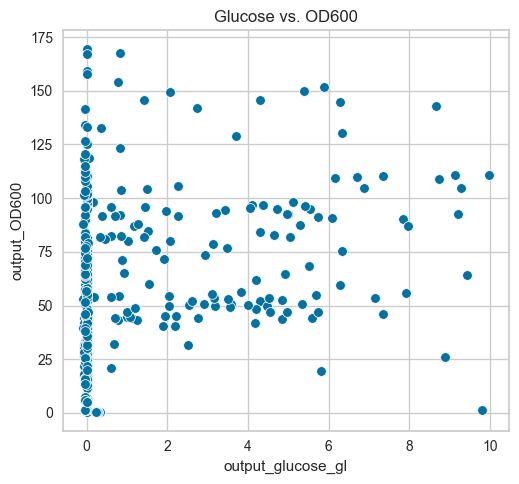

In [328]:

# Scatter plot for Glucose vs. OD600

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
# sns.scatterplot(x='output_glycerol_gl', y='output_OD600', data=df_combined)
sns.scatterplot(x='output_glucose_gl', y='output_OD600', data=df_combined.query('output_glucose_gl < 10'))
plt.title('Glucose vs. OD600')
plt.tight_layout()
# plt.savefig("images/scatter_plots/glucose_vs_OD600.png" , dpi = 300)
plt.show()


> Visualize Outliers

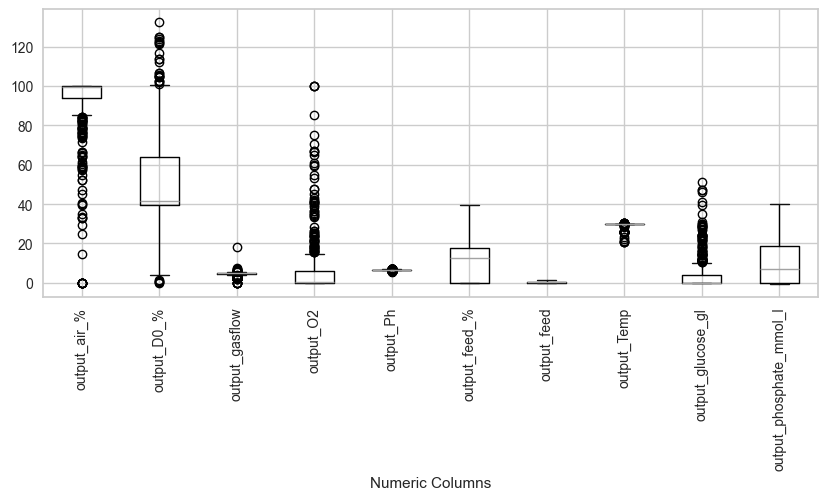

In [329]:

def visualize_outlier (df: pd.DataFrame, save = None):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=["float64", "int64"])
    # Set figure size and create boxplot
    fig, ax = plt.subplots(figsize=(12, 6))
    numeric_cols.boxplot(ax=ax, rot=90)
    # Set x-axis label
    ax.set_xlabel("Numeric Columns")
    # Adjust subplot spacing to prevent x-axis labels from being cut off
    plt.subplots_adjust(bottom=0.4) 
    # Increase the size of the plot
    fig.set_size_inches(10, 6)
    if save is not None:
        plt.savefig(f"images/boxplots/{save}" , dpi=300)
    # Show the plot
    plt.show()



visualize_outlier(df_combined.drop(columns = ['output_OD600','output_WCW_gl','output_acetate_mmol_l', 'output_agitation'], axis=1), save = 'boxplot_1.png')

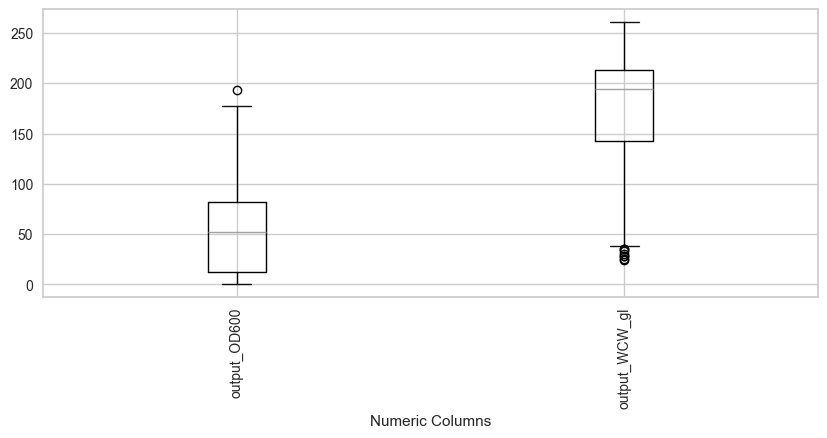

In [330]:
visualize_outlier(df_combined.loc[:, ['output_OD600','output_WCW_gl','output_acetate_mmol_l']], save = 'boxplot_2.png')

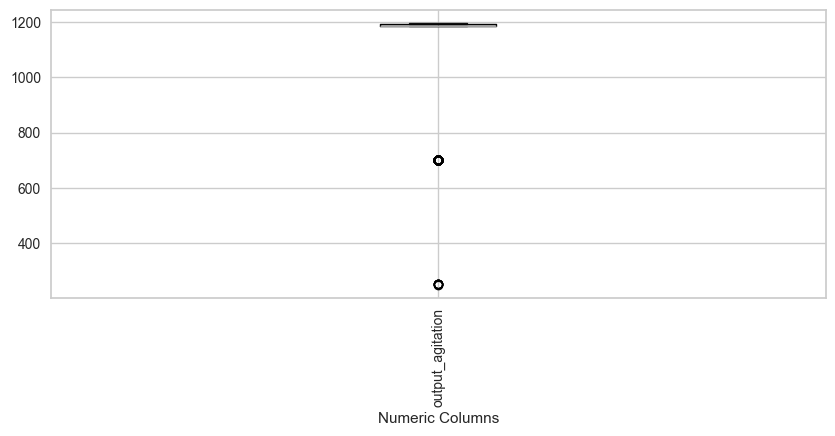

In [331]:
visualize_outlier(df_combined.loc[:, ['output_agitation']], save = 'boxplot_3.png')

In [332]:
# #Visualizing Regression outliers using Cook's distance
# from yellowbrick.regressor import CooksDistance


# # # Instantiate and fit the visualizer
# visualizer = CooksDistance()
# visualizer.fit(df_combined_extra.drop(columns = "output_OD600"), df_combined_extra["output_OD600"])
# visualizer.show() 

> Missing Value Imputation

In [333]:
# lets assume that WCW is 0 when input timepoint(hr) is 0, 2, 4 etc. we can fill in the missing values with 0.

#' @param tp Time point to fill in the missing values
df.query(' `input_Timepoint (hr)` == 0')['output_WCW_gl'].apply(lambda x: 0)
df.head()

output_OD600  output_WCW_gl  output_agitation  output_air_%  output_D0_%  output_gasflow  output_O2  output_Ph  output_feed_%  output_feed  output_Temp  output_glycerol_gl  output_glucose_gl  output_acetate_mmol_l  output_phosphate_mmol_l
input_Timepoint (hr)                                                                                                                                                                                                                                                
0                         0.300333            NaN        700.069885    100.000000    99.690483        2.500000   0.000000   6.764720           0.00       0.0000        29.97                 NaN                NaN                    NaN                      NaN
2                         0.597667            NaN        700.365723    100.000000    94.498177        2.500000   0.000000   6.841582           0.00       0.0000        29.99                 NaN                NaN                    NaN                      NaN
4                         2.353333            NaN        700.487000    100.000000    79.749283        2.500000   0.000000   6.885070           0.00       0.0000        30.00                 NaN                NaN                    NaN                      NaN
6                         7.293333           67.5        699.942627     87.418007    37.475819        2.479951  12.593660   6.763034           0.00       0.0000        30.04                 NaN                NaN                    NaN                      NaN
8                        19.566667            NaN        699.600586     58.971600    39.727619        2.559998  41.033772   6.763709           8.55       0.2907        30.03                 NaN                5.8                   26.6                     18.6

In [334]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor    

def convert_WCW_zero(df):
    df['output_WCW_gl'] = df.apply(lambda row: 0 if row['input_Timepoint (hr)'] in [0, 1, 2] else row['output_WCW_gl'], axis=1)
    return df


def impute_missing_values_iteratively(X): #or (X, Columns)
    X = convert_WCW_zero(X)
    for column in X.columns: 
        if X[column].dtype != 'float64':
            print(f"Converting {column} to float")
            try:
                X[column] = pd.to_numeric(X[column], errors='coerce')
                X[column] = X[column].astype('float64')
            except ValueError as e:
                print(f"Error converting {column} to float: {e}")
                pass # Skip this column, it can't be converted to float
    
    imputer = IterativeImputer(
        # estimator = RandomForestRegressor() 
        estimator=RandomForestRegressor(n_estimators=100, random_state=0), # the estimator to predict the NA
        initial_strategy='mean', # how will NA be imputed in step 1
        max_iter=10, # number of cycles
        imputation_order='ascending', # the order in which to impute the variables
        n_nearest_features=None, # whether to limit the number of predictors
        skip_complete=True, # whether to ignore variables without NA
        random_state=0,)
        
    # select only the columns with missing values to be imputed
    # X_cols = X[columns]
    X_imputed = imputer.fit_transform(X) #or X_cols
    X_imputed = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)
    return X_imputed



def set_reset_index(df, action: str):
    if action == 'set':
        df.set_index('input_Timepoint (hr)', inplace=True)
    elif action == 'reset':
        df.reset_index(inplace=True)
        if 'index' in df.columns:
            df.drop(columns = 'index', inplace=True)
        # del df['index']
    else:
        print('Invalid action. Please enter either "set" or "reset"')
    return df

# reset index
df_combined = set_reset_index(df_combined, action='reset')
data_w_c123 = set_reset_index(data_w_c123, action='reset')
data_w0_c2 = set_reset_index(data_w0_c2, action='reset')


# perform missing value inputation
df_combined_extra = impute_missing_values_iteratively(df_combined)
data_w_c123_extra = impute_missing_values_iteratively(data_w_c123)
data_w0_c2_extra = impute_missing_values_iteratively(data_w0_c2)

# set index
df_combined_extra = set_reset_index(df_combined_extra, action='set')
data_w_c123_extra = set_reset_index(data_w_c123_extra, action='set')
data_w0_c2_extra = set_reset_index(data_w0_c2_extra, action='set')




Converting output_glycerol_gl to float
Converting output_acetate_mmol_l to float


Converting output_glycerol_gl to float
Converting output_acetate_mmol_l to float
Converting output_glycerol_gl to float
Converting output_acetate_mmol_l to float


In [335]:
data_w0_c2_extra.iloc[22:,:].head()

output_OD600  output_WCW_gl  output_agitation  output_air_%  output_D0_%  output_gasflow  output_O2  output_Ph  output_feed_%  output_feed  output_Temp  output_glycerol_gl  output_glucose_gl  output_acetate_mmol_l  output_phosphate_mmol_l
input_Timepoint (hr)                                                                                                                                                                                                                                                
0.0                          0.421           0.00           1185.88         100.0        97.67             5.0        0.0       6.73            0.0          0.0        30.01              4.8000           0.240000                 1.3900                  15.2500
2.0                          0.610           0.00           1184.66         100.0        97.96             5.0        0.0       6.89            0.0          0.0        30.01              4.5577           0.141609                 4.0998                  18.3925
4.0                          1.800           0.00           1184.56         100.0        98.66             5.0        0.0       6.84            0.0          0.0        30.01              4.5959          -0.000742                 9.1682                  20.5707
6.0                          4.610          42.90           1184.60         100.0        81.92             5.0        0.0       6.74            0.0          0.0        30.02              4.1631          -0.000652                17.6441                  19.3908
8.0                         11.840          52.41           1184.74         100.0        43.67             5.0        0.0       6.87            0.0          0.0        30.04              0.0000           0.000000                12.6300                  11.6000

In [336]:
def save_csv(df, name_path:str):
    df.to_csv(name_path, index=True)
    print(f"Data saved to {name_path}")
    
# save_csv(df_combined, r"data/use_to_code/combined_data.csv")              
# save_csv(df_combined_extra, r"data/use_to_code/combined_data_extra.csv")

# save_csv(data_w_c123_extra, r"data/use_to_code/data_w_c123_extra.csv")
# save_csv(data_w0_c2_extra, r"data/use_to_code/data_w0_c2_extra.csv")

In [337]:
os.getcwd()

'C:\\Users\\pault\\OneDrive - University of Oklahoma\\GRA - Bio-Manufacturing\\1. ML-Cytovance-OU-Research'

> Time Series Split (X_train, X_test)

In [338]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Assuming df_combined_extra is sorted by time
def timeseriessplit(df):
    # Separate features and target variable
    X = df.drop(columns=['output_OD600'])  # Features (exclude the target variable)
    y = df['output_OD600'].values  # Target variable

    # Define the number of splits for TimeSeriesSplit
    n_splits = 10  # Example value, adjust based on your dataset size and requirements

    # Initialize TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Loop through the splits
    for train_index, test_index in tscv.split(X):
        # Split the features
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        # Split the target variable
        y_train, y_test = y[train_index], y[test_index]

        # Now you have your train and test sets ready for each split
        # X_train, y_train can be used for training your model
        # X_test, y_test can be used for validating/testing your model

        # You can print the sizes of each split for verification
        print(f"TRAIN: {len(train_index)} samples, TEST: {len(test_index)} samples")

    return X_train, y_train, X_test, y_test



X_train, y_train, X_test, y_test = timeseriessplit(df_combined_extra)
X_train_c123, y_train_c123, X_test_c123, y_test_c123 = timeseriessplit(data_w_c123_extra)
X_train_w0c2, y_train_w0c2, X_test_w0c2, y_test_w0c2 = timeseriessplit(data_w0_c2_extra)

# try to increase the number of splits (maybe 10) 

TRAIN: 64 samples, TEST: 62 samples
TRAIN: 126 samples, TEST: 62 samples
TRAIN: 188 samples, TEST: 62 samples
TRAIN: 250 samples, TEST: 62 samples
TRAIN: 312 samples, TEST: 62 samples
TRAIN: 374 samples, TEST: 62 samples
TRAIN: 436 samples, TEST: 62 samples
TRAIN: 498 samples, TEST: 62 samples
TRAIN: 560 samples, TEST: 62 samples
TRAIN: 622 samples, TEST: 62 samples
TRAIN: 47 samples, TEST: 43 samples
TRAIN: 90 samples, TEST: 43 samples
TRAIN: 133 samples, TEST: 43 samples
TRAIN: 176 samples, TEST: 43 samples
TRAIN: 219 samples, TEST: 43 samples
TRAIN: 262 samples, TEST: 43 samples
TRAIN: 305 samples, TEST: 43 samples
TRAIN: 348 samples, TEST: 43 samples
TRAIN: 391 samples, TEST: 43 samples
TRAIN: 434 samples, TEST: 43 samples
TRAIN: 47 samples, TEST: 43 samples
TRAIN: 90 samples, TEST: 43 samples
TRAIN: 133 samples, TEST: 43 samples
TRAIN: 176 samples, TEST: 43 samples
TRAIN: 219 samples, TEST: 43 samples
TRAIN: 262 samples, TEST: 43 samples
TRAIN: 305 samples, TEST: 43 samples
TRAIN:

In [339]:
df_combined_extra.shape, data_w_c123_extra.shape, data_w0_c2_extra.shape

((684, 15), (477, 15), (477, 15))

> Scaling the Dataset

In [340]:
# Scale the features.
# =============================================================================
# This script is used to scale the features of the dataset. The scaling process is important to ensure that the features are on a similar scale,
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# X, y = df_combined_extra.drop(columns=['output_OD600']), df_combined_extra  # Assuming X is the feature matrix and y is the target vector

# Use StandardScaler for this

def scale_and_concat(X, columns_to_transform, train = False, scaler = None):
    """
    Scales selected columns in a DataFrame using StandardScaler and concatenates them with the rest of the DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        columns_to_transform (list): List of column names to be scaled.

    Returns:
        pandas.DataFrame: The concatenated DataFrame with scaled columns.
    """
    if train == True:
        scaler = MinMaxScaler() # Initialize the scaler
        scaler.fit(X[columns_to_transform])  # Fit only on the training set
    else:
        scaler = scaler

    # Create a copy of the original DataFrame
    df_concatenated = X.copy()

    # Scale the selected columns
    scaled_columns = scaler.transform(X[columns_to_transform])

    # Create a DataFrame with the scaled columns
    df_scaled = pd.DataFrame(scaled_columns, columns=columns_to_transform, index=X.index)

    # Concatenate the scaled columns with the rest of the DataFrame
    df_concatenated = pd.concat([df_concatenated.drop(columns=columns_to_transform, axis = 1), df_scaled], axis=1)

    if train == True:
        return df_concatenated, scaler
    else:
        return df_concatenated



X_train, scaler = scale_and_concat(X_train, X_train.columns, train = True)
X_test = scale_and_concat(X_test, X_test.columns, train = False, scaler = scaler)

X_train_c123, scaler_c123 = scale_and_concat(X_train_c123, X_train_c123.columns, train = True)
X_test_c123 = scale_and_concat(X_test_c123, X_test_c123.columns, train = False, scaler = scaler_c123)

X_train_w0c2, scaler_w0c2 = scale_and_concat(X_train_w0c2, X_train_w0c2.columns, train = True)
X_test_w0c2 = scale_and_concat(X_test_w0c2, X_test_w0c2.columns, train = False, scaler = scaler_w0c2)



In [341]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((622, 14), (62, 14), (622,), (62,))

>> Variable Transformation - apply to train, and then to test

In [342]:
#the decision to scale or transform a variable should be based on its distribution, relationship with the 
# target variable, and domain knowledge. Scaling is not necessary if the variable follows a normal or approximately 
# normal distribution

In [343]:
# #Variable transformation involves transforming the values of variables to make them more suitable for analysis
# #the idea is to make the variables normally/gaussian distributed. Hence, 

# #first step is to assess normality using a histogram or QQ-plot (to explore the variable distribution)

# def diagnostic_plots(df, variable):

#     # function to plot a histogram and a Q-Q plot
#     # side by side, for a certain variable

#     plt.figure(figsize=(15, 6))

#     # histogram
#     plt.subplot(1, 2, 1)
#     df[variable].hist(bins=30)
#     plt.title(f"Histogram of {variable}")

#     # q-q plot
#     plt.subplot(1, 2, 2)
#     stats.probplot(df[variable], dist="norm", plot=plt)
#     plt.title(f"Q-Q plot of {variable}")

#     # check for skewness
#     skewness = df[variable].skew()
#     if skewness > 0:
#         skew_type = "positively skewed"
#     elif skewness < 0:
#         skew_type = "negatively skewed"
#     else:
#         skew_type = "approximately symmetric"
        
#     # print message indicating skewness type
#     print(f"The variable {variable} is {skew_type} (skewness = {skewness:.2f})")
    
#     plt.show()

# # # Check function output
# # diagnostic_plots(X, "MedInc")


# #use this to make diagnostics plot for all variables
# for feature in continuous_feature:
#     print(feature)
#     plt.figure(figsize=(15,6))
#     plt.subplot(1, 2, 1)
#     df[feature].hist()
#     plt.subplot(1, 2, 2)
#     stats.probplot(df[feature], dist="norm", plot=plt) 
#     plt.show()

In [344]:
# def qq_plots(df, variable):     
#     plt.figure(figsize=(15,6))
#     plt.subplot(1, 2, 1)
#     df[variable].hist()
#     plt.subplot(1, 2, 2)
#     stats.probplot(df[variable], dist="norm", plot=plt)
#     plt.show()

# for feature in continuous_feature:
#     print(feature)
#     plt.figure(figsize=(15,6))
#     plt.subplot(1, 2, 1)
#     df[feature].hist()
#     plt.subplot(1, 2, 2)
#     stats.probplot(df[feature], dist="norm", plot=plt)
#     plt.show()

In [345]:
# #If the variables are NOT normally distributed, we then transform it. It is necessary to test several variable 
# # transformation methods, and choose the best for that feature. One variable transformation method is log_transform

# #NB: if data is positively skewed (right skewed), use (logarithmic, reciprocal, or square root transformation)
#     #if data is negatively skewed (left skewed), use (Box-Cox or Yeo-Johnson transformations)
# #log transform 
# def log_transform(df, columns):
#     """
#     Transforms specified columns of a pandas DataFrame using the natural logarithm function.

#     Parameters:
#     -----------
#     df : pandas DataFrame
#         The DataFrame to transform.
#     columns : list
#         A list of column names to transform.

#     Returns:
#     --------
#     pandas DataFrame
#         The transformed DataFrame.
#     """
#     transformer = FunctionTransformer(np.log1p, validate=True)
#     X = df.values.copy()
#     X[:, df.columns.isin(columns)] = transformer.transform(X[:, df.columns.isin(columns)])
#     X_log = pd.DataFrame(X, index=df.index, columns=df.columns)
#     return X_log

# #perform transformation on the variables that are not normally distributed
# X_train = log_transform(X_train, columns = ['Vp', 'Caliper'])
# X_val = log_transform(X_val, columns = ['Vp', 'Caliper'])
# X_test = log_transform(X_test, columns = ['Vp', 'Caliper']) 

In [346]:
# diagnostic_plots(df_log, columns) 

In [347]:
# Building the ML Model

In [348]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# # Convert the target column to a pandas Series (if it's not already)
# ts = df_combined_extra['output_OD600']

# plt.figure(figsize=(8,5))
# # Visual inspection for stationarity
# ts.plot(title='output_OD600 Time Series')
# # Plot ACF and PACF
# plot_acf(ts)
# plot_pacf(ts)
# plt.show()


## Model Building

> Using the SARIMAX Model in Python

In [349]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming y_train and X_train are defined and contain your training data
def fit_sarimax_model(X_train, y_train, X_test, y_test, action = 'set'):
    if action == 'set':
        if 'input_Timepoint (hr)' in X_train.columns or 'input_Timepoint (hr)' in X_test.columns: 
                X_train = set_reset_index(X_train, action=action)
                X_test = set_reset_index(X_test, action=action)
        else:
            pass # Handle cases where there is no time index
    else:        
        X_train = set_reset_index(X_train, action=action)
        X_test = set_reset_index(X_test, action=action)
        
    # Define the model
    model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    # Fit the model
    model_fit = model.fit()
    y_pred = model_fit.get_forecast(steps=len(X_test), exog=X_test).predicted_mean.values
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error for SARIMAX: {mse}")
    print(f"Root Mean Squared Error for SARIMAX: {rmse}")
    print(f"R2 for SARIMAX: {r2}")
    return model_fit


# Function for XGBoost regression
def train_evaluate_xgboost(X_train, y_train, X_test, y_test, params, action = 'reset'):
    if action == 'set':
        if 'input_Timepoint (hr)' in X_train.columns or 'input_Timepoint (hr)' in X_test.columns: 
                X_train = set_reset_index(X_train, action=action)
                X_test = set_reset_index(X_test, action=action)
        else:
            pass # Handle cases where there is no time index
    else:        
        X_train = set_reset_index(X_train, action=action)
        X_test = set_reset_index(X_test, action=action)
    # Instantiate the XGBoost regressor with the given parameters
    xg_reg = xgb.XGBRegressor(**params)
    xg_reg.fit(X_train, y_train)

    # Predictions
    y_pred = xg_reg.predict(X_test)

    # Evaluate the performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error for XGBoost: {mse}")
    print(f"Root Mean Squared Error for XGBoost: {rmse}")
    print(f"R2 for XGBoost: {r2}")
    return xg_reg

# Function for Multiple Linear Regression
def train_evaluate_linear_regression(X_train, y_train, X_test, y_test, action = 'reset'):
    if action == 'set':
        if 'input_Timepoint (hr)' in X_train.columns or 'input_Timepoint (hr)' in X_test.columns: 
                X_train = set_reset_index(X_train, action=action)
                X_test = set_reset_index(X_test, action=action)
        else:
            pass # Handle cases where there is no time index
    else:        
        X_train = set_reset_index(X_train, action=action)
        X_test = set_reset_index(X_test, action=action)
    # Instantiate the Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    # Predictions
    y_pred = lin_reg.predict(X_test)

    # Evaluate the performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error for Linear Regression: {mse}")
    print(f"Root Mean Squared Error for Linear Regression: {rmse}")
    print(f"R2 for Linear Regression: {r2}")
    return lin_reg




In [350]:
# SARIMAX Model 

model_fit = fit_sarimax_model(X_train, y_train, X_test, y_test)
model_c123 = fit_sarimax_model(X_train_c123, y_train_c123, X_test_c123, y_test_c123)
model_w0c2 = fit_sarimax_model(X_train_w0c2, y_train_w0c2, X_test_w0c2, y_test_w0c2)

Mean Squared Error for SARIMAX: 107.23563874099641
Root Mean Squared Error for SARIMAX: 10.355464197272685
R2 for SARIMAX: 0.9061547701589259
Mean Squared Error for SARIMAX: 109.32773828962365
Root Mean Squared Error for SARIMAX: 10.45599054559747
R2 for SARIMAX: 0.9073992840683901
Mean Squared Error for SARIMAX: 109.32773828962365
Root Mean Squared Error for SARIMAX: 10.45599054559747
R2 for SARIMAX: 0.9073992840683901


In [351]:
# XGBoost Model

xgb_params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'seed': 123
}

# Train and evaluate XGBoost model
xgb_model_fit = train_evaluate_xgboost(X_train, y_train, X_test, y_test, xgb_params, action = 'reset')
xgb_model_c123 = train_evaluate_xgboost(X_train_c123, y_train_c123, X_test_c123, y_test_c123, xgb_params, action = 'reset')
xgb_model_w0c2 = train_evaluate_xgboost(X_train_w0c2, y_train_w0c2, X_test_w0c2, y_test_w0c2, xgb_params, action = 'reset')

Mean Squared Error for XGBoost: 40.62359283670584
Root Mean Squared Error for XGBoost: 6.373664004064368
R2 for XGBoost: 0.9644490353068284
Mean Squared Error for XGBoost: 247.9630739752672
Root Mean Squared Error for XGBoost: 15.74684330192141
R2 for XGBoost: 0.7899750005448363
Mean Squared Error for XGBoost: 247.9630739752672
Root Mean Squared Error for XGBoost: 15.74684330192141
R2 for XGBoost: 0.7899750005448363


In [352]:
# Linear Regression

# Train and evaluate Multiple Linear Regression model
linreg_model_fit = train_evaluate_linear_regression(X_train, y_train, X_test, y_test, action = 'reset')
linreg_model_c123 = train_evaluate_linear_regression(X_train_c123, y_train_c123, X_test_c123, y_test_c123, action = 'reset')
linreg_model_w0c2 = train_evaluate_linear_regression(X_train_w0c2, y_train_w0c2, X_test_w0c2, y_test_w0c2, action = 'reset')

Mean Squared Error for Linear Regression: 118.59194508422084
Root Mean Squared Error for Linear Regression: 10.889992887243814
R2 for Linear Regression: 0.8962165146364349
Mean Squared Error for Linear Regression: 37.84093283149445
Root Mean Squared Error for Linear Regression: 6.151498421644473
R2 for Linear Regression: 0.9679486878029661
Mean Squared Error for Linear Regression: 37.84093283149445
Root Mean Squared Error for Linear Regression: 6.151498421644473
R2 for Linear Regression: 0.9679486878029661


In [353]:
import joblib

def save_model(model, name_path:str):
    joblib.dump(model, f"models/{name_path}")  # Save the trained SARIMAX model to file
    print(f"Model saved to {name_path}")
    
def load_model(model_path:str):
    model = joblib.load(path)
    print(f"Model loaded from {path}")
    return model

# save_model(model_fit, 'model_fit.joblib')
# save_model(model_c123, 'model_c123.joblib')
# save_model(model_w0c2, 'model_w0c2.joblib')


> View Performance metrics

In [354]:

from sklearn.metrics import mean_squared_error, r2_score

def print_regression_performance_report(model, X_test, y_test, sarimax_model = True, action = 'set'):
    """ 
    Program: print_regression_performance_report
    Author: Siraprapa W.
    
    Purpose: Print standard regression metrics report and generate visualizations.
    """
    if action == 'set':
        if 'input_Timepoint (hr)' in X_test.columns: 
                X_test = set_reset_index(X_test, action=action)
        else:
            pass # Handle cases where there is no time index
    else:        
        X_test = set_reset_index(X_test, action=action)
        
    if sarimax_model == True:
        y_pred = model.get_forecast(steps=len(X_test), exog=X_test).predicted_mean.values
    else:
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print('Mean Squared Error (MSE): {:.4f}'.format(mse))
    print('Root Mean Squared Error (RMSE): {:.4f}'.format(rmse))
    print('R-squared (R2): {:.4f}'.format(r2))
    
    # Add additional regression metrics and visualizations here
    
    # Plot actual vs predicted values
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.show()
    
    return mse, rmse, r2, y_pred 

Mean Squared Error (MSE): 107.2356
Root Mean Squared Error (RMSE): 10.3555
R-squared (R2): 0.9062


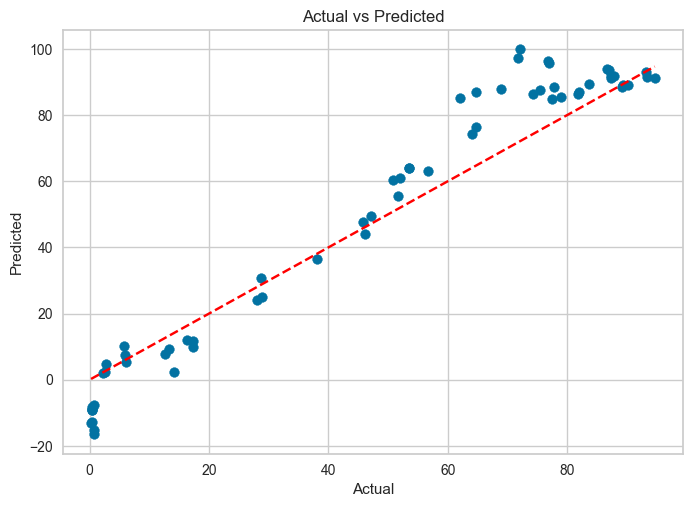

In [355]:
mse, rmse, r2, y_pred = print_regression_performance_report(model_fit, X_test, y_test, True, 'set') # SARIMAX model 

Mean Squared Error (MSE): 40.6236
Root Mean Squared Error (RMSE): 6.3737
R-squared (R2): 0.9644


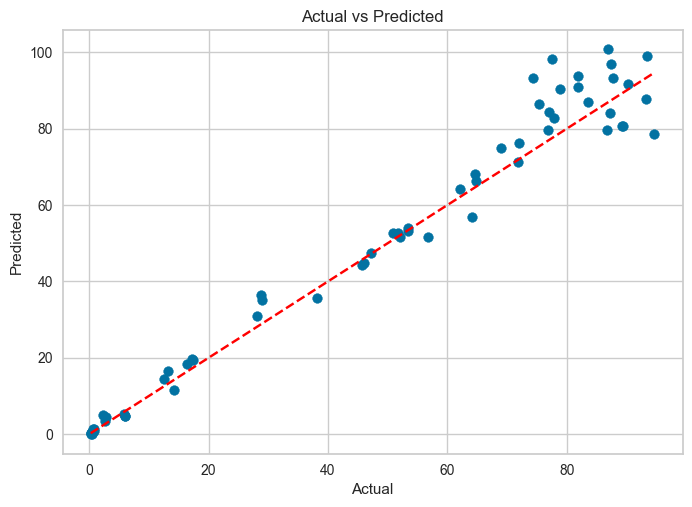

In [356]:
mse, rmse, r2, y_pred = print_regression_performance_report(xgb_model_fit, X_test, y_test, False, 'reset') 

In [357]:
# from yellowbrick.datasets import load_concrete
# from yellowbrick.regressor import ResidualsPlot


# visualizer = ResidualsPlot(model)

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.show()                 # Finalize and render the figure

In [358]:
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(estimator=xgb_model_fit, X=X_train, y=y_train, cv=5)
# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.plot(train_sizes, train_scores_mean, label='Training score')
# plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
# plt.xlabel('Training examples')
# plt.ylabel('Score')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()


In [359]:
from yellowbrick.regressor import ResidualsPlot
import matplotlib.font_manager
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

def residual_plot(model, X_train, y_train, X_test, y_test, action = 'set'):
    """ 
    Program: print_regression_performance_report
    Author: Siraprapa W.
    
    Purpose: Print standard regression metrics report and generate visualizations.
    """
    if action == 'set':
        if 'input_Timepoint (hr)' in X_test.columns: 
                X_test = set_reset_index(X_test, action=action)
        else:
            pass # Handle cases where there is no time index
    else:        
        X_test = set_reset_index(X_test, action=action)
    
    visualizer = ResidualsPlot(xgb_model_fit, hist = False)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show()                 # Finalize and render the figure

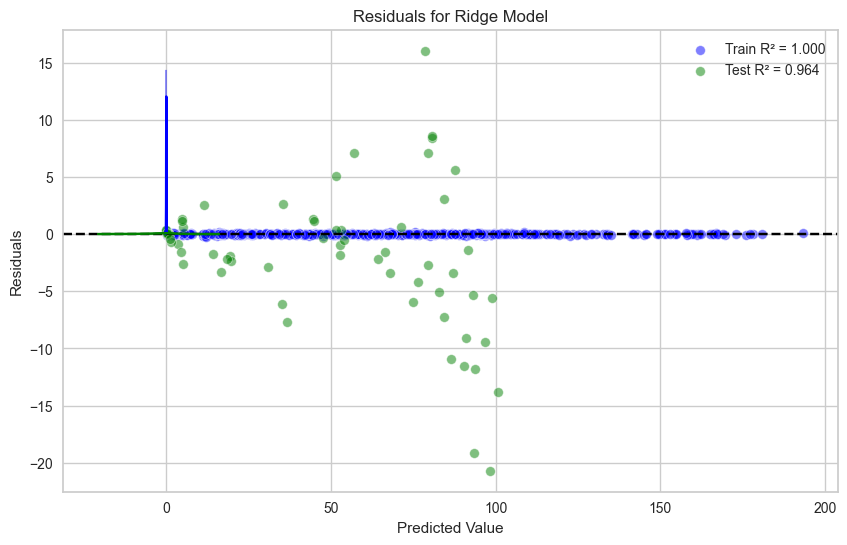

In [360]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


xgb_model_fit.fit(X_train, y_train)

# Make predictions
y_train_pred = xgb_model_fit.predict(X_train)
y_test_pred = xgb_model_fit.predict(X_test)

# Compute the residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Calculate the R-squared values
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create the residual plots
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plots for training and testing residuals
sns.scatterplot(x=y_train_pred, y=train_residuals, ax=ax, color='blue', alpha=0.5, label=f'Train R² = {train_r2:.3f}')
sns.scatterplot(x=y_test_pred, y=test_residuals, ax=ax, color='green', alpha=0.5, label=f'Test R² = {test_r2:.3f}')

# Plot a line at 0 for residuals
ax.axhline(y=0, color='black', linestyle='--')

# Annotations and labels
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Residuals')
ax.set_title('Residuals for Ridge Model')

# Plot histograms for residuals
sns.histplot(train_residuals, kde=True, color='blue', ax=ax, stat="density", element="step", alpha=0.3)
sns.histplot(test_residuals, kde=True, color='green', ax=ax, stat="density", element="step", alpha=0.3)

# Show legend and plot
ax.legend()
plt.show()


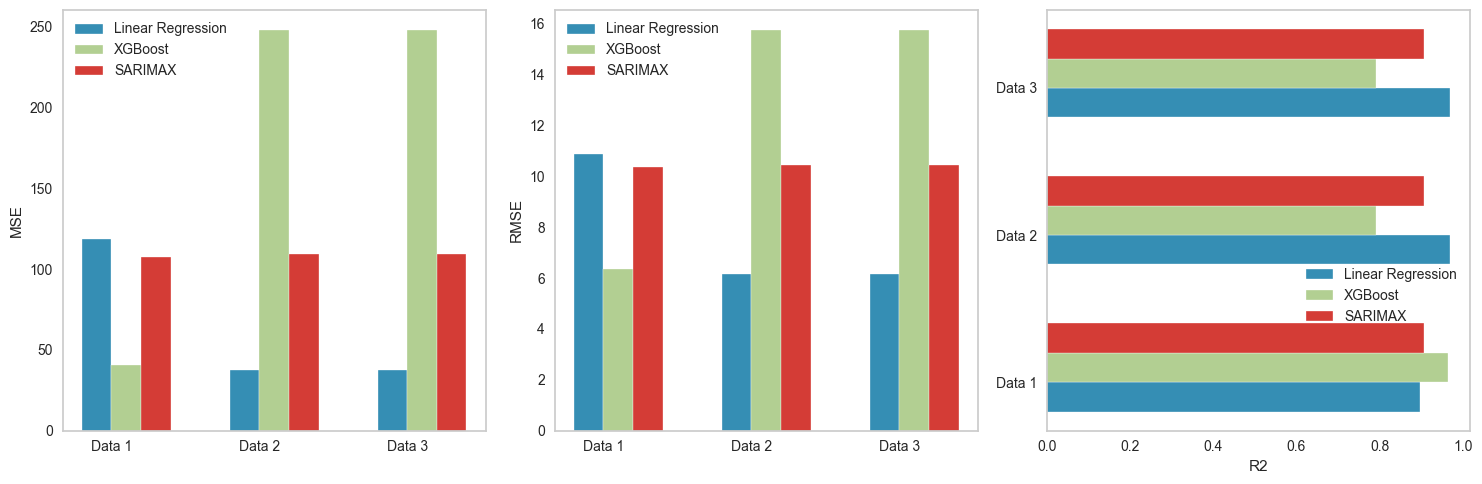

In [364]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and data
models = ["Linear Regression", "XGBoost", "SARIMAX"]

mse = [
    # Data 1
    [118.59194508422084, 40.62359283670584, 107.23563874099641],
    # Data 2
    [37.84093283149445, 247.9630739752672, 109.32773828962365],
    # Data 3
    [37.84093283149445, 247.9630739752672, 109.32773828962365]
]

rmse = [
    # Data 1
    [10.889992887243814, 6.373664004064368, 10.355464197272685],
    # Data 2
    [6.151498421644473, 15.74684330192141, 10.45599054559747],
    # Data 3
    [6.151498421644473, 15.74684330192141, 10.45599054559747]
]

r2 = [
    # Data 1
    [0.8962165146364349, 0.9644490353068284, 0.9061547701589259],
    # Data 2
    [0.9679486878029661, 0.7899750005448363, 0.9073992840683901],
    # Data 3
    [0.9679486878029661, 0.7899750005448363, 0.9073992840683901]
]




batches = ['Data 1', 'Data 2', 'Data 3'] 

# Create the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Calculate the positions of bars
index = np.arange(len(models))
bar_width = 0.2
opacity = 0.8

# Plotting MSE and RMSE as bar plots
for i, model in enumerate(models):
    mse_values = [mse[j][i] for j in range(len(batches))]
    rmse_values = [rmse[j][i] for j in range(len(batches))]
    
    axs[0].bar(index + i * bar_width, mse_values, bar_width, alpha=opacity, label=model)
    axs[1].bar(index + i * bar_width, rmse_values, bar_width, alpha=opacity, label=model)

# Plotting R2 as a horizontal bar plot
for i, model in enumerate(models):
    r2_values = [r2[j][i] for j in range(len(batches))]
    positions = index + i * bar_width  # Horizontal bar positions
    axs[2].barh(positions, r2_values, bar_width, alpha=opacity, label=model)

# Setting the labels and titles

# axs[0].set_title('MSE by Model')
# axs[1].set_title('RMSE by Model')
# axs[2].set_title('R2 by Model')
axs[0].set_xticks(index + bar_width / 2, batches)
axs[1].set_xticks(index + bar_width / 2, batches)
axs[2].set_yticks(index + bar_width / 2, batches)  # Adjust for horizontal bar plot
axs[0].set_ylabel('MSE')
axs[1].set_ylabel('RMSE')
axs[2].set_xlabel('R2')  # X-axis for horizontal bar plot
# axs[2].set_xlabel(r'$R^2$')  # X-axis for horizontal bar plot

# Adding legends
axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
# Use bbox_to_anchor to move the legend slightly lower than the center right
axs[2].legend(loc='center right', bbox_to_anchor=(1, 0.32))

# remove grids
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)

# Show plot
plt.tight_layout()
plt.show()


Mean Squared Error (MSE): 107.2356
Root Mean Squared Error (RMSE): 10.3555
R-squared (R2): 0.9062


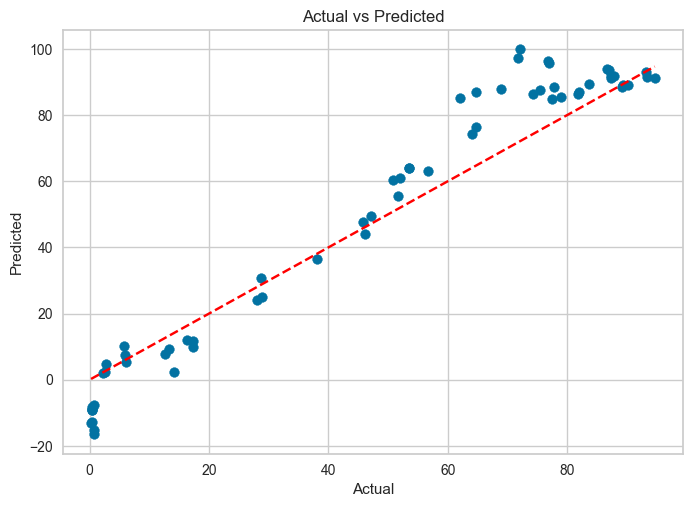

In [363]:
#Regression performance report 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


mse, rmse, r2, y_pred = print_regression_performance_report(model_fit, X_test, y_test)

#Regression
    # Error = Actual value - Predicted value

    # MSE (Mean Square Error)
        # The square of the error over all samples is called Mean Squarred Error(MSE).
        # MSE = SQUARE(Actual value - Predicted value)/Number of Samples
    #RMSE (Root Mean Square Error)
    # MAE (Mean Absolute Error)
        # MAE = ABSOLUTE (Actual value - Predicted Value)


In [ ]:
import joblib

# Specify the filename for the saved model
model_filename = 'sarimax_model.joblib'
joblib.dump(model_fit_2, f"models/{model_filename}")  # Save the trained SARIMAX model to file


# save the scaler
scaler_filename = "scaler.joblib"
joblib.dump(scaler, f"models/{scaler_filename}")  # Save the trained scaler to file


# Open a file in write-binary (wb) mode and save the model

print(f"Model saved to {model_filename}")


Model saved to sarimax_model.joblib


In [ ]:
# Make predictions using the test set
# Note: If your SARIMAX model was fit with exogenous variables, you need to provide them during forecasting
forecast = model_fit_2.get_forecast(steps=len(X_test), exog=X_test)

# The forecast object contains various information. To get the predicted mean values:
predicted_mean = forecast.predicted_mean

# The confidence intervals for the forecasts can also be useful:
conf_int = forecast.conf_int()


c:\Users\pault\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
X_test.columns 

Index(['output_WCW_gl', 'output_agitation', 'output_air_%', 'output_D0_%', 'output_gasflow', 'output_O2', 'output_Ph', 'output_feed_%', 'output_feed', 'output_Temp', 'output_glycerol_gl', 'output_glucose_gl', 'output_acetate_mmol_l', 'output_phosphate_mmol_l'], dtype='object')

<a id="6"></a> <br>
## Model Evaluation

>> Learning Curve (Access the Bias and Variance) - Model Diagnostics

- `Bias` - error in the training data

- `Variance` -> difference in the errors between the train and test data. (i.e.,  it examines how the model's performance varies between the training data and unseen data (like a validation set).  If the model performs well on the training data but poorly on the validation/test data, it suggests high variance)


`High Bias (will also have High Variance) -> Underfitting:` The model is too simple and doesn't capture the complexities of the data well, leading to poor performance on both training and testing datasets.

`Low Bias + High Variance -> Overfitting:` The model is too complex, fitting too closely to the training data, including its noise and outliers. It performs well on training data but poorly on unseen data.

`Low Bias + Low Variance -> Ideal Model:` This is the desired outcome. The model accurately captures the underlying patterns in the data (low bias) and generalizes well to unseen data (low variance).

<p align="center">
  <img src="learning-curves.png" alt="Example Image"/>
</p>



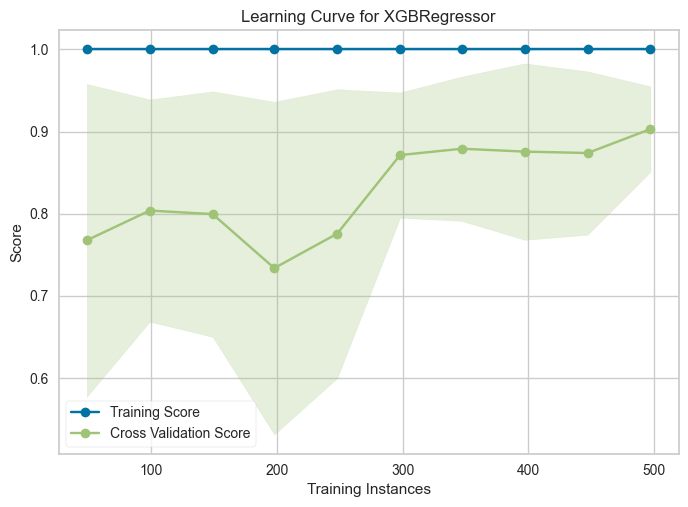

<Axes: title={'center': 'Learning Curve for XGBRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:

#check Bias and Variance using Learnng Curve 


from yellowbrick.model_selection import LearningCurve

sizes = np.linspace(0.1, 1.0, 10) # Define the training set sizes to plot the learning curve

visualizer = LearningCurve(
    xgb_model_fit, cv=5, scoring='r2', train_sizes=sizes, n_jobs=4  #or use scoring = 'neg_mean_squared_error'
        )
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure


# To fix high bias (underfitting):
    # get additional features or increasing the size of the model 
    # Adding polynomial features is a form of feature engineering that can increase the complexity of the model
    # decrease the regularization parameter (lambda) to allow the model's learning algorithm to fit the data more flexibly, 
        # thereby potentially reducing bias

# To fix high variance (overfitting):
    # Obtaining more training samples can help the model generalize better.
    # Simplifying the model by reducing the number of features (feature selection) can prevent the model from fitting noise in the 
        # training data.
    # Increasing the regularization parameter (lambda) adds a penalty to the model complexity, which can help in preventing overfitting.


> Cross Validation Scores

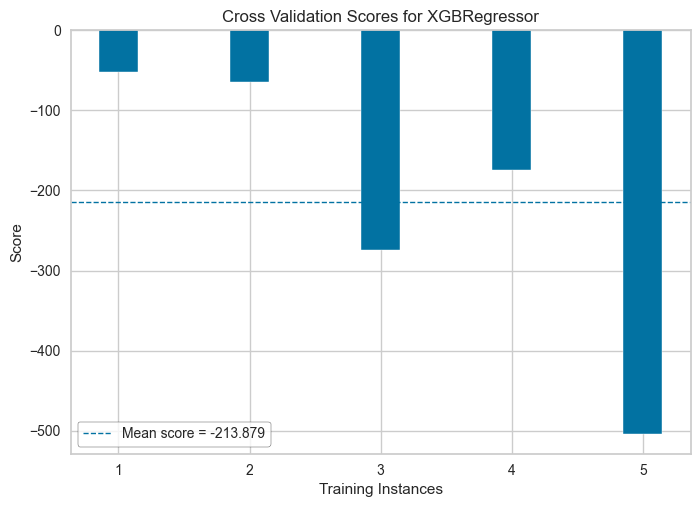

<Axes: title={'center': 'Cross Validation Scores for XGBRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [284]:
from sklearn.model_selection import learning_curve, cross_val_score, KFold, train_test_split
from yellowbrick.model_selection import CVScores #visualizing the cross validation scores

#check Bias and Variance using Cross Validation

cv = 5  #or # Create a cross-validation object: 
# cv = KFold(n_splits=5, shuffle=True, random_state=42) 

visualizer = CVScores(xgb_model_fit, cv=cv, scoring='neg_mean_squared_error') 

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure




> Plot Validation Curves (to analyse the impact of each Hyperparameter)

In [ ]:
#to analyze the impact of varying hyperparameter values on the model's performance using Validation curve
#the validation curve is useful for hyperparameter tuning, while the learning curve is used to assess bias and variance.

# Using validation curves is a fundamental aspect of machine learning model tuning, as it provides valuable insights into how 
# hyperparameters influence model performance, aiding in the selection of the most appropriate model settings.

from sklearn.model_selection import validation_curve



#the hyperparameter used here is 'max_depth'. A hyperparameter for the model ExtraTreeRegressor

plot_validation_curve(model, X_train, y_train, param_name="max_depth", cv=5, scoring="r2") 

In [ ]:
from yellowbrick.model_selection import ValidationCurve 

# cv = StratifiedKFold(4)
viz = ValidationCurve(
    xgb_model_fit, param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

>> Analyze Error Distribution

In [ ]:
# if the errors are normally distributed around zero, it may indicate that the model is making unbiased predictions. 
# If there is a pattern or trend in the errors, it may suggest that the model has systematic biases or is making 
# consistent errors in certain regions of the input space


analyze_error_distribution(y_val, y_pred)

>> Error Analysis - Diagnostics

In [ ]:
#Error analysis is the process of analyzing the errors made by a machine learning model and identifying the patterns 
# or trends that may be causing the errors. The goal of error analysis is to gain insight into the behavior of the 
# model and identify areas for improvement. 

# The steps involved in error analysis:
    # 1. Collect error data - Gather instances where the model made incorrect predictions.
    # 2. Categorize errors - Classify errors into meaningful categories.
    # 3. Identify patterns - Look for commonalities or trends among the errors.
    # 4. Analyze causes - Investigate potential reasons behind these patterns.
    # 5. Prioritize fixes - Decide which errors to address first based on their impact.

    
# Based on the insights gained from the error analysis, you can perform the following.

# False negatives: 
    # To fix this issue, you may consider the following:
        # Increase the weight of the features that are more indicative of churn for low-usage customers, 
            # such as frequency of usage or specific product usage. (adjust the model parameters)
        # Add new features that may be predictive of churn, such as customer sentiment or customer service interactions.
        # Use a different model architecture that is better suited for handling imbalanced data, such as a decision tree 
            # or ensemble model. 


# False positives:
    # To fix this issue, you may consider the following:
        # Decrease the weight of features that are causing false positives, such as age or income, if they are not as 
            # indicative of churn for low-usage customers. (adjust the model parameters)
        # Remove features that are causing false positives altogether, if they are not providing significant value to the 
            # model.
        # Increase the size of the training dataset to capture a more representative sample of customers who do not churn, 
            # which may help the model learn more accurately which customers are likely to churn.


<a id="7"></a> <br>
## Feature Engineering

>> Feature Importances

In [ ]:
#access the most important features in the model

#depending on the results from the bias and variance tests, there may be need to assess which features
# are the most important in the ML model


def feature_importance(model,X):
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

feature_importance(model,X_train)  



#OR
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model, labels=labels, relative=False)
viz.fit(X, y)
viz.show()

> Visualize Model Performance during Feature Selection/Extraction

In [ ]:
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import StratifiedKFold 


cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure



>> Feature Selection and Extraction - (Fix High Variance)

In [ ]:
# Addressing High Variance in Models through Feature Selection/Extraction

# Overview
    # Goal: Improve model generalization by reducing complexity or enhancing informative representations.
    # Application: Apply techniques to training data, then to test data.
    
# Initial Steps
    # Assess feature importance.
    # Options:
        # Add or remove features based on their importance.
        # Consider creating polynomial features for more complex relationships.

# Feature Selection/Extraction Strategies

    # Step 1: Manual Feature Adjustment
        # Add or remove features based on domain knowledge or preliminary analysis.
        
    # Step 2: Automated Techniques (start with feature selection)
    
        # Feature Selection Methods:
            # VarianceThreshold: Remove features with low variance.
            # Univariate Selection: Use methods like SelectKBest, SelectPercentile, or GenericUnivariateSelect.
            # Recursive Feature Elimination: RFE or RFECV (with cross-validation).
            # Model-Based Selection: Use SelectFromModel with L1-based (Lasso, Ridge, ElasticNet) or tree-based methods.
            # Sequential Feature Selector: Forward or backward selection (SFS).
            
        # Feature Extraction Methods:
            # Principal Component Analysis (PCA).
            # Independent Component Analysis (ICA).
            # t-Distributed Stochastic Neighbor Embedding (t-SNE).
        
        # Common Choices: PCA for extraction and SelectKBest for selection.

# Workflow for Model Improvement 
    # Build and test a model with normal data.
    # If accuracy is not satisfactory, perform feature selection and retest.
        # Optionally, add polynomial features to the selected features and retest.
    # If needed, proceed to feature extraction and retest.
        # Again, consider adding polynomial features and retesting.

> Adding Polynomial Features (Fix High Bias)

In [ ]:
#Adding Polynomial Features (to Fix High Bias) - do this only if there is high variance

from sklearn.preprocessing import PolynomialFeatures

df_polynomial = add_polynomial_features_sklearn(df, degree, columns=None)


>> Performing Regularization (fix High Variance)

In [ ]:
#Another way to fix High Bias or Variance is to perform regularization on the model.
#this would involve increasing or decreasing the regularization parameter (lambda) to fix high variance or bias


# By tuning the hyperparameters of the model using cross-validation, 
# we would have effectively applied regularization to the model, which can help to reduce overfitting and improve 
# its generalization performance.

#Hence the next step is MODEL OPTIMIZATION. 

<a id="8"></a> <br>
## Model Optimization

>> Auto Hyperparameter Optimization using Optuna

In [ ]:
from sklearn.svm import SVC
import optuna

SVC().get_params()

In [ ]:
# Set the logging level for Optuna to WARNING
# logging.getLogger('optuna').setLevel(logging.WARNING) 

def objective(trial):
    # Define the hyperparameters' search space
    C = trial.suggest_loguniform('C', 1e-4, 1e4)
    kernel = trial.suggest_categorical('kernel', ['rbf', 'poly'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    degree = trial.suggest_int('degree', 1, 5) if kernel == 'poly' else 3  # degree is only used for 'poly' kernel

    # Create the SVM model
    model = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree, probability=True)

    cv = StratifiedKFold(n_splits=10,random_state=11,shuffle=True) 
    
    # Perform cross-validation and compute the average AUC score
    scores = cross_val_score(model, train_data, train_labels, scoring='roc_auc', n_jobs=-1, cv=cv)
    avg_auc_test = np.mean(scores)

    return avg_auc_test

# Create and run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Best hyperparameters
best_hyperparams = study.best_trial.params
# print('Best Hyperparameters:', best_hyperparams)



In [ ]:
# Best hyperparameters obtained from Optuna
best_C_svm = best_hyperparams['C']
best_kernel = best_hyperparams['kernel']
best_gamma = best_hyperparams['gamma']
best_degree = best_hyperparams['degree'] 


print('Best C (svm): {}'.format(best_C_svm))
print('Best kernel: {}'.format(best_kernel))
print('Best gamma: {}'.format(best_gamma))
print('Best degree: {}'.format(best_degree))

tuned_svm_model = SVC(C=best_C_svm, kernel=best_kernel, gamma=best_gamma, degree = best_degree, probability=True)

tuned_svm_model.fit(train_data, train_labels)

dump(tuned_svm_model, 'models/tuned_model/tuned_support_vector.joblib')



In [ ]:
y_pred,ACC,PC,RC,FS,AP,roc_auc,gini = print_classification_performance2class_report(tuned_svm_model,valid_data,valid_labels) 